## Data Update for .csv file provided by Caroline (2023-01-13)

In [88]:
# Import
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import datetime, os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from tabulate import tabulate
import sys

pd.options.display.max_columns = 50

print("Last updated on {}".format(datetime.datetime.now().ctime()))

Last updated on Mon Mar 27 10:11:36 2023


### Import Data

In [29]:
# labels corresponding to missing data
na_values = ['No observation', 'No observations', 'No Observation', 'No Observations',
             'no observation', 'no observations', 'None given', 'none given', 'None Given', 'none',
             'none recorded', 'not recorded', 'None recorded', 'Not given', 'not given', ' ']

# read CSV file into DataFrame
df = pd.read_csv('Shiplog Data/logentries-export-2023-01-13.csv', parse_dates={'DateTime':[3,4]},
                 na_values=na_values)

### Cleaning Data

Dropping 'TEST LOG BOOK NAME' Entries

In [30]:
df.drop(df.loc[df["LogBook ID"] == "TEST LOG BOOK NAME"].index,axis=0,inplace=True)

Dropping 'Westward-1978' Entries

In [31]:
#df.drop(df.loc[df["Entry Date Time"].dt.year==2021.].index,axis=0,inplace=True)
df.drop(df.loc[df["LogBook ID"]=="Westward-1978"].index,inplace=True)

In [32]:
np.shape(df)

(58826, 16)

Manual Cleanups

In [33]:
# replace DateTime-strings that end with ' nan' with np.nan
# df.DateTime.str.endswith(' nan') #returns a boolean list of all rows, setting rows that fulfill the .endswith query to True and all others to False.
# df.loc[boolean-list,'DateTime'] accesses the 'DateTime' column of those rows that were set to True. = np.nan sets those values to NaN values.
df.loc[df.DateTime.str.endswith(' nan'), 'DateTime'] = np.nan

In [34]:
# manual clean-up of typos in DateTime column
#df.loc[1855,'DateTime'] = '1868-05-13 12:00:00'
df.loc[df.ID == 52419,'DateTime'] = '1849-10-08 12:00:00'
df.loc[df.ID == 52219,'DateTime'] = '1849-07-20 12:00:00'


df.loc[df.ID == 10736,'DateTime'] = '1849-12-17 12:00:00'
df.loc[df.ID == 10735,'DateTime'] = '1849-12-16 12:00:00'
df.loc[df.ID == 10734,'DateTime'] = '1849-12-15 12:00:00'
df.loc[df.ID == 10733,'DateTime'] = '1849-12-14 12:00:00'
df.loc[df.ID == 10732,'DateTime'] = '1849-12-13 12:00:00'
df.loc[df.ID == 10731,'DateTime'] = '1849-12-12 12:00:00'
df.loc[df.ID == 10730,'DateTime'] = '1849-12-11 12:00:00'
df.loc[df.ID == 10729,'DateTime'] = '1849-12-10 12:00:00'
df.loc[df.ID == 10728,'DateTime'] = '1849-12-09 12:00:00'
df.loc[df.ID == 10727,'DateTime'] = '1849-12-08 12:00:00'
df.loc[df.ID == 10726,'DateTime'] = '1849-12-07 12:00:00'
df.loc[df.ID == 10725,'DateTime'] = '1849-12-06 12:00:00'
df.loc[df.ID == 10724,'DateTime'] = '1849-12-05 12:00:00'
df.loc[df.ID == 10723,'DateTime'] = '1849-12-04 12:00:00'
df.loc[df.ID == 10722,'DateTime'] = '1849-12-03 12:00:00'
df.loc[df.ID == 9490,'DateTime']  = '1884-09-29 12:00:00'
df.loc[df.ID == 9296,'DateTime']  = '1884-02-04 12:00:00'
df.loc[df.ID == 7843,'DateTime']  = '1839-11-01 12:00:00'
df.loc[df.ID == 7842,'DateTime']  = '1839-10-31 12:00:00'
df.loc[df.ID == 7841,'DateTime']  = '1839-10-30 12:00:00'
df.loc[df.ID == 7840,'DateTime']  = '1839-10-29 12:00:00'
df.loc[df.ID == 7839,'DateTime']  = '1839-10-28 12:00:00'
df.loc[df.ID == 7838,'DateTime']  = '1839-10-27 12:00:00'
df.loc[df.ID == 7837,'DateTime']  = '1839-10-26 12:00:00'
df.loc[df.ID == 7836,'DateTime']  = '1839-10-25 12:00:00'
df.loc[df.ID == 7835,'DateTime']  = '1839-10-24 12:00:00'
df.loc[df.ID == 7834,'DateTime']  = '1839-10-23 12:00:00'
df.loc[df.ID == 7833,'DateTime']  = '1839-10-22 12:00:00'
df.loc[df.ID == 7832,'DateTime']  = '1839-10-21 12:00:00'
df.loc[df.ID == 7831,'DateTime']  = '1839-10-20 12:00:00'
df.loc[df.ID == 7830,'DateTime']  = '1839-10-19 12:00:00'
df.loc[df.ID == 7829,'DateTime']  = '1839-10-18 12:00:00'
df.loc[df.ID == 7828,'DateTime']  = '1839-10-17 12:00:00'
df.loc[df.ID == 7827,'DateTime']  = '1839-10-16 12:00:00'
df.loc[df.ID == 3975,'DateTime']  = '1868-05-13 12:00:00'
df.loc[df.ID == 3756,'DateTime']  = '1867-09-30 12:00:00'
df.loc[df.ID == 2115,'DateTime']  = '1855-03-30 12:00:00'
df.loc[df.ID == 2114,'DateTime']  = '1855-03-29 12:00:00'
df.loc[df.ID == 724,'DateTime']   = '1860-09-18 12:00:00'

In [35]:
# converting 'DateTime' column to actual DateTime and calling it "Entry Date Time"
df['Entry Date Time'] = pd.to_datetime(df.DateTime, format = '%Y-%m-%d %H:%M:%S')
# deleting row "DateTime"
df.drop('DateTime',axis=1)

,ID,LogBook ID,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time
0,60501,Swift (Ship) 1849-1852,NaN,39 59 N,33 30 W,NaN,NaN,NaN,NaN,ESE,WSW,Light Breezes,NaN,NaN,NaN,1849-07-15 12:00:00
1,60500,Swift (Ship) 1849-1852,NaN,38 51 N,34 25 W,NaN,NaN,NaN,NaN,E by S,SSW,Fine Breezes,NaN,NaN,NaN,1849-07-14 12:00:00
2,60499,Swift (Ship) 1849-1852,NaN,38 34 N,36 40 W,NaN,NaN,NaN,NaN,ENE,SSW,Fresh Breezes,NaN,NaN,NaN,1849-07-13 12:00:00
3,60496,Matilda Sears (Bark) 1877-1882,148,NaN,NaN,4,fathoms,NaN,NaN,NaN,S,Light Breeze,NaN,NaN,NaN,1879-09-21 12:00:00
4,60495,Swift (Ship) 1849-1852,NaN,37 15 N,38 46 W,NaN,NaN,NaN,NaN,ENE,SSW,Moderate Breezes,NaN,NaN,NaN,1849-07-12 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58833,520,Alpha (ship) 1855-1859,26,40º 07' S,39º 02' E,NaN,Fathoms,NaN,NaN,SE by E,From N NW,Moderate Gale,NaN,Squally,NaN,1855-11-06 12:00:00
58834,519,Alpha (ship) 1855-1859,26,39º 59' S,28º 09' E,NaN,Fathoms,NaN,NaN,"""Middle moderate""",From N NW,Strong Breeze and Squally Wind,NaN,NaN,NaN,1855-11-05 12:00:00
58835,518,Alpha (ship) 1855-1859,26,40º 23' S,23º 37' E,NaN,Fathoms,NaN,NaN,SE by E,From N NW,Strong Breeze,NaN,NaN,NaN,1855-11-04 12:00:00
58836,517,Alpha (ship) 1855-1859,26,40º 05' S,19º 43' E,NaN,Fathoms,NaN,NaN,SE by S,From W by S,Strong Breeze,NaN,NaN,NaN,1855-11-03 12:00:00


In [36]:
# getting rid of all leading 'Zero-Width No Space Breaks' (encoded as '\ufeff' in Python) in column 'ID'
#df['ID']=df.ID.str.lstrip('\ufeff')
# converting 'ID' values to Int32
#df['ID']=df.ID.astype('int32')

### Does not seem to be necessary anymore, 'ID' values are already read in as int64

In [37]:
# Removing bracketed page numbers from the right of the strings
df.loc[df['Page'].str.strip().str.endswith(')').fillna(False), 'Page'] = df.loc[df['Page'].str.strip().str.endswith(')').fillna(False), 'Page'].str[0:3]

In [38]:
with pd.option_context('display.max_rows', None,):
   print(df.loc[df['Page'].str.strip().str.endswith(')').fillna(False), 'Page',])

Series([], Name: Page, dtype: object)


In [39]:
df["Page"] = df.Page.str.rstrip('a')
df["Page"] = df.Page.str.rstrip('b')
df["Page"] = df.Page.str.lstrip('"')
df["Page"] = df.Page.str.rstrip('"')

# cleanup of typos and '30-31'-esque entries in column 'Page'
df.loc[df.Page=='N','Page'] = np.nan
df.loc[df.Page=='N/','Page'] = np.nan
df.loc[df.Page=='N/a','Page'] = np.nan
df.loc[df.Page=='n/a`','Page'] = np.nan
df.loc[df.Page=='1-8','Page'] = 1
df.loc[df.Page=='3 1/2','Page'] = 3
df.loc[df.Page=='5 1/2','Page'] = 5
df.loc[df.Page=='14-15','Page'] = 14
df.loc[df.Page=='22-23','Page'] = 22
df.loc[df.Page=='30-31','Page'] = 30
df.loc[df.Page=='48-49','Page'] = 48
df.loc[df.Page=='94/95','Page'] = 94
df.loc[df.Page=='97-98','Page'] = 97
df.loc[df.Page=='108-109','Page'] = 108
df.loc[df.Page=='121 (says 107)','Page'] = 121
df.loc[df.Page=='122-123','Page'] = 122
df.loc[df.Page=='158-159','Page'] = 158
df.loc[df.Page=='159-160','Page'] = 160
df.loc[df.Page=='177-178','Page'] = 177
df.loc[df.Page=='186-187','Page'] = 186


# converting 'Page' values to numeric
df['Page']=pd.to_numeric(df.Page)

In [40]:
# manual clean-up of column 'Depth'
df['Depth'] = df.Depth.str.rstrip('Fathoms')
df.loc[df.Depth=='anchored in 5 fathoms of water','Depth'] = 5
df.loc[df.Depth=='2 1/2','Depth'] = 2.5
df.loc[df.Depth=='3 1/2','Depth'] = 3.5
df.loc[df.Depth=='4 1/2','Depth'] = 4.5
df.loc[df.Depth=='5 1/4','Depth'] = 5.25
df.loc[df.Depth=='5 1/2','Depth'] = 5.5
df.loc[df.Depth=='6-8','Depth'] = 7.
df.loc[df.Depth=='6 1/2','Depth'] = 6.5
df.loc[df.Depth=='7 1/2','Depth'] = 7.5
df.loc[df.Depth=='8 1/2','Depth'] = 8.5
df.loc[df.Depth=='8 (at Tarpaulin Cove)','Depth'] = 8.
df.loc[df.Depth=='9 1/2','Depth'] = 9.5
df.loc[df.Depth=='11 1/2','Depth'] = 11.5
df.loc[df.Depth=='12 1/2','Depth'] = 12.5
df.loc[df.Depth=='10-15','Depth'] = np.nan
df.loc[df.Depth=='20 then 11','Depth'] = np.nan
df.loc[df.Depth=='27 & 30','Depth'] = 28.5
df.loc[df.Depth=='28(8pm), 30(rest of night)','Depth'] = 29.
df.loc[df.Depth=='30 and 25','Depth'] = 27.5
df.loc[df.Depth=='35, 30','Depth'] = np.nan
df.loc[df.Depth=='35(11pm), 38(2am), 33(11am)','Depth'] = 35.
df.loc[df.Depth=='37, 27','Depth'] = np.nan
df.loc[df.Depth=='50 at start, 43 at 4 PM','Depth'] = np.nan
df.loc[df.Depth=='@ 3am 58, @ 7am 52','Depth'] = np.nan
df.loc[df.Depth=='50 (7pm), 65 (noon)','Depth'] = np.nan
df.loc[df.Depth=='54 (8pm), 70 (2am), 90 (4am)','Depth'] = np.nan
df.loc[df.Depth=='35, 22 (1pm, 4pm)','Depth'] = np.nan
df.loc[df.Depth=='50, 45, 40 (7pm, 11pm, 4am)','Depth'] = np.nan
df.loc[df.Depth=='`','Depth'] = np.nan
df.loc[df.Depth=='7pm 41, 9pm 31','Depth'] = np.nan
# converting 'Depth' values to numeric
df['Depth'] = pd.to_numeric(df.Depth)

Set additional missing values

In [41]:
# replace any strings that start with 'none', 'nnone' or 'not recorded' with np.nan
for vname in ['Ship Heading/Course','Wind Direction','Wind Speed/Force']:
    df.loc[df[vname].str.strip().str.startswith('none').fillna(False), vname] = np.nan
    df.loc[df[vname].str.strip().str.startswith('nnone').fillna(False), vname] = np.nan
    df.loc[df[vname].str.strip().str.startswith('not recorded').fillna(False), vname] = np.nan

Clean/Standardize Wind Direction

In [42]:
df["Wind Direction"].dropna().unique()

array(['WSW', 'SSW', 'S', 'SSE', 'ESE', 'SE', 'SE / S', 'N', 'S by W',
       'NW', 'S by E heading E by S', 'SSE heading E',
       'SE by S heading E by N', 'S to SSW heading from ESE to SE', 'NNE',
       'SW', 'N & W', 'N & E', 'ENE', 'E', 'W', 'WNW', 'S & E',
       'S by W heading SE', 'S heading ESE', 'SSW heading SE',
       'SSW heading', 'NE', 'NNW', 'S by W heading SE by E',
       'SE heading ENE', 'SSE to S by E heading from E to E by S',
       'ESE heading NE', 'NWW', 'NW by W', 'E heading NNE',
       'SE to E heading ENE', 'E heading SSE', 'NW by N', 'ESE heading S',
       'E by S heading S by E', 'SE by E heading NE by E',
       'SE by E heading SW', 'E by S', 'SE by E', 'S & W', 'variable',
       'E by N heading SE by S', 'W by S', 'E heading S',
       'Baffling/variable', 'E to ESE heading from SSE to E',
       'SE heading SSW', 'SSE heading SW', 'S heading WSW',
       'SSW heading W', 'ESE to SSE', 'W heading NNW', 'NW heading NNE',
       'NW by W heading N 

In [43]:
### Some standardization

# Delete leading 'from ' and 'From ' from column 'Wind Direction'
df['Wind Direction'] = df['Wind Direction'].str.lstrip('from ')
df['Wind Direction'] = df['Wind Direction'].str.lstrip('From ')
# Replace 'Off shore' with 'off shore' in column 'Wind Direction'
df['Wind Direction'] = df['Wind Direction'].str.replace('Off shore','off shore')
# Replace 'e' with 'E' in column 'Wind Direction'
df.loc[df['Wind Direction']== 'e','Wind Direction'] = 'E'


Identifying Wind Speed terms in Column "Wind Direction" and updating "Wind Speed/Force" & "Wind Direction" accordingly

In [44]:
df.loc[df['Wind Direction']== 'Calm',"Wind Speed/Force"]    # No need to update wind speed entry
df.loc[df['Wind Direction']== 'Light',"Wind Speed/Force"] = 'Light'
df.loc[df['Wind Direction']== 'Light airs',"Wind Speed/Force"] = 'Light airs'
df.loc[df['Wind Direction']== 'light wind',"Wind Speed/Force"] = 'light wind'
df.loc[df['Wind Direction']== 'light wind',"Direction"] = 'from NE'

In [45]:
# Define valid expressions for wind directions; valid_WD_str as string for later use of 'str.contains' method
valid_WD = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
valid_WD_str = 'N|NNE|NE|ENE|E|ESE|SE|SSE|S|SSW|SW|WSW|W|WNW|NW|NNW'

#Safe original dataframe 
df_WD_before = df['Wind Direction']

# Create equivalent list of possible angles 
angles = np.arange(0, 360, 22.5)

# Remove unnecessary information in Strings 
for st in ['Baffling/variable', 'Baffling/variable,', 'Baffling ', 'baffling/variable ', 'baffling ', 'Variable mostly from the',
           'from', 'Variable', 'variable', 'and hauling', 'trades from', 'at', 'breezed up from', ', halled to',  'by S1/2S',
           'under all sail', ' the', '@', '[?; none recorded]', '[?;oneecorded]', '& variable', 'Head Wind', 'Strong', ' 1/2',
           'and Overeast', 'stalled to', 'trades  ', 'then ', ',', 'So SSW t']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'', regex = False)    

# Replace equivalences to eastward winds
for st in ['Easterly','East', 'Westward', 'Wward', 'breezed up  ', 'EE', '" off she"  W to east']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'E', regex = False)
    
# Replace equivalences to westward winds
for st in ['Westerly','West', '" off shore"  West heading east', 'Baffling/variable, from the west', '"fromff shore", from the W headingast',
           'Eastward', 'Eward', 'mostly from the E', 'Wn']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'W', case = True)
    
# Replace equivalences to southward winds
for st in ['Northward', 'Nward', 'South', 'S heading into E', 'mostly from the S']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'S')
    
# Replace equivalences to northward winds
for st in ['Southward', 'Sward','North', 'Nn', 'N to Sw']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'N', case = True)
    
# Replace equivalences to northwestward winds
for st in ['Nw', 'WN']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'NW', case = True)   
    
# Replace equivalences to northeastward winds
for st in ['NE*', 'NE (hauled SW  2PM)', 'NEe', 'NER', 'Baffling/variable from the NE', 'Baffling/variable from NEW to NE',
           'NEW', 'NE NE', 'NEe', 'NENE', 'NEn', 'Ne', 'NR', 'NE to Sw', 'mostly from the NE']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'NE', regex = False, case = True)
           
# Replace equivalences to southeastward winds
for st in ['Se']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'SE', case = True)

# Replace equivalences to southwestward winds
for st in []:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'SW', case = True)   
    
# Replace all wind directions in between if direction clear
# Replace 'SSw' with 'SSW'
for st in ['SSw']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'SSW', case = True)
    
# Replace 'NWN', 'NNw' with 'NNW'
for st in ['NWN']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'NNW', case = True)
    
# Replace 'NWW' with 'WNW'
for st in ['NWW']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'WNW', case = True)

# Replace 'NNe' with 'NNE'
for st in ['NNe']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'NNE', case = True)

# Replace 'ES3' with 'ESE'
for st in ['ES3', 'ese']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'ESE', case = True)
        
# Replace 'SWS' with 'SSW'
for st in ['SWS']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'SSW', case = True)
        
# Replace 'SSSE' with 'SSE'
for st in ['SSSE']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st,'SSE', case = True)

# Remove synonyms where averaging of angles is meant
for st in ['and', '&', 'by', 'ny', 'half', 'or', 'b', 'y', ' n ', ' /', 'into', '+']:
    df['Wind Direction'] = df['Wind Direction'].str.replace(st, '', regex = False, case = True)

# Replace synonyms for 'to'
#for st in ['heading']:
#    df['Wind Direction'] = df['Wind Direction'].str.replace(st, 'to', regex = False, case = True)

# Finally, set all entries to nan where wind direction is not deducable 
df['Wind Direction'] = df['Wind Direction'].where(df['Wind Direction'].str.contains(valid_WD_str, regex=True), np.nan)


In [46]:
df["Wind Direction"].dropna().unique()

array(['WSW', 'SSW', 'S', 'SSE', 'ESE', 'SE', 'SE S', 'N', 'S  W', 'NW',
       'S  E heading E  S', 'SSE heading E', 'SE  S heading E  N',
       'S to SSW heading  ESE to SE', 'NNE', 'SW', 'N  W', 'N  E', 'ENE',
       'E', 'W', 'WNW', 'S  E', 'S  W heading SE', 'S heading ESE',
       'SSW heading SE', 'SSW heading', 'NE', 'NNW', 'S  W heading SE  E',
       'SE heading ENE', 'SSE to S  E heading  E to E  S',
       'ESE heading NE', 'NW  W', 'E heading NNE', 'SE to E heading ENE',
       'E heading SSE', 'NW  N', 'ESE heading S', 'E  S heading S  E',
       'SE  E heading NE  E', 'SE  E heading SW', 'E  S', 'SE  E',
       'E  N heading SE  S', 'W  S', 'E heading S',
       'E to ESE heading  SSE to E', 'SE heading SSW', 'SSE heading SW',
       'S heading WSW', 'SSW heading W', 'ESE to SSE', 'W heading NNW',
       'NW heading NNE', 'NW  W heading N  E', 'SE to SW',
       'WNW heading SW', 'SE  S heading SW  S', 'S  E heading SW  W',
       'W to SSW', 'WNW heading NE', 'NNW head

In [47]:
# Save entries with heading into a csv file

df_heading = df.loc[df['Wind Direction'].str.contains("heading", na = False, case=False)]
df_heading.to_csv('Shiplog Data/logentries-export-2023-01-13-clean_tier1_data_with_heading.csv', sep = ';') 

In [48]:
df_WD = df['Wind Direction'].str.split()

error_counter = 0
# Loop over all indices (not perfectly efficient, but for now the only idea I have)
for index in df_WD.index:
    try:
        # Only continue if value is not nan
        if type(df_WD[index]) != float:
            
            # Replace all direction indicated with letters by angles
            for j in range(len(valid_WD)):
                
                # Method to find particular angle
                matches = [i for i in range(len(df_WD[index])) if df_WD[index][i] == valid_WD[j]]
                
                # Replace corresponding angle
                for k in range(len(matches)):
                    df_WD[index][matches[k]] = angles[j]

            # First, convert all entries without 'to' into averaged floats
            if 'to' not in df_WD[index]:
                
                #Consider that averages below and above 360 degree are treated correctly
                if max(df_WD[index]) >= 270 and min(df_WD[index]) <= 90:
                    for j in range(len(df_WD[index])):
                        if df_WD[index][j] <= 90:
                            df_WD[index][j] += 360
                
                # Take average of angles
                df_WD[index] = sum(df_WD[index])/len(df_WD[index])
                
                # Correct averages above 360°
                if df_WD[index] >= 360:
                    df_WD[index] = df_WD[index] % 360 
                    
                
            # Then special treatment for 'to'
            else:
                # Find index of 'to'
                ix = df_WD[index].index('to')
                
                # Replace entry if there is no value in front of or behind 'to'
                if len(df_WD[index][:ix]) == 0:
                    
                    #Ensure that averages below and above 360 degree are treated correctly
                    if max(df_WD[index][ix+1:]) >= 270 and min(df_WD[index][ix+1:]) <= 90:

                        for j in range(len(df_WD[index][ix+1:])):
                            if df_WD[index][ix+1:][j] <= 90:
                                df_WD[index][ix+1:][j] += 360
                       
                    # Take average of angles
                    df_WD[index] = sum(df_WD[index][ix+1:])/len(df_WD[index][ix+1:])
                    
                    # Correct averages above 360°
                    if df_WD[index] >= 360:
                        df_WD[index] = df_WD[index] % 360
                
                elif len(df_WD[index][ix+1:]) == 0:
                    
                    #Ensure that averages below and above 360 degree are treated correctly
                    if max(df_WD[index][:ix]) >= 270 and min(df_WD[index][:ix]) <= 90:

                        for j in range(len(df_WD[index][:ix])):
                            if df_WD[index][:ix][j] <= 90:
                                df_WD[index][:ix][j] += 360
                       
                    # Take average of angles
                    df_WD[index] = sum(df_WD[index][:ix])/len(df_WD[index][:ix])
                    
                    # Correct averages above 360°
                    if df_WD[index] >= 360:
                        df_WD[index] = df_WD[index] % 360
                
                else:
                    
                    # Average all angles in front of and after 'to'
                    
                    # In front of:
                    # Consider that averages below and above 360 degree are treated correctly
                    if max(df_WD[index][:ix]) >= 270 and min(df_WD[index][:ix]) <= 90:
                        
                        for j in range(len(df_WD[index][:ix])):
                            if df_WD[index][:ix][j] <= 90:
                                df_WD[index][j] += 360
                                
                    # Take average of angles    
                    ave_bf = sum(df_WD[index][:ix])/len(df_WD[index][:ix])
                    
                    if ave_bf >= 360:
                        ave_bf = ave_bf % 360
                        
                    # After: 
                    # Consider that averages below and above 360 degree are treated correctly
                    if max(df_WD[index][ix+1:]) >= 270 and min(df_WD[index][ix+1:]) <= 90:
                        
                        for j in range(len(df_WD[index][ix+1:])):
                            if df_WD[index][ix+1:][j] <= 90:
                                df_WD[index][j+ix+1] += 360
                                
                    # Take average of angles   
                    ave_af = sum(df_WD[index][ix+1:])/len(df_WD[index][ix+1:])
                    
                    # Correct averages above 360°
                    if ave_af >= 360:
                        ave_af = ave_af % 360
                       
                    
                    df_WD[index] = [ave_bf, 'to', ave_af]
                    
                    ave = [ave_bf, ave_af]
                    
                    # Consider that averages below and above 360 degree are treated correctly
                    if max(ave) >= 270 and min(ave) <= 90:
                        ave[ave.index(min(ave))] += 360
                       
                    # If angles differ less than 90 degree, interpret 'to' as 'in between ... and ... (average)'
                    if abs(ave[0] - ave[1]) <= 90: 
                        
                         # Take average of angles
                        df_WD[index] = sum(ave)/2
                        
                        # Correct averages above 360°
                        if df_WD[index] >= 360:
                            df_WD[index] = df_WD[index] % 360
                           
                    # If angles differ more than 90 degree, interpret 'to' as 'from ... to ...' and, thus, take the angle in front of 'to'
                    else:
                        df_WD[index] = ave_bf
                    
    except TypeError:
        
        # Let loop continue even if TypeError in String occurs (print error details)
        print('Error! Irregularities in String format. Set to nan')
        print('Index: {}'.format(index))
        print('String: {}'.format(df_WD[index]))
        df_WD[index] = np.nan
        error_counter += 1
        
        continue
        
# Overwrite wind directions
df['Wind Direction'] = df_WD

#Account for the total number of errors in entries
print('The total number of errors is {}'.format(error_counter))


Error! Irregularities in String format. Set to nan
Index: 19
String: [180.0, 90.0, 'heading', 90.0, 180.0]
Error! Irregularities in String format. Set to nan
Index: 20
String: [180.0, 90.0, 'heading', 90.0, 180.0]
Error! Irregularities in String format. Set to nan
Index: 21
String: [157.5, 'heading', 90.0]
Error! Irregularities in String format. Set to nan
Index: 22
String: [157.5, 'heading', 90.0]
Error! Irregularities in String format. Set to nan
Index: 23
String: [135.0, 180.0, 'heading', 90.0, 0.0]
Error! Irregularities in String format. Set to nan
Index: 24
String: [157.5, 'heading', 90.0]
Error! Irregularities in String format. Set to nan
Index: 25
String: [180.0, 'to', 202.5, 'heading', 112.5, 'to', 135.0]
Error! Irregularities in String format. Set to nan
Index: 66
String: [180.0, 270.0, 'heading', 135.0]
Error! Irregularities in String format. Set to nan
Index: 68
String: [180.0, 'heading', 112.5]
Error! Irregularities in String format. Set to nan
Index: 70
String: [202.5, 'he

Error! Irregularities in String format. Set to nan
Index: 1808
String: [315.0, 'heading', 247.5]
Error! Irregularities in String format. Set to nan
Index: 1810
String: [67.5, 'to', 45.0, 'heading', 135.0, 'to', 112.5]
Error! Irregularities in String format. Set to nan
Index: 1811
String: [157.5, 'to', 202.5, 'heading', 90.0, 'to', 135.0]
Error! Irregularities in String format. Set to nan
Index: 1812
String: [180.0, 'heading', 247.5]
Error! Irregularities in String format. Set to nan
Index: 1814
String: [225.0, 'heading', 292.5]
Error! Irregularities in String format. Set to nan
Index: 1816
String: [247.5, 'heading', 315.0]
Error! Irregularities in String format. Set to nan
Index: 1818
String: [0.0, 'to', 270.0, 'heading', 270.0]
Error! Irregularities in String format. Set to nan
Index: 1958
String: [0.0, 'heading', 292.5]
Error! Irregularities in String format. Set to nan
Index: 1961
String: [337.5, 'heading', 270.0]
Error! Irregularities in String format. Set to nan
Index: 1962
String

Error! Irregularities in String format. Set to nan
Index: 32227
String: [0.0, 'to', 180.0, 180.0, 'to', 0.0]
Error! Irregularities in String format. Set to nan
Index: 48170
String: ['"', 'off', 'she"', 270.0, 'heading', 'east']
Error! Irregularities in String format. Set to nan
Index: 50792
String: [315.0, 'to', 270.0, 'to', 225.0]
Error! Irregularities in String format. Set to nan
Index: 53088
String: [202.5, 'to', 225.0, 'to', 135.0, 180.0]
Error! Irregularities in String format. Set to nan
Index: 55177
String: [45.0, 'to', 'NWto', 225.0]
Error! Irregularities in String format. Set to nan
Index: 55428
String: [135.0, 'to', 157.5, 'to', 270.0]
Error! Irregularities in String format. Set to nan
Index: 57969
String: [180.0, 'heading', 270.0]
The total number of errors is 299


In [49]:
df_WD_before

0           WSW
1           SSW
2           SSW
3             S
4           SSW
          ...  
58833      N NW
58834      N NW
58835      N NW
58836    W by S
58837    S by W
Name: Wind Direction, Length: 58826, dtype: object

In [94]:
#Write unique values associated with wind directions in txt file

df_test = df
df_test['Wind Direction Before'] = df_WD_before
gr = df_test.groupby(by = ['Wind Direction'])

#for i in range(len())
#groups.get_group(0)['Wind Direction Before']
with open('Shiplog Data/directions.txt', 'w') as f:
    for i in gr.groups.keys():
        f.write('[' + str(i) + '°]\n')
        np.set_printoptions(threshold=sys.maxsize)
        f.write(str(gr.get_group(i)['Wind Direction Before'].unique()) + '\n\n')    

Clean/Standardize Wind Speed/Force

In [21]:
# convert strings in 'Wind Speed/Force' to lower case
df['Wind Speed/Force'] = df['Wind Speed/Force'].str.lower()

# additional missing values
for st in ['from ne','sw']:
    df.loc[df['Wind Speed/Force']==st, 'Wind Speed/Force'] = np.nan
           
# Replace 'widns', 'windq', '"wind"' with 'winds'
for word in ['widns','windq','"wind"']:
    df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace(word,'winds')
           
# Replace 'breezs', 'breeeze' with 'breezes'
for word in ['breezs','breeeze','breezesd']:
    df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace(word,'breezes')
           
# Replace additional strings
df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace('fne','fine')
df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace('string','strong')
df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace('aires','airs')
df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace('light light winds','light winds')

# Replace 'light baffling'
df.loc[df['Wind Speed/Force']=='light bafflin', 'Wind Speed/Force'] = 'light baffling'

# Replace 'baffling'
for st in ['"baffling"','blaffling','bafling','baflin']:
    df['Wind Speed/Force'] = df['Wind Speed/Force'].str.replace(st,'baffling')
    
# Convert to plural
for st in['wind','breeze']:
    df.loc[df['Wind Speed/Force'].str.endswith(st).fillna(False),'Wind Speed/Force'] = (
        df.loc[df['Wind Speed/Force'].str.endswith(st).fillna(False),'Wind Speed/Force'].str.replace(st,st+'s'))

Clean/Standardize Sea State

In [22]:
# Replace 'Big Swell'
for st in ['"A Big Swell going"','Big swell going']:
    df['Sea State'] = df['Sea State'].str.replace(st,'Big Swell')

# Replace 'Rough'
df['Sea State'] = df['Sea State'].str.replace('Rough, running under topsails','Rough')

# Replace 'Rough Seas'
df.loc[df['Sea State']=='Rough Sea', 'Sea State'] = 'Rough Seas'

# Replace 'Heavy Seas'
df.loc[df['Sea State']=='Heavy Sea', 'Sea State'] = 'Heavy Seas'

# Replace 'calm'
for st in ['Calm','Calms']:
    df['Sea State'] = df['Sea State'].str.replace(st,'calm')
    
# Convert to lower case
for st in ['Heavy','Swell','Bad','Very','Large','Rough','Rugged','Big','High','Water','Seas','Sea','Running',
             'Running','Remarkably','Considerable','Heaving','Moderate','Pleasant','Smooth','Unsettled']:
    df.loc[df['Sea State'].str.contains(st).fillna(False),'Sea State'] = (
        df.loc[df['Sea State'].str.contains(st).fillna(False),'Sea State'].str.replace(st,st.lower()))

Clean/Standardize Cloud Cover

In [23]:
# Convert to lower case
df['Cloud Cover'] = df['Cloud Cover'].str.lower()

# Replace 'Smoky'
df['Cloud Cover'] = df['Cloud Cover'].str.replace('smokey','smoky')

Clean/Standardize Weather

In [24]:
# Convert to lower case
df['Weather'] = df['Weather'].str.lower()

# Replace ''
df['Weather'] = df['Weather'].str.replace('"','')

# Replace 'clear'
df['Weather'] = df['Weather'].str.replace('caer','clear')

# Replace 'smoky'
df['Weather'] = df['Weather'].str.replace('smokey','smoky')

# Replace 'variable'
df['Weather'] = df['Weather'].str.replace('varable','variable')

Reorder columns

In [25]:
# After having added the 'Entry Time Date' column and having deleted the 'Entry Date' and 'Local Time' columns, 
# we need to reorder the data frame column to get a similar setup as in the input csv
cols = df.columns.tolist()
newcols = cols[0:3] + [cols[-1]] + cols[3:-1]
df=df[newcols]

Typos in Latitude / Longitude columns

In [26]:
### Checking Parsing Errors from below
#df.loc[df.Latitude.str.contains(":").fillna(False)]     #common data entry error using ':'
#df.loc[df.Latitude.str.contains("M").fillna(False)]     #either typo (N -> M) or short for miles, therefore individual treatment
#df.loc[df.Latitude.str.contains("18 57 S S").fillna(False)]      #accidentally entered 'S' twice

#df.loc[df.Longitude.str.contains("to").fillna(False)]            #turned out to be a '102 - 103 W' entry
#df.loc[df.Longitude.str.contains("109n40").fillna(False)]        #typo
#df.loc[df.Longitude.str.contains("none").fillna(False)]          #longitude included in annotation

### Correcting Errors in Latitude and Longitude Columns

In [27]:
### Latitude
df.loc[df.Latitude.str.contains("1 50 S N").fillna(False),"Latitude"] = np.nan
df.loc[df.Latitude.str.contains("Miles").fillna(False),"Latitude"] = np.nan
df.loc[df.Latitude.str.contains("miles").fillna(False),"Latitude"] = np.nan
df.loc[df.Latitude.str.contains("mile").fillna(False),"Latitude"] = np.nan
df.loc[df.Latitude.str.contains("No").fillna(False),"Latitude"] = np.nan
df.loc[df.Latitude.str.contains("no").fillna(False),"Latitude"] = np.nan

df.loc[df.Latitude == '0104 S',"Latitude"] = '01 04 S'
df.loc[df.Latitude == '1936 S',"Latitude"] = '19 36 S'

st_peter_1 = [44091,44089,44087,44086]
[st_peter_1.extend(l) for l in (list(range(44093,44098)),list(range(44074,44084)))]
st_peter_2 = [43837,43836]
[st_peter_2.extend(list(range(43823,43834)))]

roman_ship_1 = list(range(53860,53871))

nile_ship_1 = list(range(53840,53846))
nile_ship_2 = list(range(53833,53839))
nile_ship_3 = list(range(53826,53832))
nile_ship_4 = list(range(53605,53610))

mary_mitchell_1 = [53279,53288,53302,53308,53313,53315,\
                   53318,53320,53321,53323,53326,53328,53331,53333,53335,\
                   53338,53341,53552,53553,53567,53582]
[mary_mitchell_1.extend(l) for l in (list(range(53290,53298)),list(range(53348,53397)),list(range(53531,53551)),list(range(53556,53559)),list(range(53569,53575)),list(range(53576,53581)),list(range(53586,53592)),list(range(53617,53658)))]
mary_mitchell_2 = [53137,53131,53126,53123,53121,\
                   53113,53112,53109,53106,53103,53098,53096,\
                   53093]
[mary_mitchell_2.extend(l) for l in (list(range(53133,53136)),list(range(53116,53119)))]
mary_mitchell_3 = [52677,52679,52684,52686,52690]
mary_mitchell_4 = list(range(52292,52307))

margaret_ship_1 = [52269,52258,52257,52255,52254,52244,52241,52237,52236]

good_return_1 = list(range(49165,49169))
good_return_2 = list(range(48751,48779))

franklin_ship_1 = list(range(46553,46559))
franklin_ship_2 = list(range(46544,46552))

cambria_ship_1 = list(range(52637,52640))
[cambria_ship_1.extend(l) for l in (list(range(52631,52636)),list(range(52626,52630)))]
cambria_ship_2 = [52281,52280,52278]
[cambria_ship_2.extend(list(range(52283,52288)))]
cambria_ship_3 = [52156,52154,52153,52144,52141,52137,52135,52133,52132,52130,52127,52126,52121]
cambria_ship_4 = [52092,52091,52089,52088,52086,52085,52084,52082,52081]

for i in st_peter_1:
    df.loc[df.ID == i,"Latitude"] = '13 46 S'

for i in roman_ship_1:
    df.loc[df.ID == i,"Latitude"] = '16 49 S'

for i in nile_ship_4:
    df.loc[df.ID == i,"Longitude"] = '01 40 S'

for i in mary_mitchell_1:
    df.loc[df.ID == i,"Latitude"] = '42 01 S'
    
for i in mary_mitchell_2:
    df.loc[df.ID == i,"Latitude"] = '34 24 S'

for i in mary_mitchell_3:
    df.loc[df.ID == i,"Latitude"] = '20 38 N'
    
for i in mary_mitchell_4:
    df.loc[df.ID == i,"Latitude"] = '41 18 N'

for i in margaret_ship_1:
    df.loc[df.ID == i,"Latitude"] = '16 30 S'
    
for i in good_return_1:
    df.loc[df.ID == i,"Latitude"] = '52 00 N'
    
for i in good_return_2:
    df.loc[df.ID == i,"Latitude"] = '18 26 S'
    
for i in franklin_ship_2:
    df.loc[df.ID == i,"Latitude"] = '13 04 N'
    
for i in cambria_ship_1:
    df.loc[df.ID == i,"Latitude"] = '16 39 S'    

for i in cambria_ship_2:
    df.loc[df.ID == i,"Latitude"] = '46 38 N'  
    
for i in cambria_ship_3:
    df.loc[df.ID == i,"Latitude"] = '42 26 N' 
    
for i in cambria_ship_4:
    df.loc[df.ID == i,"Latitude"] = '40 58 N' 

df.loc[df.ID == 60496,"Latitude"] = '01 06 S'
df.loc[df.ID == 60494,"Latitude"] = '01 06 S'
df.loc[df.ID == 60493,"Latitude"] = '01 06 S'
df.loc[df.ID == 60492,"Latitude"] = '01 06 S'
df.loc[df.ID == 60491,"Latitude"] = '01 06 S'
df.loc[df.ID == 60489,"Latitude"] = '01 06 S'
df.loc[df.ID == 60487,"Latitude"] = '01 06 S'
df.loc[df.ID == 60486,"Latitude"] = '01 06 S'
df.loc[df.ID == 60483,"Latitude"] = '01 06 S'
df.loc[df.ID == 60477,"Latitude"] = '00 35 N'
df.loc[df.ID == 60474,"Latitude"] = '00 43 N'
df.loc[df.ID == 60473,"Latitude"] = '00 43 N'
df.loc[df.ID == 60472,"Latitude"] = '00 43 N'
df.loc[df.ID == 60471,"Latitude"] = '00 43 N'
df.loc[df.ID == 60434,"Latitude"] = '00 43 N'
df.loc[df.ID == 60450,"Latitude"] = '24 19 S'
df.loc[df.ID == 60434,"Latitude"] = '00 43 N'
df.loc[df.ID == 60433,"Latitude"] = '00 43 N'
df.loc[df.ID == 60432,"Latitude"] = '00 43 N'
df.loc[df.ID == 60431,"Latitude"] = '00 43 N'
df.loc[df.ID == 60430,"Latitude"] = '00 43 N'
df.loc[df.ID == 60429,"Latitude"] = '00 43 N'
df.loc[df.ID == 60428,"Latitude"] = '00 43 N'
df.loc[df.ID == 60427,"Latitude"] = '00 43 N'
df.loc[df.ID == 60426,"Latitude"] = '00 43 N'
df.loc[df.ID == 60425,"Latitude"] = '00 43 N'
df.loc[df.ID == 60424,"Latitude"] = '00 43 N'
df.loc[df.ID == 60423,"Latitude"] = '00 43 N'
df.loc[df.ID == 60422,"Latitude"] = '00 43 N'
df.loc[df.ID == 60421,"Latitude"] = '00 43 N'
df.loc[df.ID == 60420,"Latitude"] = '00 43 N'
df.loc[df.ID == 60419,"Latitude"] = '00 43 N'
df.loc[df.ID == 60418,"Latitude"] = '00 43 N'
df.loc[df.ID == 60413,"Latitude"] = '18 12 S'
df.loc[df.ID == 60405,"Latitude"] = '19 18 S'
df.loc[df.ID == 60404,"Latitude"] = '19 18 S'
df.loc[df.ID == 60402,"Latitude"] = '16 12 S'
df.loc[df.ID == 60393,"Latitude"] = '1 20 N'
df.loc[df.ID == 60390,"Latitude"] = '00 43 N'
df.loc[df.ID == 60389,"Latitude"] = '00 43 N'
df.loc[df.ID == 60388,"Latitude"] = '00 43 N'
df.loc[df.ID == 60387,"Latitude"] = '00 43 N'
df.loc[df.ID == 60386,"Latitude"] = '00 43 N'
df.loc[df.ID == 60312,"Latitude"] = '41 53 S' 
df.loc[df.ID == 60307,"Latitude"] = '40 51 S'    
df.loc[df.ID == 60305,"Latitude"] = '40 16 S'    
df.loc[df.ID == 60290,"Latitude"] = '35 52 S'    
df.loc[df.ID == 60247,"Latitude"] = '04 50 S'
df.loc[df.ID == 60193,"Latitude"] = '35 12 S'
df.loc[df.ID == 60141,"Latitude"] = '37 02 S'
df.loc[df.ID == 60139,"Latitude"] = '37 40 S'
df.loc[df.ID == 60122,"Latitude"] = '37 58 S'
df.loc[df.ID == 60117,"Latitude"] = '00 48 S'
df.loc[df.ID == 60110,"Latitude"] = '22 13 S'
df.loc[df.ID == 60109,"Latitude"] = '22 13 S'
df.loc[df.ID == 60057,"Latitude"] = '33 42 S'
df.loc[df.ID == 60056,"Latitude"] = '33 42 S'
df.loc[df.ID == 60055,"Latitude"] = '33 42 S'
df.loc[df.ID == 60054,"Latitude"] = '33 42 S'
df.loc[df.ID == 60053,"Latitude"] = '33 42 S'
df.loc[df.ID == 60052,"Latitude"] = '33 42 S'
df.loc[df.ID == 60050,"Latitude"] = '35 20 S'
df.loc[df.ID == 60047,"Latitude"] = '36 36 S'
df.loc[df.ID == 60046,"Latitude"] = '36 36 S'
df.loc[df.ID == 60045,"Latitude"] = '36 36 S'
df.loc[df.ID == 60044,"Latitude"] = '36 36 S'
df.loc[df.ID == 60043,"Latitude"] = '36 36 S'
df.loc[df.ID == 60042,"Latitude"] = '36 36 S'
df.loc[df.ID == 60041,"Latitude"] = '36 36 S'
df.loc[df.ID == 60040,"Latitude"] = '36 36 S'
df.loc[df.ID == 60035,"Latitude"] = '44 52 S'
df.loc[df.ID == 60033,"Latitude"] = '43 03 S'
df.loc[df.ID == 60032,"Latitude"] = '43 03 S'
df.loc[df.ID == 60031,"Latitude"] = '43 03 S'
df.loc[df.ID == 60030,"Latitude"] = '43 03 S'
df.loc[df.ID == 59975,"Latitude"] = '38 08 S'
df.loc[df.ID == 59914,"Latitude"] = '37 12 S'
df.loc[df.ID == 59865,"Latitude"] = '3 09 N'
df.loc[df.ID == 59851,"Latitude"] = '16 52 N'
df.loc[df.ID == 59442,"Latitude"] = '16 52 N'
df.loc[df.ID == 59256,"Latitude"] = '37 42 N'
df.loc[df.ID == 59255,"Latitude"] = '38 28 N'
df.loc[df.ID == 59075,"Latitude"] = '32 42 S'
df.loc[df.ID == 58709,"Latitude"] = '35 56 S'
df.loc[df.ID == 58706,"Latitude"] = '39 34 S'
df.loc[df.ID == 58626,"Latitude"] = '10 02 S'
df.loc[df.ID == 58588,"Latitude"] = '39 40 N'
df.loc[df.ID == 58200,"Latitude"] = '33 01 N'
df.loc[df.ID == 58199,"Latitude"] = '33 01 N'
df.loc[df.ID == 57719,"Latitude"] = '53 30 S'
df.loc[df.ID == 57665,"Latitude"] = '31 37 N'
df.loc[df.ID == 55802,"Latitude"] = '56 57 N'
df.loc[df.ID == 55798,"Latitude"] = '55 37 N'
df.loc[df.ID == 55797,"Latitude"] = '55 37 N'
df.loc[df.ID == 55788,"Latitude"] = '45 36 N'
df.loc[df.ID == 55786,"Latitude"] = '45 28 N'
df.loc[df.ID == 55776,"Latitude"] = '42 42 N'
df.loc[df.ID == 55773,"Latitude"] = '42 25 N'
df.loc[df.ID == 55767,"Latitude"] = '42 12 N'
df.loc[df.ID == 55765,"Latitude"] = '41 20 N'
df.loc[df.ID == 55761,"Latitude"] = '40 25 N'
df.loc[df.ID == 55754,"Latitude"] = '40 06 N'
df.loc[df.ID == 55753,"Latitude"] = '40 07 N'
df.loc[df.ID == 55748,"Latitude"] = '38 43 N'
df.loc[df.ID == 55747,"Latitude"] = '38 43 N'
df.loc[df.ID == 55744,"Latitude"] = '38 43 N'
df.loc[df.ID == 55295,"Latitude"] = '19 36 S'
df.loc[df.ID == 55288,"Latitude"] = '27 45 S'
df.loc[df.ID == 55214,"Latitude"] = '38 00 S'
df.loc[df.ID == 55039,"Latitude"] = '18 30 S'
df.loc[df.ID == 54874,"Latitude"] = '38 20 N'
df.loc[df.ID == 54280,"Latitude"] = '03 17 N'
df.loc[df.ID == 54278,"Latitude"] = '00 07 S'
df.loc[df.ID == 53995,"Latitude"] = '37 10 S'
df.loc[df.ID == 53804,"Latitude"] = '35 33 N'
df.loc[df.ID == 53802,"Latitude"] = '39 46 N'
df.loc[df.ID == 53215,"Latitude"] = '22 07 N'
df.loc[df.ID == 53214,"Latitude"] = '22 07 N'
df.loc[df.ID == 53213,"Latitude"] = '22 07 N'

df.loc[df.ID == 53980,"Latitude"] = '26 30 46 S'
df.loc[df.ID == 53857,"Latitude"] = '10 59 S'
df.loc[df.ID == 53824,"Latitude"] = '5 37 N'
df.loc[df.ID == 53768,"Latitude"] = '00 10 N'
df.loc[df.ID == 53734,"Latitude"] = '00 55 N'
df.loc[df.ID == 53733,"Latitude"] = '00 55 N'
df.loc[df.ID == 53732,"Latitude"] = '00 55 N'
df.loc[df.ID == 53731,"Latitude"] = '00 55 N'
df.loc[df.ID == 53730,"Latitude"] = '00 55 N'
df.loc[df.ID == 53729,"Latitude"] = '00 49 N'
df.loc[df.ID == 53728,"Latitude"] = '00 47 N'
df.loc[df.ID == 53724,"Latitude"] = '41 16 N'
df.loc[df.ID == 53250,"Latitude"] = '29 35 S'
df.loc[df.ID == 53245,"Latitude"] = '26 16 S'
df.loc[df.ID == 53215,"Latitude"] = '19 15 N'
df.loc[df.ID == 53214,"Latitude"] = '22 07 N'
df.loc[df.ID == 53213,"Latitude"] = '22 07 N'
df.loc[df.ID == 53153,"Latitude"] = '47 08 N'
df.loc[df.ID == 53149,"Latitude"] = '33 57 S'
df.loc[df.ID == 53147,"Latitude"] = '50 40 N'
df.loc[df.ID == 53146,"Latitude"] = '50 40 N'
df.loc[df.ID == 53145,"Latitude"] = '50 40 N'
df.loc[df.ID == 53144,"Latitude"] = '50 40 N'
df.loc[df.ID == 53142,"Latitude"] = '50 40 N'
df.loc[df.ID == 53130,"Latitude"] = '53 05 N'
df.loc[df.ID == 53129,"Latitude"] = '53 05 N'
df.loc[df.ID == 53089,"Latitude"] = '65 49 N'
df.loc[df.ID == 53088,"Latitude"] = '65 49 N'
df.loc[df.ID == 53086,"Latitude"] = '65 49 N'
df.loc[df.ID == 53085,"Latitude"] = '65 49 N'
df.loc[df.ID == 53083,"Latitude"] = '65 49 N'
df.loc[df.ID == 53082,"Latitude"] = '65 49 N'
df.loc[df.ID == 53070,"Latitude"] = '66 38 N'
df.loc[df.ID == 53069,"Latitude"] = '66 38 N'
df.loc[df.ID == 53068,"Latitude"] = '66 38 N'
df.loc[df.ID == 53067,"Latitude"] = '66 38 N'
df.loc[df.ID == 53066,"Latitude"] = '66 38 N'
df.loc[df.ID == 53064,"Latitude"] = '66 38 N'
df.loc[df.ID == 53060,"Latitude"] = '66 38 N'
df.loc[df.ID == 53057,"Latitude"] = '66 38 N'
df.loc[df.ID == 53041,"Latitude"] = '67 28 N'
df.loc[df.ID == 53026,"Latitude"] = '67 12 N'
df.loc[df.ID == 53023,"Latitude"] = '66 40 N'
df.loc[df.ID == 53020,"Latitude"] = '66 40 N'
df.loc[df.ID == 53019,"Latitude"] = '66 40 N'
df.loc[df.ID == 53017,"Latitude"] = '66 40 N'
df.loc[df.ID == 53016,"Latitude"] = '66 40 N'
df.loc[df.ID == 53010,"Latitude"] = '66 41 N'
df.loc[df.ID == 53009,"Latitude"] = '66 41 N'
df.loc[df.ID == 52997,"Latitude"] = '35 05 S'
df.loc[df.ID == 52941,"Latitude"] = '23 48 S'
df.loc[df.ID == 52945,"Latitude"] = '23 41 S'
df.loc[df.ID == 52936,"Latitude"] = '24 41 S'
df.loc[df.ID == 52931,"Latitude"] = '23 51 S'
df.loc[df.ID == 52897,"Latitude"] = '35 46 S'
df.loc[df.ID == 52868,"Latitude"] = '45 12 S'
df.loc[df.ID == 52858,"Latitude"] = '65 46 N'
df.loc[df.ID == 52857,"Latitude"] = '65 46 N'
df.loc[df.ID == 52797,"Latitude"] = '24 05 S'
df.loc[df.ID == 52774,"Latitude"] = '31 51 S'
df.loc[df.ID == 52755,"Latitude"] = '35 39 S'
df.loc[df.ID == 52723,"Latitude"] = '33 25 N'
df.loc[df.ID == 52722,"Latitude"] = '33 25 N'
df.loc[df.ID == 52681,"Latitude"] = '35 47 S'
df.loc[df.ID == 52582,"Latitude"] = '00 53 S'
df.loc[df.ID == 52558,"Latitude"] = '05 30 S'
df.loc[df.ID == 52549,"Latitude"] = '34 33 S'
df.loc[df.ID == 52547,"Latitude"] = '34 50 S'
df.loc[df.ID == 52534,"Latitude"] = '28 56 S'
df.loc[df.ID == 52520,"Latitude"] = '17 46 S'
df.loc[df.ID == 52489,"Latitude"] = '04 00 S'
df.loc[df.ID == 52422,"Latitude"] = '19 36 N'
df.loc[df.ID == 52420,"Latitude"] = '22 15 N'
df.loc[df.ID == 52419,"Latitude"] = '22 15 N'
df.loc[df.ID == 52375,"Latitude"] = '05 30 S'
df.loc[df.ID == 52372,"Latitude"] = '04 40 S'
df.loc[df.ID == 52371,"Latitude"] = '04 40 S'
df.loc[df.ID == 52341,"Latitude"] = '25 09 S'
df.loc[df.ID == 52324,"Latitude"] = '27 32 S'
df.loc[df.ID == 52318,"Latitude"] = '30 10 S'
df.loc[df.ID == 52312,"Latitude"] = '04 35 S'
df.loc[df.ID == 52291,"Latitude"] = '46 31 N'
df.loc[df.ID == 52290,"Latitude"] = '46 31 N'
df.loc[df.ID == 52270,"Latitude"] = '46 17 N'
df.loc[df.ID == 52267,"Latitude"] = '36 17 S'
df.loc[df.ID == 52263,"Latitude"] = '46 34 N'
df.loc[df.ID == 52262,"Latitude"] = '46 34 N'
df.loc[df.ID == 52240,"Latitude"] = '43 02 N'
df.loc[df.ID == 52239,"Latitude"] = '33 48 S'
df.loc[df.ID == 52234,"Latitude"] = '16 23 S'
df.loc[df.ID == 52233,"Latitude"] = '42 38 N'
df.loc[df.ID == 52232,"Latitude"] = '42 38 N'
df.loc[df.ID == 52217,"Latitude"] = '42 37 N'
df.loc[df.ID == 52215,"Latitude"] = '42 37 N'
df.loc[df.ID == 52214,"Latitude"] = '42 37 N'
df.loc[df.ID == 52185,"Latitude"] = '38 31 S'
df.loc[df.ID == 52170,"Latitude"] = '41 58 N'
df.loc[df.ID == 52146,"Latitude"] = '38 38 S'
df.loc[df.ID == 52143,"Latitude"] = '38 38 S'
df.loc[df.ID == 52115,"Latitude"] = '05 14 S'
df.loc[df.ID == 52090,"Latitude"] = '04 58 S'
df.loc[df.ID == 51782,"Latitude"] = '14 05 S'
df.loc[df.ID == 51781,"Latitude"] = '15 14 S'
df.loc[df.ID == 51780,"Latitude"] = '15 52 S'
df.loc[df.ID == 51607,"Latitude"] = '33 04 N'
df.loc[df.ID == 51605,"Latitude"] = '33 04 N'
df.loc[df.ID == 51603,"Latitude"] = '33 30 N'
df.loc[df.ID == 51601,"Latitude"] = '36 34 N'
df.loc[df.ID == 51591,"Latitude"] = '36 34 N'
df.loc[df.ID == 51587,"Latitude"] = '36 34 N'
df.loc[df.ID == 51473,"Latitude"] = '12 25 N'
df.loc[df.ID == 51104,"Latitude"] = '24 51 S'
df.loc[df.ID == 50844,"Latitude"] = '30 05 S'
df.loc[df.ID == 50826,"Latitude"] = '14 00 S'
df.loc[df.ID == 50611,"Latitude"] = '11 58 S'
df.loc[df.ID == 50565,"Latitude"] = '37 12 S'
df.loc[df.ID == 49960,"Latitude"] = '35 11 S'
df.loc[df.ID == 49856,"Latitude"] = '32 40 S'
df.loc[df.ID == 49493,"Latitude"] = '15 54 S'
df.loc[df.ID == 49481,"Latitude"] = '24 40 N'
df.loc[df.ID == 49248,"Latitude"] = '35 00 N'
df.loc[df.ID == 49247,"Latitude"] = '35 00 N'
df.loc[df.ID == 49244,"Latitude"] = '36 20 N'
df.loc[df.ID == 49237,"Latitude"] = '40 00 N'
df.loc[df.ID == 48891,"Latitude"] = '13 51 S'
df.loc[df.ID == 48093,"Latitude"] = '5 05 N'
df.loc[df.ID == 47864,"Latitude"] = '5 19 N'
df.loc[df.ID == 46557,"Latitude"] = '12 06 N'
df.loc[df.ID == 46555,"Latitude"] = '14 34 N'
df.loc[df.ID == 46010,"Latitude"] = '25 15 S'
df.loc[df.ID == 44791,"Latitude"] = '30 06 S'
df.loc[df.ID == 43703,"Latitude"] = '37 13 S'
df.loc[df.ID == 43530,"Latitude"] = '36 10 N'
df.loc[df.ID == 43400,"Latitude"] = '38 37 S'
df.loc[df.ID == 43399,"Latitude"] = '38 37 S'
df.loc[df.ID == 43398,"Latitude"] = '38 37 S'
df.loc[df.ID == 43397,"Latitude"] = '38 37 S'
df.loc[df.ID == 43392,"Latitude"] = '37 30 S'
df.loc[df.ID == 43390,"Latitude"] = '40 39 S'
df.loc[df.ID == 43389,"Latitude"] = '40 39 S'
df.loc[df.ID == 43387,"Latitude"] = '39 30 S'
df.loc[df.ID == 43384,"Latitude"] = '37 30 S'
df.loc[df.ID == 43383,"Latitude"] = '37 30 S'
df.loc[df.ID == 43382,"Latitude"] = '37 30 S'
df.loc[df.ID == 43381,"Latitude"] = '37 30 S'
df.loc[df.ID == 43364,"Latitude"] = '41 22 S'
df.loc[df.ID == 43363,"Latitude"] = '41 22 S'
df.loc[df.ID == 43361,"Latitude"] = '45 00 S'
df.loc[df.ID == 43360,"Latitude"] = '45 00 S'
df.loc[df.ID == 43337,"Latitude"] = '19 53 N'
df.loc[df.ID == 43135,"Latitude"] = '51 18 S'
df.loc[df.ID == 43059,"Latitude"] = '37 07 S'
df.loc[df.ID == 43052,"Latitude"] = '31 13 S'
df.loc[df.ID == 43046,"Latitude"] = '30 30 S'
df.loc[df.ID == 42967,"Latitude"] = '18 30 S'
df.loc[df.ID == 42966,"Latitude"] = '18 08 S'
df.loc[df.ID == 42960,"Latitude"] = '11 41 S'
df.loc[df.ID == 42959,"Latitude"] = '10 41 S'
df.loc[df.ID == 42956,"Latitude"] = '05 36 S'
df.loc[df.ID == 42409,"Latitude"] = '35 15 S'
df.loc[df.ID == 42389,"Latitude"] = '38 24 S'
df.loc[df.ID == 41309,"Latitude"] = '40 13 S'
df.loc[df.ID == 41308,"Latitude"] = '40 18 S'
df.loc[df.ID == 39651,"Latitude"] = '04 05 S'
df.loc[df.ID == 39492,"Latitude"] = '4 40 S'
df.loc[df.ID == 39428,"Latitude"] = '11 35 N'
df.loc[df.ID == 39287,"Latitude"] = '50 06 S'
df.loc[df.ID == 39251,"Latitude"] = '41 50 S'
df.loc[df.ID == 39111,"Latitude"] = '11 12 N'
df.loc[df.ID == 38866,"Latitude"] = '67 25 N'
df.loc[df.ID == 38865,"Latitude"] = '67 15 N'
df.loc[df.ID == 38864,"Latitude"] = '67 40 N'
df.loc[df.ID == 38760,"Latitude"] = '36 06 N'
df.loc[df.ID == 38756,"Latitude"] = '67 30 N'
df.loc[df.ID == 38755,"Latitude"] = '67 14 N'
df.loc[df.ID == 38703,"Latitude"] = '23 14 N'
df.loc[df.ID == 38648,"Latitude"] = '36 03 N'
df.loc[df.ID == 38647,"Latitude"] = '36 21 N'
df.loc[df.ID == 38613,"Latitude"] = '35 09 S'
df.loc[df.ID == 38596,"Latitude"] = '34 24 S'
df.loc[df.ID == 38223,"Latitude"] = '21 16 S'


df.loc[df.ID == 37942,"Latitude"] = '30 17 S'
df.loc[df.ID == 37874,"Latitude"] = '07 19 S'
df.loc[df.ID == 37873,"Latitude"] = '05 46 S'
df.loc[df.ID == 37580,"Latitude"] = '08 42 S'
df.loc[df.ID == 36365,"Latitude"] = '39 26 N'
df.loc[df.ID == 36212,"Latitude"] = '05 28 S'
df.loc[df.ID == 36200,"Latitude"] = '33 09 S'
df.loc[df.ID == 35896,"Latitude"] = '46 06 S'
df.loc[df.ID == 35895,"Latitude"] = '46 05 S'
df.loc[df.ID == 34761,"Latitude"] = '32 17 N'
df.loc[df.ID == 34564,"Latitude"] = '32 06 N'
df.loc[df.ID == 34443,"Latitude"] = '1 28 N'
df.loc[df.ID == 33066,"Latitude"] = '25 42 S'
df.loc[df.ID == 32214,"Latitude"] = '13 14 S'
df.loc[df.ID == 32212,"Latitude"] = '11 01 S'
df.loc[df.ID == 31792,"Latitude"] = '09 15 S'
df.loc[df.ID == 31755,"Latitude"] = '36 10 N'
df.loc[df.ID == 31577,"Latitude"] = '29 25 N'
df.loc[df.ID == 31569,"Latitude"] = '21 16 N'
df.loc[df.ID == 31541,"Latitude"] = '00 27 S'
df.loc[df.ID == 30711,"Latitude"] = '06 20 N'
df.loc[df.ID == 30608,"Latitude"] = '37 33 S'
df.loc[df.ID == 30584,"Latitude"] = '54 13 S'
df.loc[df.ID == 28305,"Latitude"] = '30 37 S'
df.loc[df.ID == 28162,"Latitude"] = '22 27 S'
df.loc[df.ID == 28161,"Latitude"] = '20 58 S'
df.loc[df.ID == 27976,"Latitude"] = '17 48 07 S'
df.loc[df.ID == 27806,"Latitude"] = '20 23 N'
df.loc[df.ID == 27732,"Latitude"] = np.nan
df.loc[df.ID == 27482,"Latitude"] = '05 24 S'
df.loc[df.ID == 27444,"Latitude"] = '38 24 N'
df.loc[df.ID == 27376,"Latitude"] = '39 33 N'
df.loc[df.ID == 27361,"Latitude"] = '24 40 N'
df.loc[df.ID == 27360,"Latitude"] = '24 00 N'
df.loc[df.ID == 27331,"Latitude"] = '06 21 N'
df.loc[df.ID == 27230,"Latitude"] = '44 31 S'
df.loc[df.ID == 27229,"Latitude"] = '44 39 S'
df.loc[df.ID == 27227,"Latitude"] = '44 55 S'
df.loc[df.ID == 27225,"Latitude"] = '44 20 S'
df.loc[df.ID == 27196,"Latitude"] = '36 00 S'
df.loc[df.ID == 27194,"Latitude"] = '36 35 S'
df.loc[df.ID == 27192,"Latitude"] = '36 52 S'
df.loc[df.ID == 26353,"Latitude"] = '05 06 N'
df.loc[df.ID == 26203,"Latitude"] = '11 41 N'
df.loc[df.ID == 26136,"Latitude"] = '23 58 S'
df.loc[df.ID == 25554,"Latitude"] = '31 55 S'
df.loc[df.ID == 25276,"Latitude"] = '34 56 S'
df.loc[df.ID == 25204,"Latitude"] = '54 58 S'
df.loc[df.ID == 25203,"Latitude"] = '54 58 S'
df.loc[df.ID == 25185,"Latitude"] = '47 32 S'
df.loc[df.ID == 25091,"Latitude"] = '27 51 N'
df.loc[df.ID == 25056,"Latitude"] = '9 10 S'
df.loc[df.ID == 24733,"Latitude"] = '18 57 S'
df.loc[df.ID == 24380,"Latitude"] = '54 21 N'
df.loc[df.ID == 24081,"Latitude"] = '06 26 N'
df.loc[df.ID == 24080,"Latitude"] = '05 06 N'
df.loc[df.ID == 24079,"Latitude"] = '03 04 N'
df.loc[df.ID == 23676,"Latitude"] = '37 21 S'
df.loc[df.ID == 23675,"Latitude"] = '37 20 S'
df.loc[df.ID == 23651,"Latitude"] = '36 43 S'
df.loc[df.ID == 23279,"Latitude"] = '22 26 S'
df.loc[df.ID == 22983,"Latitude"] = '31 10 N'
df.loc[df.ID == 22978,"Latitude"] = '25 00 N'
df.loc[df.ID == 22977,"Latitude"] = '23 30 N'
df.loc[df.ID == 22976,"Latitude"] = '21 21 N'
df.loc[df.ID == 22971,"Latitude"] = '11 50 N'
df.loc[df.ID == 22873,"Latitude"] = '06 59 N'
df.loc[df.ID == 22871,"Latitude"] = '07 01 N'
df.loc[df.ID == 22869,"Latitude"] = '06 40 N'
df.loc[df.ID == 22866,"Latitude"] = '05 40 N'
df.loc[df.ID == 22865,"Latitude"] = '04 57 N'
df.loc[df.ID == 22864,"Latitude"] = '03 43 N'
df.loc[df.ID == 22863,"Latitude"] = '03 02 N'
df.loc[df.ID == 22862,"Latitude"] = '02 51 N'
df.loc[df.ID == 22859,"Latitude"] = '2 19 N'
df.loc[df.ID == 22858,"Latitude"] = '2 00 N'
df.loc[df.ID == 22856,"Latitude"] = '00 58 N'
df.loc[df.ID == 22855,"Latitude"] = '00 23 N'
df.loc[df.ID == 22852,"Latitude"] = '00 34 S'
df.loc[df.ID == 22851,"Latitude"] = '00 30 S'
df.loc[df.ID == 22850,"Latitude"] = '00 18 S'
df.loc[df.ID == 22849,"Latitude"] = '00 05 S'
df.loc[df.ID == 22848,"Latitude"] = '00 18 S'
df.loc[df.ID == 22847,"Latitude"] = '00 18 S'
df.loc[df.ID == 21256,"Latitude"] = '35 40 N'
df.loc[df.ID == 21219,"Latitude"] = '40 02 S'
df.loc[df.ID == 21218,"Latitude"] = '40 S'
df.loc[df.ID == 21138,"Latitude"] = '35 32 N'
df.loc[df.ID == 21121,"Latitude"] = '24 04 N'
df.loc[df.ID == 21113,"Latitude"] = '12 35 N'
df.loc[df.ID == 21029,"Latitude"] = '50 07 S'
df.loc[df.ID == 20626,"Latitude"] = '16 19 S'
df.loc[df.ID == 19504,"Latitude"] = '35 27 S'
df.loc[df.ID == 19468,"Latitude"] = '01 58 N'
df.loc[df.ID == 19131,"Latitude"] = '00 37 N'
df.loc[df.ID == 18949,"Latitude"] = '20 55 S'
df.loc[df.ID == 18949,"Latitude"] = '23 00 S'
df.loc[df.ID == 18702,"Latitude"] = '23 00 S'
df.loc[df.ID == 18477,"Latitude"] = np.nan
df.loc[df.ID == 18476,"Latitude"] = np.nan
df.loc[df.ID == 18475,"Latitude"] = np.nan
df.loc[df.ID == 17985,"Latitude"] = '21 40 N'
df.loc[df.ID == 17893,"Latitude"] = np.nan
df.loc[df.ID == 17862,"Latitude"] = '7 55 N'
df.loc[df.ID == 17329,"Latitude"] = '56 31 N'
df.loc[df.ID == 17307,"Latitude"] = '46 49 N'
df.loc[df.ID == 16913,"Latitude"] = '45 57 S'
df.loc[df.ID == 16754,"Latitude"] = '42 02 S'
df.loc[df.ID == 16543,"Latitude"] = '34 09 S'
df.loc[df.ID == 16517,"Latitude"] = '33 43 S'
df.loc[df.ID == 16515,"Latitude"] = '33 47 S'
df.loc[df.ID == 16514,"Latitude"] = '33 43 S'
df.loc[df.ID == 16019,"Latitude"] = '28 08 S'
df.loc[df.ID == 16018,"Latitude"] = '26 18 S'
df.loc[df.ID == 15855,"Latitude"] = '30 30 N'
df.loc[df.ID == 15615,"Latitude"] = '42 20 S'
df.loc[df.ID == 15338,"Latitude"] = '24 06 S'
df.loc[df.ID == 15326,"Latitude"] = '25 42 S'
df.loc[df.ID == 15316,"Latitude"] = '26 30 S'
df.loc[df.ID == 15314,"Latitude"] = '26 51 S'
df.loc[df.ID == 15225,"Latitude"] = '26 34 S'
df.loc[df.ID == 15221,"Latitude"] = '26 21 S'
df.loc[df.ID == 15008,"Latitude"] = '05 19 S'
df.loc[df.ID == 14736,"Latitude"] = '6 15 N'
df.loc[df.ID == 14420,"Latitude"] = '4 50 S'
df.loc[df.ID == 14367,"Latitude"] = '8 36 N'
df.loc[df.ID == 14272,"Latitude"] = '9 15 S'
df.loc[df.ID == 14099,"Latitude"] = '13 00 S'
df.loc[df.ID == 13849,"Latitude"] = '6 16 S'
df.loc[df.ID == 13815,"Latitude"] = '6 26 S'
df.loc[df.ID == 13599,"Latitude"] = '23 33 N'
df.loc[df.ID == 13539,"Latitude"] = '9 55 S'
df.loc[df.ID == 12805,"Latitude"] = '10 12 S'
df.loc[df.ID == 12527,"Latitude"] = '10 22 N'
df.loc[df.ID == 12406,"Latitude"] = '9 49 S'
df.loc[df.ID == 12279,"Latitude"] = '29 19 S'
df.loc[df.ID == 12223,"Latitude"] = '22 55 S'
df.loc[df.ID == 11982,"Latitude"] = '3 50 N'
df.loc[df.ID == 11320,"Latitude"] = '15 30 N'
df.loc[df.ID == 10073,"Latitude"] = '29 56 S'
df.loc[df.ID == 8380,"Latitude"] = '25 39 N'
df.loc[df.ID == 5226,"Latitude"] = '5 22 N'
df.loc[df.ID == 5225,"Latitude"] = '5 07 N'
df.loc[df.ID == 2941,"Latitude"] = '18 41 S'
df.loc[df.ID == 1841,"Latitude"] = '34 47 S'
df.loc[df.ID == 858,"Latitude"] = '37 50 S'
df.loc[df.ID == 843,"Latitude"] = '38 27 S'


### Longitude
df.loc[df.Longitude.str.contains("By").fillna(False),"Longitude"] = np.nan
df.loc[df.Longitude.str.contains("No").fillna(False),"Longitude"] = np.nan
df.loc[df.Longitude.str.contains("miles").fillna(False),"Longitude"] = np.nan
df.loc[df.Longitude.str.contains("Miles").fillna(False),"Longitude"] = np.nan
df.loc[df.Longitude.str.contains("Does").fillna(False),"Longitude"] = np.nan

df.loc[df.Longitude == '104 12 S',"Longitude"] = '104 12 E'
df.loc[df.Longitude == '`04 23 W',"Longitude"] = '104 23 W'

for i in st_peter_1:
    df.loc[df.ID == i,"Longitude"] = '43 59 E' 
    
for i in st_peter_2:
    df.loc[df.ID == i,"Longitude"] = '49 25 E' 

for i in roman_ship_1:
    df.loc[df.ID == i,"Longitude"] = '24 22 W'

for i in nile_ship_1:
    df.loc[df.ID == i,"Longitude"] = '91 48 W'

for i in nile_ship_2:
    df.loc[df.ID == i,"Longitude"] = '87 24 W'    

for i in nile_ship_3:
    df.loc[df.ID == i,"Longitude"] = '81 25 W'

for i in nile_ship_4:
    df.loc[df.ID == i,"Longitude"] = '91 10 W'

for i in mary_mitchell_1:
    df.loc[df.ID == i,"Longitude"] = '175 26 E'

for i in mary_mitchell_2:
    df.loc[df.ID == i,"Longitude"] = '173 10 E'

for i in mary_mitchell_3:
    df.loc[df.ID == i,"Longitude"] = '154 15 W'
    
for i in mary_mitchell_4:
    df.loc[df.ID == i,"Longitude"] = '69 34 W'

for i in margaret_ship_1:
    df.loc[df.ID == i,"Longitude"] = '50 09 E'
    
for i in good_return_1:
    df.loc[df.ID == i,"Longitude"] = '158 40 W'
    
for i in good_return_2:
    df.loc[df.ID == i,"Longitude"] = '131 22 W'
    
for i in franklin_ship_1:
    df.loc[df.ID == i,"Longitude"] = '160 51 W'
    
for i in franklin_ship_2:
    df.loc[df.ID == i,"Longitude"] = '106 37 41 W'
    
for i in cambria_ship_1:
    df.loc[df.ID == i,"Longitude"] = '152 58 W'    
    
for i in cambria_ship_2:
    df.loc[df.ID == i,"Longitude"] = '147 00 E'   
    
for i in cambria_ship_3:
    df.loc[df.ID == i,"Longitude"] = '133 45 E'   

for i in cambria_ship_4:
    df.loc[df.ID == i,"Longitude"] = '130 58 E'   

df.loc[df.ID == 60496,"Longitude"] = '83 08 W'
df.loc[df.ID == 60494,"Longitude"] = '83 08 W'
df.loc[df.ID == 60493,"Longitude"] = '83 08 W'
df.loc[df.ID == 60492,"Longitude"] = '83 08 W'
df.loc[df.ID == 60491,"Longitude"] = '83 08 W'
df.loc[df.ID == 60489,"Longitude"] = '83 08 W'
df.loc[df.ID == 60487,"Longitude"] = '83 08 W'
df.loc[df.ID == 60486,"Longitude"] = '83 08 W'
df.loc[df.ID == 60483,"Longitude"] = '83 08 W'
df.loc[df.ID == 60477,"Longitude"] = '87 39 W'
df.loc[df.ID == 60474,"Longitude"] = '91 28 W'
df.loc[df.ID == 60473,"Longitude"] = '91 28 W'
df.loc[df.ID == 60472,"Longitude"] = '91 28 W'
df.loc[df.ID == 60471,"Longitude"] = '91 28 W'
df.loc[df.ID == 60470,"Longitude"] = '17 42 W'
df.loc[df.ID == 60468,"Longitude"] = '17 42 W'
df.loc[df.ID == 60467,"Longitude"] = '17 42 W'
df.loc[df.ID == 60465,"Longitude"] = '17 42 W'
df.loc[df.ID == 60463,"Longitude"] = '17 42 W'
df.loc[df.ID == 60461,"Longitude"] = '17 42 W'
df.loc[df.ID == 60459,"Longitude"] = '17 42 W'
df.loc[df.ID == 60458,"Longitude"] = '17 42 W'
df.loc[df.ID == 60456,"Longitude"] = '17 42 W'
df.loc[df.ID == 60455,"Longitude"] = '17 42 W'
df.loc[df.ID == 60453,"Longitude"] = '17 42 W'
df.loc[df.ID == 60452,"Longitude"] = '17 42 W'
df.loc[df.ID == 60450,"Longitude"] = '17 42 W'
df.loc[df.ID == 60447,"Longitude"] = '17 42 W'
df.loc[df.ID == 60446,"Longitude"] = '17 42 W'
df.loc[df.ID == 60445,"Longitude"] = '17 42 W'
df.loc[df.ID == 60443,"Longitude"] = '174 42 W'
df.loc[df.ID == 60441,"Longitude"] = '174 42 W'
df.loc[df.ID == 60441,"Longitude"] = '174 42 W'
df.loc[df.ID == 60439,"Longitude"] = '166 10 W'
df.loc[df.ID == 60438,"Longitude"] = '166 10 W'
df.loc[df.ID == 60437,"Longitude"] = '166 10 W'
df.loc[df.ID == 60436,"Longitude"] = '166 10 W'
df.loc[df.ID == 60435,"Longitude"] = '166 10 W'
df.loc[df.ID == 60434,"Longitude"] = '91 28 W'
df.loc[df.ID == 60433,"Longitude"] = '91 28 W'
df.loc[df.ID == 60432,"Longitude"] = '91 28 W'
df.loc[df.ID == 60431,"Longitude"] = '91 28 W'
df.loc[df.ID == 60430,"Longitude"] = '91 28 W'
df.loc[df.ID == 60429,"Longitude"] = '91 28 W'
df.loc[df.ID == 60428,"Longitude"] = '91 28 W'
df.loc[df.ID == 60427,"Longitude"] = '91 28 W'
df.loc[df.ID == 60426,"Longitude"] = '91 28 W'
df.loc[df.ID == 60425,"Longitude"] = '91 28 W'
df.loc[df.ID == 60424,"Longitude"] = '91 28 W'
df.loc[df.ID == 60423,"Longitude"] = '91 28 W'
df.loc[df.ID == 60422,"Longitude"] = '91 28 W'
df.loc[df.ID == 60421,"Longitude"] = '91 28 W'
df.loc[df.ID == 60420,"Longitude"] = '91 28 W'
df.loc[df.ID == 60419,"Longitude"] = '91 28 W'
df.loc[df.ID == 60418,"Longitude"] = '91 28 W'
df.loc[df.ID == 60413,"Longitude"] = '37 03 W'
df.loc[df.ID == 60408,"Longitude"] = '31 07 W'
df.loc[df.ID == 60407,"Longitude"] = '31 07 W'
df.loc[df.ID == 60405,"Longitude"] = '29 06 W'
df.loc[df.ID == 60404,"Longitude"] = '29 06 W'
df.loc[df.ID == 60402,"Longitude"] = '31 00 W'
df.loc[df.ID == 60401,"Longitude"] = '31 00 W'
df.loc[df.ID == 60393,"Longitude"] = '27 31 W'
df.loc[df.ID == 60391,"Longitude"] = '27 31 W'
df.loc[df.ID == 60390,"Longitude"] = '91 28 W'
df.loc[df.ID == 60389,"Longitude"] = '91 28 W'
df.loc[df.ID == 60388,"Longitude"] = '91 28 W'
df.loc[df.ID == 60387,"Longitude"] = '91 28 W'
df.loc[df.ID == 60386,"Longitude"] = '91 28 W'
df.loc[df.ID == 60366,"Longitude"] = '166 10 W'
df.loc[df.ID == 60365,"Longitude"] = '166 10 W'
df.loc[df.ID == 60364,"Longitude"] = '166 10 W'
df.loc[df.ID == 60363,"Longitude"] = '166 10 W'
df.loc[df.ID == 60362,"Longitude"] = '166 10 W'
df.loc[df.ID == 60361,"Longitude"] = '166 10 W'
df.loc[df.ID == 60360,"Longitude"] = '166 10 W'
df.loc[df.ID == 60359,"Longitude"] = '166 10 W'
df.loc[df.ID == 60358,"Longitude"] = '166 10 W'
df.loc[df.ID == 60357,"Longitude"] = '166 10 W'
df.loc[df.ID == 60356,"Longitude"] = '166 10 W'
df.loc[df.ID == 60355,"Longitude"] = '166 10 W'
df.loc[df.ID == 60354,"Longitude"] = '166 10 W'
df.loc[df.ID == 60353,"Longitude"] = '166 10 W'
df.loc[df.ID == 60352,"Longitude"] = '166 10 W'
df.loc[df.ID == 60351,"Longitude"] = '166 10 W'
df.loc[df.ID == 60350,"Longitude"] = '166 10 W'
df.loc[df.ID == 60349,"Longitude"] = '166 10 W'
df.loc[df.ID == 60348,"Longitude"] = '166 10 W'
df.loc[df.ID == 60347,"Longitude"] = '166 10 W'
df.loc[df.ID == 60346,"Longitude"] = '166 10 W'
df.loc[df.ID == 60344,"Longitude"] = '159 50 W'
df.loc[df.ID == 60343,"Longitude"] = '159 50 W'
df.loc[df.ID == 60318,"Longitude"] = '5 00 E'
df.loc[df.ID == 60312,"Longitude"] = '2 30 E'
df.loc[df.ID == 60307,"Longitude"] = '0 00 E'
df.loc[df.ID == 60306,"Longitude"] = '0 00 E'
df.loc[df.ID == 60305,"Longitude"] = '0 00 E'
df.loc[df.ID == 60304,"Longitude"] = '0 00 E'
df.loc[df.ID == 60302,"Longitude"] = '2 00 E'
df.loc[df.ID == 60301,"Longitude"] = '2 00 E'
df.loc[df.ID == 60300,"Longitude"] = '2 00 E'
df.loc[df.ID == 60290,"Longitude"] = '7 20 E'
df.loc[df.ID == 60285,"Longitude"] = '7 20 E'
df.loc[df.ID == 60284,"Longitude"] = '7 20 E'
df.loc[df.ID == 60281,"Longitude"] = '7 29 E'
df.loc[df.ID == 60247,"Longitude"] = '107 84 W'
df.loc[df.ID == 60206,"Longitude"] = '10 38 E'
df.loc[df.ID == 60199,"Longitude"] = '14 20 E'
df.loc[df.ID == 60118,"Longitude"] = '12 50 W'
df.loc[df.ID == 60117,"Longitude"] = '92 02 W'
df.loc[df.ID == 60115,"Longitude"] = '91 12 W'
df.loc[df.ID == 60111,"Longitude"] = '176 17 W'
df.loc[df.ID == 60110,"Longitude"] = '176 17 W'
df.loc[df.ID == 60109,"Longitude"] = '176 17 W'
df.loc[df.ID == 60108,"Longitude"] = '176 17 W'
df.loc[df.ID == 60106,"Longitude"] = '176 00 W'
df.loc[df.ID == 60057,"Longitude"] = '78 20 W'
df.loc[df.ID == 60056,"Longitude"] = '78 20 W'
df.loc[df.ID == 60055,"Longitude"] = '78 20 W'
df.loc[df.ID == 60054,"Longitude"] = '78 20 W'
df.loc[df.ID == 60053,"Longitude"] = '78 20 W'
df.loc[df.ID == 60052,"Longitude"] = '78 20 W'
df.loc[df.ID == 60050,"Longitude"] = '75 10 W'
df.loc[df.ID == 60047,"Longitude"] = '75 32 W'
df.loc[df.ID == 60046,"Longitude"] = '75 32 W'
df.loc[df.ID == 60045,"Longitude"] = '75 32 W'
df.loc[df.ID == 60044,"Longitude"] = '75 32 W'
df.loc[df.ID == 60043,"Longitude"] = '75 32 W'
df.loc[df.ID == 60042,"Longitude"] = '75 32 W'
df.loc[df.ID == 60041,"Longitude"] = '75 32 W'
df.loc[df.ID == 60040,"Longitude"] = '75 32 W'
df.loc[df.ID == 60033,"Longitude"] = '144 30 W'
df.loc[df.ID == 60032,"Longitude"] = '144 30 W'
df.loc[df.ID == 60031,"Longitude"] = '144 30 W'
df.loc[df.ID == 60030,"Longitude"] = '144 30 W'
df.loc[df.ID == 60020,"Longitude"] = '163 40 W'
df.loc[df.ID == 60018,"Longitude"] = '164 30 W'
df.loc[df.ID == 60012,"Longitude"] = '159 30 W'
df.loc[df.ID == 60001,"Longitude"] = '75 61 W'
df.loc[df.ID == 60000,"Longitude"] = '160 46 W'
df.loc[df.ID == 59999,"Longitude"] = '75 61 W'
df.loc[df.ID == 59993,"Longitude"] = '160 00 W'
df.loc[df.ID == 59990,"Longitude"] = '160 50 W'
df.loc[df.ID == 59989,"Longitude"] = '160 50 W'
df.loc[df.ID == 59975,"Longitude"] = '75 14 W'
df.loc[df.ID == 59972,"Longitude"] = '176 00 W'
df.loc[df.ID == 59886,"Longitude"] = '177 46 W'
df.loc[df.ID == 59884,"Longitude"] = '177 46 W'
df.loc[df.ID == 59882,"Longitude"] = '177 46 W'
df.loc[df.ID == 59881,"Longitude"] = '177 46 W'
df.loc[df.ID == 59880,"Longitude"] = '177 46 W'
df.loc[df.ID == 59879,"Longitude"] = '177 46 W'
df.loc[df.ID == 59878,"Longitude"] = '177 46 W'
df.loc[df.ID == 59877,"Longitude"] = '177 46 W'
df.loc[df.ID == 59876,"Longitude"] = '177 46 W'
df.loc[df.ID == 59875,"Longitude"] = '177 46 W'
df.loc[df.ID == 59874,"Longitude"] = '177 46 W'
df.loc[df.ID == 59873,"Longitude"] = '177 46 W'
df.loc[df.ID == 59872,"Longitude"] = '177 46 W'
df.loc[df.ID == 59871,"Longitude"] = '177 46 W'
df.loc[df.ID == 59870,"Longitude"] = '177 46 W'
df.loc[df.ID == 59869,"Longitude"] = '177 46 W'
df.loc[df.ID == 59868,"Longitude"] = '177 46 W'
df.loc[df.ID == 59865,"Longitude"] = '19 00 W'
df.loc[df.ID == 59851,"Longitude"] = '25 23 W'
df.loc[df.ID == 59805,"Longitude"] = '177 46 W'
df.loc[df.ID == 59804,"Longitude"] = '177 46 W'
df.loc[df.ID == 59803,"Longitude"] = '177 46 W'
df.loc[df.ID == 59802,"Longitude"] = '177 46 W'
df.loc[df.ID == 59801,"Longitude"] = '177 46 W'
df.loc[df.ID == 59800,"Longitude"] = '177 46 W'
df.loc[df.ID == 59799,"Longitude"] = '177 46 W'
df.loc[df.ID == 59798,"Longitude"] = '177 46 W'
df.loc[df.ID == 59797,"Longitude"] = '177 46 W'
df.loc[df.ID == 59796,"Longitude"] = '177 46 W'
df.loc[df.ID == 59795,"Longitude"] = '177 46 W'
df.loc[df.ID == 59658,"Longitude"] = '177 46 W'
df.loc[df.ID == 59657,"Longitude"] = '177 46 W'
df.loc[df.ID == 59656,"Longitude"] = '177 46 W'
df.loc[df.ID == 59655,"Longitude"] = '177 46 W'
df.loc[df.ID == 59654,"Longitude"] = '177 46 W'
df.loc[df.ID == 59653,"Longitude"] = '177 46 W'
df.loc[df.ID == 59652,"Longitude"] = '177 46 W'
df.loc[df.ID == 59651,"Longitude"] = '177 46 W'
df.loc[df.ID == 59650,"Longitude"] = '177 46 W'
df.loc[df.ID == 59649,"Longitude"] = '177 46 W'
df.loc[df.ID == 59647,"Longitude"] = '177 46 W'
df.loc[df.ID == 59643,"Longitude"] = '177 46 W'
df.loc[df.ID == 59640,"Longitude"] = '177 46 W'
df.loc[df.ID == 59638,"Longitude"] = '177 46 W'
df.loc[df.ID == 59623,"Longitude"] = '177 46 W'
df.loc[df.ID == 59621,"Longitude"] = '177 46 W'
df.loc[df.ID == 59498,"Longitude"] = '30 25 W'
df.loc[df.ID == 59497,"Longitude"] = '30 25 W'
df.loc[df.ID == 59493,"Longitude"] = '35 00 W'
df.loc[df.ID == 59491,"Longitude"] = '35 00 W'
df.loc[df.ID == 59442,"Longitude"] = '25 23 W'
df.loc[df.ID == 59255,"Longitude"] = '57 19 W'
df.loc[df.ID == 59254,"Longitude"] = '57 19 W'
df.loc[df.ID == 59253,"Longitude"] = '57 19 W'
df.loc[df.ID == 59222,"Longitude"] = '24 55 W'
df.loc[df.ID == 59073,"Longitude"] = '83 35 W'
df.loc[df.ID == 59066,"Longitude"] = '83 40 W'
df.loc[df.ID == 58992,"Longitude"] = '71 25 W'
df.loc[df.ID == 58708,"Longitude"] = '10 30 E'
df.loc[df.ID == 58703,"Longitude"] = '6 40 E'
df.loc[df.ID == 58218,"Longitude"] = '46 47 W'
df.loc[df.ID == 58217,"Longitude"] = '46 47 W'
df.loc[df.ID == 58216,"Longitude"] = '46 47 W'
df.loc[df.ID == 58215,"Longitude"] = '46 47 W'
df.loc[df.ID == 58214,"Longitude"] = '46 47 W'
df.loc[df.ID == 58213,"Longitude"] = '46 47 W'
df.loc[df.ID == 58212,"Longitude"] = '46 47 W'
df.loc[df.ID == 58211,"Longitude"] = '46 47 W'
df.loc[df.ID == 58210,"Longitude"] = '46 47 W'
df.loc[df.ID == 58209,"Longitude"] = '46 47 W'
df.loc[df.ID == 58208,"Longitude"] = '46 47 W'
df.loc[df.ID == 58206,"Longitude"] = '49 19 W'
df.loc[df.ID == 58205,"Longitude"] = '47 30 W'
df.loc[df.ID == 58202,"Longitude"] = '46 15 W'
df.loc[df.ID == 58200,"Longitude"] = '52 06 W'
df.loc[df.ID == 58199,"Longitude"] = '52 06 W'
df.loc[df.ID == 58198,"Longitude"] = '52 06 W'
df.loc[df.ID == 58172,"Longitude"] = '75 52 W'
df.loc[df.ID == 58065,"Longitude"] = '175 04 E'
df.loc[df.ID == 57244,"Longitude"] = '53 28 W'
df.loc[df.ID == 57242,"Longitude"] = '53 28 W'
df.loc[df.ID == 55802,"Longitude"] = '148 28 E'
df.loc[df.ID == 55801,"Longitude"] = '148 28 E'
df.loc[df.ID == 55797,"Longitude"] = '150 09 E'
df.loc[df.ID == 55794,"Longitude"] = '149 07 E'
df.loc[df.ID == 55793,"Longitude"] = '149 07 E'
df.loc[df.ID == 55786,"Longitude"] = '142 47 E'
df.loc[df.ID == 55776,"Longitude"] = '136 31 E'
df.loc[df.ID == 55773,"Longitude"] = '133 44 E'
df.loc[df.ID == 55772,"Longitude"] = '133 44 E'
df.loc[df.ID == 55771,"Longitude"] = '133 44 E'
df.loc[df.ID == 55767,"Longitude"] = '133 34 E'
df.loc[df.ID == 55765,"Longitude"] = '132 30 E'
df.loc[df.ID == 55763,"Longitude"] = '132 29 E'
df.loc[df.ID == 55761,"Longitude"] = '132 07 E'
df.loc[df.ID == 55759,"Longitude"] = '132 18 E'
df.loc[df.ID == 55758,"Longitude"] = '132 18 E'
df.loc[df.ID == 55757,"Longitude"] = '132 18 E'
df.loc[df.ID == 55753,"Longitude"] = '132 40 E'
df.loc[df.ID == 55748,"Longitude"] = '131 21 E'
df.loc[df.ID == 55747,"Longitude"] = '131 21 E'
df.loc[df.ID == 55744,"Longitude"] = '131 21 E'
df.loc[df.ID == 55566,"Longitude"] = '163 43 E'
df.loc[df.ID == 55548,"Longitude"] = '131 40 E'
df.loc[df.ID == 55541,"Longitude"] = '122 11 E'
df.loc[df.ID == 55217,"Longitude"] = '23 00 E'
df.loc[df.ID == 55216,"Longitude"] = '22 00 E'
df.loc[df.ID == 55215,"Longitude"] = '22 00 E'
df.loc[df.ID == 55204,"Longitude"] = '9 30 E'
df.loc[df.ID == 55202,"Longitude"] = '9 00 E'
df.loc[df.ID == 55201,"Longitude"] = '8 34 E'
df.loc[df.ID == 54875,"Longitude"] = '55 20 W'
df.loc[df.ID == 54782,"Longitude"] = '39 40 W'
df.loc[df.ID == 54756,"Longitude"] = '109 44 W'
df.loc[df.ID == 54156,"Longitude"] = '146 35 E'
df.loc[df.ID == 53802,"Longitude"] = '32 11 W'
df.loc[df.ID == 53739,"Longitude"] = '177 35 W'
df.loc[df.ID == 53695,"Longitude"] = '175 50 W'
df.loc[df.ID == 53694,"Longitude"] = '175 44 W'
df.loc[df.ID == 53693,"Longitude"] = '176 10 W'
df.loc[df.ID == 53692,"Longitude"] = '170 00 W'
df.loc[df.ID == 53691,"Longitude"] = '176 12 W'
df.loc[df.ID == 53690,"Longitude"] = '176 10 W'
df.loc[df.ID == 53689,"Longitude"] = '176 08 W'
df.loc[df.ID == 53688,"Longitude"] = '176 45 W'
df.loc[df.ID == 53687,"Longitude"] = '177 05 W'
df.loc[df.ID == 53686,"Longitude"] = '176 50 W'
df.loc[df.ID == 53685,"Longitude"] = '176 08 W'
df.loc[df.ID == 53683,"Longitude"] = '176 00 W'
df.loc[df.ID == 53682,"Longitude"] = '175 42 W'
df.loc[df.ID == 53681,"Longitude"] = '175 54 W'
df.loc[df.ID == 53680,"Longitude"] = '176 43 W'
df.loc[df.ID == 53679,"Longitude"] = '176 42 W'
df.loc[df.ID == 53678,"Longitude"] = '176 06 W'
df.loc[df.ID == 53677,"Longitude"] = '175 37 W'
df.loc[df.ID == 53676,"Longitude"] = '176 00 W'
df.loc[df.ID == 53675,"Longitude"] = '176 00 W'
df.loc[df.ID == 53674,"Longitude"] = '176 16 W'
df.loc[df.ID == 53673,"Longitude"] = '174 44 W'
df.loc[df.ID == 53672,"Longitude"] = '174 00 W'
df.loc[df.ID == 53671,"Longitude"] = '173 45 W'
df.loc[df.ID == 53670,"Longitude"] = '173 30 W'
df.loc[df.ID == 53669,"Longitude"] = '174 11 W'
df.loc[df.ID == 53668,"Longitude"] = '174 10 W'
df.loc[df.ID == 53667,"Longitude"] = '174 10 W'
df.loc[df.ID == 53666,"Longitude"] = '174 33 W'
df.loc[df.ID == 53665,"Longitude"] = '173 28 W'
df.loc[df.ID == 53664,"Longitude"] = '175 12 W'
df.loc[df.ID == 53663,"Longitude"] = '174 50 W'
df.loc[df.ID == 53662,"Longitude"] = '173 10 W'
df.loc[df.ID == 53661,"Longitude"] = '171 30 W'
df.loc[df.ID == 53216,"Longitude"] = '155 28 W'
df.loc[df.ID == 53215,"Longitude"] = '155 28 W'
df.loc[df.ID == 53214,"Longitude"] = '155 28 W'
df.loc[df.ID == 53213,"Longitude"] = '155 28 W'
df.loc[df.ID == 52559,"Longitude"] = '103 23 W'
df.loc[df.ID == 52558,"Longitude"] = '103 23 W'
df.loc[df.ID == 52557,"Longitude"] = '103 23 W'
df.loc[df.ID == 52555,"Longitude"] = '104 53 W'
df.loc[df.ID == 52554,"Longitude"] = '104 53 W'
df.loc[df.ID == 52553,"Longitude"] = '104 53 W'
df.loc[df.ID == 52515,"Longitude"] = '28 50 W'

df.loc[df.ID == 53853,"Longitude"] = '84 07 W'
df.loc[df.ID == 53851,"Longitude"] = '87 03 W'
df.loc[df.ID == 53849,"Longitude"] = '87 03 W'
df.loc[df.ID == 53768,"Longitude"] = '79 51 W'
df.loc[df.ID == 53767,"Longitude"] = '79 51 W'
df.loc[df.ID == 53735,"Longitude"] = '79 51 W'
df.loc[df.ID == 53734,"Longitude"] = '79 51 W'
df.loc[df.ID == 53724,"Longitude"] = '71 58 W'
df.loc[df.ID == 53613,"Longitude"] = '89 34 W'
df.loc[df.ID == 53612,"Longitude"] = '89 34 W'
df.loc[df.ID == 53602,"Longitude"] = '91 41 W'
df.loc[df.ID == 53595,"Longitude"] = '97 42 W'
df.loc[df.ID == 53341,"Longitude"] = '175 26 E'
df.loc[df.ID == 53338,"Longitude"] = '175 26 E'
df.loc[df.ID == 53335,"Longitude"] = '175 26 E'
df.loc[df.ID == 53333,"Longitude"] = '175 26 E'
df.loc[df.ID == 53331,"Longitude"] = '175 26 E'
df.loc[df.ID == 53328,"Longitude"] = '175 26 E'
df.loc[df.ID == 53326,"Longitude"] = '175 26 E'
df.loc[df.ID == 53323,"Longitude"] = '175 26 E'
df.loc[df.ID == 53321,"Longitude"] = '175 26 E'
df.loc[df.ID == 53320,"Longitude"] = '175 26 E'
df.loc[df.ID == 53318,"Longitude"] = '175 26 E'
df.loc[df.ID == 53315,"Longitude"] = '175 26 E'
df.loc[df.ID == 53313,"Longitude"] = '175 26 E'
df.loc[df.ID == 53308,"Longitude"] = '175 26 E'
df.loc[df.ID == 53302,"Longitude"] = '175 26 E'
df.loc[df.ID == 53297,"Longitude"] = '175 26 E'
df.loc[df.ID == 53296,"Longitude"] = '175 26 E'
df.loc[df.ID == 53295,"Longitude"] = '175 26 E'
df.loc[df.ID == 53294,"Longitude"] = '175 26 E'
df.loc[df.ID == 53293,"Longitude"] = '175 26 E'
df.loc[df.ID == 53292,"Longitude"] = '175 26 E'
df.loc[df.ID == 53291,"Longitude"] = '175 26 E'
df.loc[df.ID == 53290,"Longitude"] = '175 26 E'
df.loc[df.ID == 53288,"Longitude"] = '175 26 E'
df.loc[df.ID == 53279,"Longitude"] = '175 26 E'
df.loc[df.ID == 53213,"Longitude"] = '156 45 E'
df.loc[df.ID == 53213,"Longitude"] = '156 45 E'
df.loc[df.ID == 53214,"Longitude"] = '155 28 E'
df.loc[df.ID == 53213,"Longitude"] = '155 28 E'
df.loc[df.ID == 53162,"Longitude"] = '177 20 E'
df.loc[df.ID == 53160,"Longitude"] = '177 20 E'
df.loc[df.ID == 53153,"Longitude"] = '169 25 W'
df.loc[df.ID == 53150,"Longitude"] = '169 25 W'
df.loc[df.ID == 53149,"Longitude"] = '173 33 E'
df.loc[df.ID == 53148,"Longitude"] = '169 25 W'
df.loc[df.ID == 53147,"Longitude"] = '169 25 W'
df.loc[df.ID == 53146,"Longitude"] = '169 25 W'
df.loc[df.ID == 53145,"Longitude"] = '169 25 W'
df.loc[df.ID == 53144,"Longitude"] = '169 25 W'
df.loc[df.ID == 53142,"Longitude"] = '169 25 W'
df.loc[df.ID == 53138,"Longitude"] = '173 10 E'
df.loc[df.ID == 53130,"Longitude"] = '170 34 W'
df.loc[df.ID == 53129,"Longitude"] = '170 34 W'
df.loc[df.ID == 53115,"Longitude"] = '173 39 W'
df.loc[df.ID == 53114,"Longitude"] = '173 39 W'
df.loc[df.ID == 53102,"Longitude"] = '172 32 W'
df.loc[df.ID == 53101,"Longitude"] = '172 32 W'
df.loc[df.ID == 53100,"Longitude"] = '172 32 W'
df.loc[df.ID == 53099,"Longitude"] = '172 32 W'
df.loc[df.ID == 53095,"Longitude"] = '172 32 W'
df.loc[df.ID == 53093,"Longitude"] = '173 10 E'
df.loc[df.ID == 53089,"Longitude"] = '173 04 W'
df.loc[df.ID == 53088,"Longitude"] = '173 04 W'
df.loc[df.ID == 53087,"Longitude"] = '173 10 E'
df.loc[df.ID == 53086,"Longitude"] = '173 04 W'
df.loc[df.ID == 53085,"Longitude"] = '173 04 W'
df.loc[df.ID == 53084,"Longitude"] = '173 10 E'
df.loc[df.ID == 53083,"Longitude"] = '173 04 W'
df.loc[df.ID == 53082,"Longitude"] = '173 04 W'
df.loc[df.ID == 53081,"Longitude"] = '173 10 E'
df.loc[df.ID == 53080,"Longitude"] = '173 04 W'
df.loc[df.ID == 53079,"Longitude"] = '173 04 W'
df.loc[df.ID == 53078,"Longitude"] = '173 04 W'
df.loc[df.ID == 53074,"Longitude"] = '173 04 W'
df.loc[df.ID == 53073,"Longitude"] = '173 04 W'
df.loc[df.ID == 53072,"Longitude"] = '173 04 W'
df.loc[df.ID == 53071,"Longitude"] = '173 04 W'
df.loc[df.ID == 53070,"Longitude"] = '173 04 W'
df.loc[df.ID == 53069,"Longitude"] = '173 04 W'
df.loc[df.ID == 53068,"Longitude"] = '173 04 W'
df.loc[df.ID == 53067,"Longitude"] = '173 04 W'
df.loc[df.ID == 53066,"Longitude"] = '173 04 W'
df.loc[df.ID == 53064,"Longitude"] = '173 04 W'
df.loc[df.ID == 53060,"Longitude"] = '173 04 W'
df.loc[df.ID == 53057,"Longitude"] = '173 04 W'
df.loc[df.ID == 53041,"Longitude"] = '173 84 W'
df.loc[df.ID == 53026,"Longitude"] = '170 20 W'
df.loc[df.ID == 53026,"Longitude"] = '170 20 W'
df.loc[df.ID == 53025,"Longitude"] = '170 20 W'
df.loc[df.ID == 53023,"Longitude"] = '170 20 W'
df.loc[df.ID == 53020,"Longitude"] = '170 20 W'
df.loc[df.ID == 53019,"Longitude"] = '170 20 W'
df.loc[df.ID == 53017,"Longitude"] = '170 20 W'
df.loc[df.ID == 53016,"Longitude"] = '170 20 W'
df.loc[df.ID == 53015,"Longitude"] = '170 20 W'
df.loc[df.ID == 53013,"Longitude"] = '170 20 W'
df.loc[df.ID == 53012,"Longitude"] = '170 20 W'
df.loc[df.ID == 53011,"Longitude"] = '170 20 W'
df.loc[df.ID == 53010,"Longitude"] = '170 20 W'
df.loc[df.ID == 53009,"Longitude"] = '170 20 W'
df.loc[df.ID == 52997,"Longitude"] = '113 22 E'
df.loc[df.ID == 52966,"Longitude"] = '107 45 E'
df.loc[df.ID == 52941,"Longitude"] = '107 05 E'
df.loc[df.ID == 52936,"Longitude"] = '107 15 E'
df.loc[df.ID == 52931,"Longitude"] = '107 35 E'
df.loc[df.ID == 52858,"Longitude"] = '175 00 W'
df.loc[df.ID == 52857,"Longitude"] = '175 00 W'
df.loc[df.ID == 52856,"Longitude"] = '175 00 W'
df.loc[df.ID == 52855,"Longitude"] = '175 00 W'
df.loc[df.ID == 52854,"Longitude"] = '175 00 W'
df.loc[df.ID == 52853,"Longitude"] = '175 00 W'
df.loc[df.ID == 52839,"Longitude"] = '100 37 W'
df.loc[df.ID == 52804,"Longitude"] = '100 32 W'
df.loc[df.ID == 52797,"Longitude"] = '109 40 E'
df.loc[df.ID == 52774,"Longitude"] = '117 45 E'
df.loc[df.ID == 52731,"Longitude"] = '100 47 W'
df.loc[df.ID == 52723,"Longitude"] = '176 41 E'
df.loc[df.ID == 52722,"Longitude"] = '176 41 E'
df.loc[df.ID == 52681,"Longitude"] = '114 00 E'
df.loc[df.ID == 52663,"Longitude"] = '101 44 W'
df.loc[df.ID == 52582,"Longitude"] = '175 57 E'
df.loc[df.ID == 52581,"Longitude"] = '175 57 E'
df.loc[df.ID == 52559,"Longitude"] = '103 23 W'
df.loc[df.ID == 52558,"Longitude"] = '103 23 W'
df.loc[df.ID == 52557,"Longitude"] = '103 23 W'
df.loc[df.ID == 52555,"Longitude"] = '113 38 W'
df.loc[df.ID == 52554,"Longitude"] = '113 38 W'
df.loc[df.ID == 52553,"Longitude"] = '113 38 W'
df.loc[df.ID == 52549,"Longitude"] = '114 00 E'
df.loc[df.ID == 52547,"Longitude"] = '114 00 E'
df.loc[df.ID == 52520,"Longitude"] = '116 13 E'
df.loc[df.ID == 52489,"Longitude"] = '173 27 W'
df.loc[df.ID == 52489,"Longitude"] = '158 56 W'
df.loc[df.ID == 52420,"Longitude"] = '156 40 W'
df.loc[df.ID == 52419,"Longitude"] = '156 40 W'
df.loc[df.ID == 52411,"Longitude"] = '104 53 W'
df.loc[df.ID == 52373,"Longitude"] = '103 07 W'
df.loc[df.ID == 52372,"Longitude"] = '150 10 E'
df.loc[df.ID == 52371,"Longitude"] = '150 10 E'
df.loc[df.ID == 52366,"Longitude"] = '101 37 W'
df.loc[df.ID == 52360,"Longitude"] = '102 53 W'
df.loc[df.ID == 52341,"Longitude"] = '107 40 E'
df.loc[df.ID == 52324,"Longitude"] = '108 50 E'
df.loc[df.ID == 52318,"Longitude"] = '109 00 E'
df.loc[df.ID == 52312,"Longitude"] = '103 56 W'
df.loc[df.ID == 52291,"Longitude"] = '148 51 E'
df.loc[df.ID == 52290,"Longitude"] = '148 51 E'
df.loc[df.ID == 52270,"Longitude"] = '146 03 E'
df.loc[df.ID == 52264,"Longitude"] = '145 56 E'
df.loc[df.ID == 52263,"Longitude"] = '145 56 E'
df.loc[df.ID == 52262,"Longitude"] = '145 56 E'
df.loc[df.ID == 52260,"Longitude"] = '144 06 E'
df.loc[df.ID == 52249,"Longitude"] = '137 10 E'
df.loc[df.ID == 52247,"Longitude"] = '137 10 E'
df.loc[df.ID == 52240,"Longitude"] = '135 00 E'
df.loc[df.ID == 52234,"Longitude"] = '50 09 E'
df.loc[df.ID == 52233,"Longitude"] = '135 35 E'
df.loc[df.ID == 52232,"Longitude"] = '135 35 E'
df.loc[df.ID == 52231,"Longitude"] = '50 09 E'
df.loc[df.ID == 52230,"Longitude"] = '135 35 E'
df.loc[df.ID == 52228,"Longitude"] = '135 35 E'
df.loc[df.ID == 52219,"Longitude"] = '133 59 E'
df.loc[df.ID == 52217,"Longitude"] = '133 59 E'
df.loc[df.ID == 52215,"Longitude"] = '133 59 E'
df.loc[df.ID == 52214,"Longitude"] = '133 59 E'
df.loc[df.ID == 52185,"Longitude"] = '79 20 E'
df.loc[df.ID == 52179,"Longitude"] = '133 32 E'
df.loc[df.ID == 52177,"Longitude"] = '133 32 E'
df.loc[df.ID == 52170,"Longitude"] = '151 49 E'
df.loc[df.ID == 52167,"Longitude"] = '151 49 E'
df.loc[df.ID == 52115,"Longitude"] = '104 22 W'
df.loc[df.ID == 52113,"Longitude"] = '104 22 W'
df.loc[df.ID == 52107,"Longitude"] = '134 35 E'
df.loc[df.ID == 52094,"Longitude"] = '104 15 W'
df.loc[df.ID == 52075,"Longitude"] = '106 04 W'
df.loc[df.ID == 52072,"Longitude"] = '133 00 E'
df.loc[df.ID == 52066,"Longitude"] = '134 44 E'
df.loc[df.ID == 51756,"Longitude"] = '6 00 E'
df.loc[df.ID == 51607,"Longitude"] = '28 30 W'
df.loc[df.ID == 51601,"Longitude"] = '40 00 W'
df.loc[df.ID == 51587,"Longitude"] = '44 44 W'
df.loc[df.ID == 51111,"Longitude"] = '48 25 E'
df.loc[df.ID == 50053,"Longitude"] = '109 00 E'
df.loc[df.ID == 49960,"Longitude"] = '115 29 E'
df.loc[df.ID == 49878,"Longitude"] = '7 00 E'
df.loc[df.ID == 49625,"Longitude"] = '60 55 W'
df.loc[df.ID == 49245,"Longitude"] = '151 00 W'
df.loc[df.ID == 49244,"Longitude"] = '151 00 W'
df.loc[df.ID == 49243,"Longitude"] = '151 00 W'
df.loc[df.ID == 49242,"Longitude"] = '151 00 W'
df.loc[df.ID == 49237,"Longitude"] = '153 30 W'
df.loc[df.ID == 48751,"Longitude"] = np.nan
df.loc[df.ID == 48749,"Longitude"] = np.nan
df.loc[df.ID == 48747,"Longitude"] = np.nan
df.loc[df.ID == 48744,"Longitude"] = np.nan
df.loc[df.ID == 48743,"Longitude"] = np.nan
df.loc[df.ID == 48740,"Longitude"] = np.nan
df.loc[df.ID == 48739,"Longitude"] = np.nan
df.loc[df.ID == 48738,"Longitude"] = np.nan
df.loc[df.ID == 48737,"Longitude"] = np.nan
df.loc[df.ID == 48736,"Longitude"] = np.nan
df.loc[df.ID == 48735,"Longitude"] = np.nan
df.loc[df.ID == 48734,"Longitude"] = np.nan
df.loc[df.ID == 48733,"Longitude"] = np.nan
df.loc[df.ID == 48732,"Longitude"] = np.nan
df.loc[df.ID == 48731,"Longitude"] = np.nan
df.loc[df.ID == 48730,"Longitude"] = np.nan
df.loc[df.ID == 48728,"Longitude"] = '162 00 E'
df.loc[df.ID == 48726,"Longitude"] = '162 00 E'
df.loc[df.ID == 48724,"Longitude"] = '161 30 E'
df.loc[df.ID == 48721,"Longitude"] = '161 30 E'
df.loc[df.ID == 48714,"Longitude"] = '162 52 E'
df.loc[df.ID == 48712,"Longitude"] = '164 46 E'
df.loc[df.ID == 48709,"Longitude"] = '167 30 E'
df.loc[df.ID == 48708,"Longitude"] = '170 30 E'
df.loc[df.ID == 48706,"Longitude"] = '174 00 E'
df.loc[df.ID == 48703,"Longitude"] = '174 00 E'
df.loc[df.ID == 48699,"Longitude"] = '176 30 E'
df.loc[df.ID == 48697,"Longitude"] = '179 00 E'
df.loc[df.ID == 48607,"Longitude"] = '39 17 W'
df.loc[df.ID == 47991,"Longitude"] = '72 20 E'
df.loc[df.ID == 47818,"Longitude"] = '49 07 E'
df.loc[df.ID == 46396,"Longitude"] = '159 00 E'
df.loc[df.ID == 45649,"Longitude"] = '21 40 W'
df.loc[df.ID == 44819,"Longitude"] = '53 55 E'
df.loc[df.ID == 44796,"Longitude"] = '5 24 E'
df.loc[df.ID == 44351,"Longitude"] = '54 59 E'
df.loc[df.ID == 44350,"Longitude"] = '51 24 E'
df.loc[df.ID == 44220,"Longitude"] = '51 36 E'
df.loc[df.ID == 44167,"Longitude"] = '39 59 E'
df.loc[df.ID == 44164,"Longitude"] = '39 59 E'
df.loc[df.ID == 44161,"Longitude"] = '39 59 E'
df.loc[df.ID == 44129,"Longitude"] = '41 37 E'
df.loc[df.ID == 44128,"Longitude"] = '41 43 E'
df.loc[df.ID == 44120,"Longitude"] = '41 23 E'
df.loc[df.ID == 44119,"Longitude"] = '41 23 E'
df.loc[df.ID == 44104,"Longitude"] = '41 46 E'
df.loc[df.ID == 44103,"Longitude"] = '42 20 E'
df.loc[df.ID == 44102,"Longitude"] = '42 20 E'
df.loc[df.ID == 44101,"Longitude"] = '42 20 E'
df.loc[df.ID == 44100,"Longitude"] = '42 30 E'
df.loc[df.ID == 44099,"Longitude"] = '42 30 E'
df.loc[df.ID == 44098,"Longitude"] = '42 30 E'
df.loc[df.ID == 43956,"Longitude"] = '42 36 E'
df.loc[df.ID == 43955,"Longitude"] = '42 36 E'
df.loc[df.ID == 43917,"Longitude"] = '52 32 E'
df.loc[df.ID == 43915,"Longitude"] = '52 32 E'
df.loc[df.ID == 43914,"Longitude"] = '49 41 E'
df.loc[df.ID == 43913,"Longitude"] = '49 41 E'
df.loc[df.ID == 43911,"Longitude"] = '48 08 E'
df.loc[df.ID == 43910,"Longitude"] = '48 13 E'
df.loc[df.ID == 43871,"Longitude"] = '48 55 E'
df.loc[df.ID == 43842,"Longitude"] = '50 00 E'
df.loc[df.ID == 43815,"Longitude"] = '41 34 E'
df.loc[df.ID == 43813,"Longitude"] = '41 34 E'
df.loc[df.ID == 43812,"Longitude"] = '41 34 E'
df.loc[df.ID == 43810,"Longitude"] = '27 53 E'
df.loc[df.ID == 43809,"Longitude"] = '27 53 E'
df.loc[df.ID == 43808,"Longitude"] = '27 53 E'
df.loc[df.ID == 43807,"Longitude"] = '27 53 E'
df.loc[df.ID == 43805,"Longitude"] = '27 40 E'
df.loc[df.ID == 43804,"Longitude"] = '27 40 E'
df.loc[df.ID == 43803,"Longitude"] = '27 40 E'
df.loc[df.ID == 43490,"Longitude"] = '60 55 W'
df.loc[df.ID == 43488,"Longitude"] = '59 59 W'
df.loc[df.ID == 43473,"Longitude"] = '37 32 W'
df.loc[df.ID == 43471,"Longitude"] = '34 38 W'
df.loc[df.ID == 43400,"Longitude"] = '140 13 E'
df.loc[df.ID == 43399,"Longitude"] = '140 13 E'
df.loc[df.ID == 43398,"Longitude"] = '140 13 E'
df.loc[df.ID == 43397,"Longitude"] = '140 13 E'
df.loc[df.ID == 43392,"Longitude"] = '142 10 E'
df.loc[df.ID == 43391,"Longitude"] = '142 10 E'
df.loc[df.ID == 43390,"Longitude"] = '142 10 E'
df.loc[df.ID == 43389,"Longitude"] = '142 10 E'
df.loc[df.ID == 43387,"Longitude"] = '145 47 E'
df.loc[df.ID == 43384,"Longitude"] = '150 47 E'
df.loc[df.ID == 43383,"Longitude"] = '150 47 E'
df.loc[df.ID == 43382,"Longitude"] = '150 47 E'
df.loc[df.ID == 43381,"Longitude"] = '150 47 E'
df.loc[df.ID == 43380,"Longitude"] = '150 47 E'
df.loc[df.ID == 43373,"Longitude"] = '149 55 E'
df.loc[df.ID == 43371,"Longitude"] = '148 43 E'
df.loc[df.ID == 43369,"Longitude"] = '149 00 E'
df.loc[df.ID == 43368,"Longitude"] = '149 00 E'
df.loc[df.ID == 43364,"Longitude"] = '149 22 E'
df.loc[df.ID == 43363,"Longitude"] = '149 22 E'
df.loc[df.ID == 43361,"Longitude"] = '144 04 E'
df.loc[df.ID == 43360,"Longitude"] = '144 04 E'
df.loc[df.ID == 43014,"Longitude"] = '20 58 W'
df.loc[df.ID == 42480,"Longitude"] = '38 20 W'
df.loc[df.ID == 41985,"Longitude"] = '66 03 W'
df.loc[df.ID == 41983,"Longitude"] = '65 03 W'
df.loc[df.ID == 39405,"Longitude"] = '30 25 W'
df.loc[df.ID == 38771,"Longitude"] = '38 55 W'
df.loc[df.ID == 38364,"Longitude"] = '84 23 W'


df.loc[df.ID == 36385,"Longitude"] = '19 53 W'
df.loc[df.ID == 36373,"Longitude"] = '67 20 W'
df.loc[df.ID == 36320,"Longitude"] = '38 40 W'
df.loc[df.ID == 36044,"Longitude"] = '12 43 E'
df.loc[df.ID == 35871,"Longitude"] = '47 40 W'
df.loc[df.ID == 35749,"Longitude"] = '30 00 W'
df.loc[df.ID == 34908,"Longitude"] = '72 55 W'
df.loc[df.ID == 33066,"Longitude"] = '25 43 W'
df.loc[df.ID == 32594,"Longitude"] = '25 43 W'
df.loc[df.ID == 32274,"Longitude"] = '92 25 E'
df.loc[df.ID == 32267,"Longitude"] = '67 12 E'
df.loc[df.ID == 32263,"Longitude"] = '54 50 E'
df.loc[df.ID == 32262,"Longitude"] = '50 25 E'
df.loc[df.ID == 32251,"Longitude"] = '23 36 E'
df.loc[df.ID == 30474,"Longitude"] = '43 23 W'
df.loc[df.ID == 28831,"Longitude"] = '24 00 W'
df.loc[df.ID == 28640,"Longitude"] = '132 53 W'
df.loc[df.ID == 28305,"Longitude"] = '41 40 E'
df.loc[df.ID == 26545,"Longitude"] = '70 20 E'
df.loc[df.ID == 26508,"Longitude"] = '117 50 W'
df.loc[df.ID == 26061,"Longitude"] = '102 W'
df.loc[df.ID == 25605,"Longitude"] = '159 40 W'
df.loc[df.ID == 25592,"Longitude"] = '58 35 W'
df.loc[df.ID == 25540,"Longitude"] = '53 00 E'
df.loc[df.ID == 25305,"Longitude"] = '80 22 W'
df.loc[df.ID == 25303,"Longitude"] = '75 30 W'   #more plausible based on land-conflict and surrounding values
df.loc[df.ID == 25302,"Longitude"] = '75 02 W'   #more plausible based on land-conflict and surrounding values
df.loc[df.ID == 25151,"Longitude"] = '34 00 W'
df.loc[df.ID == 24074,"Longitude"] = '155 48 W'
df.loc[df.ID == 24073,"Longitude"] = '155 38 W'
df.loc[df.ID == 24072,"Longitude"] = '155 27 W'
df.loc[df.ID == 24071,"Longitude"] = '155 27 W'
df.loc[df.ID == 24069,"Longitude"] = '155 37 W'
df.loc[df.ID == 23875,"Longitude"] = '102 32 W'   #interpolation
df.loc[df.ID == 23795,"Longitude"] = '76 37 E'
df.loc[df.ID == 23792,"Longitude"] = '76 09 E'
df.loc[df.ID == 23784,"Longitude"] = '77 30 E'
df.loc[df.ID == 23767,"Longitude"] = '75 11 E'
df.loc[df.ID == 23763,"Longitude"] = '71 48 E'
df.loc[df.ID == 23759,"Longitude"] = '73 23 E'
df.loc[df.ID == 23753,"Longitude"] = '72 40 E'
df.loc[df.ID == 23745,"Longitude"] = '72 15 E'
df.loc[df.ID == 23649,"Longitude"] = '21 00 E'
df.loc[df.ID == 23051,"Longitude"] = '44.10 W'
df.loc[df.ID == 23044,"Longitude"] = '49.50 W'
df.loc[df.ID == 22983,"Longitude"] = '158 15 E'
df.loc[df.ID == 22976,"Longitude"] = '155 17 E'
df.loc[df.ID == 22873,"Longitude"] = '158 13 E'
df.loc[df.ID == 22871,"Longitude"] = '158 38 E'
df.loc[df.ID == 22869,"Longitude"] = '158 50 E'
df.loc[df.ID == 22866,"Longitude"] = '165 35 E'
df.loc[df.ID == 22864,"Longitude"] = '166 52 E'
df.loc[df.ID == 22858,"Longitude"] = '166 08 E'
df.loc[df.ID == 22852,"Longitude"] = '166 51 E'
df.loc[df.ID == 22851,"Longitude"] = '166 58 E'
df.loc[df.ID == 22850,"Longitude"] = '167 31 E'
df.loc[df.ID == 22849,"Longitude"] = '167 44 E'
df.loc[df.ID == 22848,"Longitude"] = '169 50 E'
df.loc[df.ID == 22847,"Longitude"] = '169 50 E'
df.loc[df.ID == 22829,"Longitude"] = '116 08 E'
df.loc[df.ID == 22806,"Longitude"] = '109 40 E'
df.loc[df.ID == 22552,"Longitude"] = '86 29 W'
df.loc[df.ID == 21242,"Longitude"] = '168 05 E'
df.loc[df.ID == 21219,"Longitude"] = '42 E'
df.loc[df.ID == 21146,"Longitude"] = '101 20 E'
df.loc[df.ID == 20989,"Longitude"] = '150 16 W'
df.loc[df.ID == 20216,"Longitude"] = '110 50 E'
df.loc[df.ID == 19954,"Longitude"] = '158 17 E'
df.loc[df.ID == 19499,"Longitude"] = '04 00 W'
df.loc[df.ID == 18991,"Longitude"] = '81 53 W'
df.loc[df.ID == 18925,"Longitude"] = '160 45 W'
df.loc[df.ID == 18602,"Longitude"] = '150 16 W'
df.loc[df.ID == 17884,"Longitude"] = '68 46 25 W'
df.loc[df.ID == 17882,"Longitude"] = '68 55 05 W'
df.loc[df.ID == 17881,"Longitude"] = '68 22 05 W'
df.loc[df.ID == 17878,"Longitude"] = '68 08 25 W'
df.loc[df.ID == 17877,"Longitude"] = '64 54 25 W'
df.loc[df.ID == 17876,"Longitude"] = '63 55 W'
df.loc[df.ID == 17856,"Longitude"] = '36 24 05 W'
df.loc[df.ID == 17849,"Longitude"] = '28 56 05 W'
df.loc[df.ID == 17777,"Longitude"] = '80 00 W'
df.loc[df.ID == 17532,"Longitude"] = '114 63 05 W'
df.loc[df.ID == 17292,"Longitude"] = '110 30 E'
df.loc[df.ID == 17250,"Longitude"] = '110 10 E'
df.loc[df.ID == 16938,"Longitude"] = '157 31 W'
df.loc[df.ID == 16930,"Longitude"] = '161 10 W'
df.loc[df.ID == 16245,"Longitude"] = '166 47 W'
df.loc[df.ID == 16246,"Longitude"] = '164 51 W'
df.loc[df.ID == 16239,"Longitude"] = '179 59 75 E'
df.loc[df.ID == 16217,"Longitude"] = '116 47 E'
df.loc[df.ID == 16121,"Longitude"] = '29 19 W'
df.loc[df.ID == 16106,"Longitude"] = '18 52 E'
df.loc[df.ID == 15810,"Longitude"] = '69 39 W'
df.loc[df.ID == 15444,"Longitude"] = '54 19 E'
df.loc[df.ID == 15326,"Longitude"] = '35 02 E'
df.loc[df.ID == 15299,"Longitude"] = '36 30 E'
df.loc[df.ID == 15154,"Longitude"] = '25 40 W'
df.loc[df.ID == 15133,"Longitude"] = '38 31 W'
df.loc[df.ID == 15097,"Longitude"] = '36 00 E'
df.loc[df.ID == 13992,"Longitude"] = '46 47 E'
df.loc[df.ID == 13671,"Longitude"] = '25 44 W'
df.loc[df.ID == 13625,"Longitude"] = '42 25 W'
df.loc[df.ID == 13503,"Longitude"] = '67 50 E'
df.loc[df.ID == 13231,"Longitude"] = '62 33 E'
df.loc[df.ID == 13096,"Longitude"] = '31 W'     ### Barnstable (Bark) start
df.loc[df.ID == 13095,"Longitude"] = '75 49 W'
df.loc[df.ID == 13092,"Longitude"] = '31 23 W'
df.loc[df.ID == 13089,"Longitude"] = '31 30 W'
df.loc[df.ID == 13087,"Longitude"] = '32 39 W'  ### Barnstable (Bark) end
df.loc[df.ID == 13070,"Longitude"] = '75 49 E'
df.loc[df.ID == 13060,"Longitude"] = '34 25 W'  ### Barnstable (Bark) start
df.loc[df.ID == 13059,"Longitude"] = '35 44 W'
df.loc[df.ID == 13058,"Longitude"] = '37 11 W'
df.loc[df.ID == 13057,"Longitude"] = '38 33 W'
df.loc[df.ID == 13056,"Longitude"] = '38 35 W'
df.loc[df.ID == 13054,"Longitude"] = '38 58 W'
df.loc[df.ID == 13051,"Longitude"] = '38 18 W'
df.loc[df.ID == 13048,"Longitude"] = '37 58 W'
df.loc[df.ID == 12490,"Longitude"] = '35 02 W'  ### Barnstable (Bark) end
df.loc[df.ID == 12485,"Longitude"] = '92 56 E'
df.loc[df.ID == 12406,"Longitude"] = '49 37 E'
df.loc[df.ID == 12279,"Longitude"] = '39 30 E'
df.loc[df.ID == 12241,"Longitude"] = '56 40 W'
df.loc[df.ID == 11755,"Longitude"] = '47 01 E'
df.loc[df.ID == 11607,"Longitude"] = '74 45 E'
df.loc[df.ID == 9707,"Longitude"] = '48 00 W'
df.loc[df.ID == 6945,"Longitude"] = '41 55 W'
df.loc[df.ID == 6696,"Longitude"] = '49 54 W'
df.loc[df.ID == 5505,"Longitude"] = '110 20 E'
df.loc[df.ID == 5465,"Longitude"] = '28 00 W'
df.loc[df.ID == 2859,"Longitude"] = '59 29 W'
df.loc[df.ID == 858,"Longitude"] = '77 33 E'
df.loc[df.ID == 786,"Longitude"] = '34 27 E'

### Parse Latitude and Longitude, convert into decimal degrees

In [28]:
# Defining function parse_latlon(x)
def parse_latlon(x):
    if isinstance(x, float):
        pos = x
    elif x.lower() == 'equator':
        pos = 0.0
    else:
        for char in ['Â','º',"'",'1/2','(DR)','(AC)','Given','given',';','no','observation','`','n/a']:
            x = x.replace(char, ' ')
        lstr = x.rstrip()
        tokens = lstr.split()
        if len(tokens) == 4:
            degrees, minutes, seconds, hem = tokens
            if degrees == 'N':
                print('degrees')
            elif minutes == 'N':
                print('minutes')
            elif seconds == 'N':
                print('seconds')
                print(x)
                if degrees == '41':
                    pos = float(degrees) + float(minutes)/60.
            elif degrees == 'S':
                print('degrees')
            elif minutes == 'S':
                print('minutes')
            elif seconds == 'S':
                print('seconds')
                print(x)
                if degrees =='48':
                    hem = 'S'
                    pos = float(degrees) + float(minutes)/60.
            elif degrees == 'W':
                print('degrees')
            elif minutes == 'W':
                print('minutes')
            elif seconds == 'W':
                print('seconds')
                print(x)
                if degrees == '50':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '122':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '44':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '45':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '174':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '148':
                    pos = float(degrees) + float(minutes)/60.
            elif degrees == 'E':
                print('degrees')
            elif minutes == 'E':
                print('minutes')
            elif seconds == 'E':
                print('seconds')
                print(x)
                if degrees == '116':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '107':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '108':
                    pos = float(degrees) + float(minutes)/60.
                if degrees == '109':
                    pos = float(degrees) + float(minutes)/60.
            elif degrees == '1/4':
                print('degrees')
            elif minutes == '1/4':
                print('minutes')
            elif seconds == '1/4':
                print('seconds')
                print(x)
                if degrees == '53':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '118':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '117':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '116':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '115':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '114':
                    pos = float(degrees) + float(minutes)/60.
            elif degrees == '3/4':
                print('degrees')
            elif minutes == '3/4':
                print('minutes')
            elif seconds == '3/4':
                print('seconds')
                print(x)
                if degrees == '53':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '114':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '115':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '117':
                    pos = float(degrees) + float(minutes)/60.
                elif degrees == '119':
                    pos = float(degrees) + float(minutes)/60.
            else: pos = float(degrees) + (float(minutes)+float(seconds)/60.)/60.
        elif len(tokens) == 3:
            degrees, minutes, hem = tokens
            if degrees == '[48]':
                print('degrees')
                print(x)
                if minutes == '19':
                    pos = 48.0+float(minutes)/60.
            elif minutes == '5r8':
                print('minutes')
                print(x)
                if degrees == '20':
                    pos = 20.0+58./60.
            else:
                pos = float(degrees) + float(minutes)/60.
        elif len(tokens) == 2:
            degrees, hem = tokens
            if degrees == 'Non':
                print(degrees)
                print(x)
                pos = np.nan
            else:
                pos = float(degrees)
        else:
            pos, hem = np.nan, ''
        if hem.upper() in ['S', 'W']:
            pos = -pos
        
    return pos

# Applying function to Latitude and Longitude columns
df['Latitude'] = df.Latitude.map(parse_latlon)
df['Longitude'] = df.Longitude.map(parse_latlon)

seconds
41 15 N N
degrees
[48] 19 S
seconds
122 05 W W
seconds
44 25 W W
seconds
44 28 W W
seconds
44 09 W W
seconds
44 22 W W
seconds
45 19 W W
seconds
174 56 W W
seconds
148 29 W W
seconds
148 21 W W
seconds
50 42 W W
seconds
53 05 1/4 W
seconds
53 09 3/4 W
seconds
117 14 1/4 E
seconds
116 09 1/4 E
seconds
114 04 3/4 E
seconds
115 12 1/4 E
seconds
114 29 3/4 E
seconds
115 00 3/4 E
seconds
114 25 1/4 E
seconds
117 11 1/4 E
seconds
118 06 1/4 E
seconds
119 13 3/4 E
seconds
117 16 3/4 E
seconds
115 47 1/4 E
seconds
118 7 1/4 E


Additional manual clean up of Coordinates based on geographical and chronological analysis below

In [29]:
df.loc[df["ID"]==8349,'Longitude'] = -43.366667
df.loc[df["ID"]==1236,'Longitude'] = 60.283333
df.loc[df["ID"]==1236,'Latitude'] = -10.066667

In [30]:
# Latitude-based corrections
df.loc[df["ID"]==10933,'Latitude'] = -10.833333
df.loc[df["ID"]==10881,'Latitude'] = -26.13
df.loc[df["ID"]==10785,'Latitude'] = -36.0
df.loc[df["ID"]==10668,'Latitude'] = -46.0
df.loc[df["ID"]==10638,'Latitude'] = -41.933333
df.loc[df["ID"]==10532,'Latitude'] = -46
df.loc[df["ID"]==10416,'Latitude'] = -22.256667
df.loc[df["ID"]==10405,'Latitude'] = -25.8
df.loc[df["ID"]==10324,'Latitude'] = -27.6
df.loc[df["ID"]==10067,'Latitude'] = -40.55
df.loc[df["ID"]==9970,'Latitude'] = -38.45
df.loc[df["ID"]==9756,'Latitude'] = 25.5
df.loc[df["ID"]==9699,'Latitude'] = 33.65
df.loc[df["ID"]==9582,'Latitude'] = -36.0    # extrapolated from surrounding values + misreading "6" as "0"
df.loc[df["ID"]==9128,'Latitude'] = -35.5
df.loc[df["ID"]==9030,'Latitude'] = -36.1
df.loc[df["ID"]==8843,'Latitude'] = 36.4    # could not see how the mistake was made, still extrapolated between surrounding values, because they seemed quite steady
df.loc[df["ID"]==8460,'Latitude'] = -43.183333    # switch of first two numbers
df.loc[df["ID"]==8366,'Latitude'] = 38.816667
df.loc[df["ID"]==8350,'Latitude'] = 33.45
df.loc[df["ID"]==8341,'Latitude'] = 32.3
df.loc[df["ID"]==7877,'Latitude'] = -29.866667
df.loc[df["ID"]==7731,'Latitude'] = -32.0
df.loc[df["ID"]==7527,'Latitude'] = -17.9   # both 11.79 and 17.9 are possible, however 17.9 better fits the upward trend
df.loc[df["ID"]==7301,'Latitude'] = -49.0
df.loc[df["ID"]==7108,'Latitude'] = -33.8
df.loc[df["ID"]==6789,'Latitude'] = -44.916667
df.loc[df["ID"]==6790,'Latitude'] = -44.116667
df.loc[df["ID"]==6348,'Latitude'] = -14.35
df.loc[df["ID"]==6163,'Latitude'] = -6.1
df.loc[df["ID"]==6141,'Latitude'] = 31.533333    # not unambiguous, however switch of 21 and 31 best explains the downward trend and surrounding values
df.loc[df["ID"]==5474,'Latitude'] = -38.366667
df.loc[df["ID"]==4641,'Latitude'] = 36.85
df.loc[df["ID"]==2926,'Latitude'] = -28.533333
df.loc[df["ID"]==2626,'Latitude'] = -23.7   # switching 33 for 23 explains surrounding values
df.loc[df["ID"]==2584,'Latitude'] = -37.583333
df.loc[df["ID"]==2440,'Latitude'] = np.nan   # One of the two (2440 or 2439) have to be wrong. Unfortunately, there are no other values to compare them to, so they both count as nan
df.loc[df["ID"]==2439,'Latitude'] = np.nan
df.loc[df["ID"]==2361,'Latitude'] = -36.266667   # Based on surrounding values and location on land of the previous value
df.loc[df["ID"]==1840,'Latitude'] = -5.0    # Based on location on land of the previous value and on surrounding values
df.loc[df["ID"]==1710,'Latitude'] = -23.0   # +23.0 Previous coordinates were located in mainland China
df.loc[df["ID"]==1610,'Latitude'] = -4.0
df.loc[df["ID"]==1321,'Latitude'] = -8.0

# Longitude-based corrections
df.loc[df["ID"]==38020,'Longitude'] = 177.2  #Based on surrounding balues
df.loc[df["ID"]==10774,'Longitude'] = 50.25
df.loc[df["ID"]==10392,'Longitude'] = 48.5   # Based on surrounding values
df.loc[df["ID"]==9931,'Longitude'] = 48.433333   # Based on surrounding values
df.loc[df["ID"]==9361,'Longitude'] = 116.4   # Based on surrounding values
df.loc[df["ID"]==8827,'Longitude'] = -33.40   # Based on surrounding values of the same ship
df.loc[df["ID"]==8826,'Longitude'] = -33.65   # Based on surrounding values of the same ship
df.loc[df["ID"]==8649,'Longitude'] = -58.0   # Based on surrounding values of the same ship
df.loc[df["ID"]==8645,'Longitude'] = -59.0   # Based on surrounding values of the same ship
df.loc[df["ID"]==8487,'Longitude'] = 68.166667   # Based on surrounding values
df.loc[df["ID"]==8068,'Longitude'] = -39.0   # Based on surrounding values
df.loc[df["ID"]==6355,'Longitude'] = 40.36389   # Based on surrounding values
df.loc[df["ID"]==6881,'Longitude'] = 28.5   # Value looked odd, correction is based on surrounding values; also there are doubled data?
df.loc[df["ID"]==5941,'Longitude'] = 42.916667   # Based on surrounding values
df.loc[df["ID"]==5620,'Longitude'] = 109.5   # Based on surrounding values
df.loc[df["ID"]==5436,'Longitude'] = -57.3833333   # Based on surrounding values
df.loc[df["ID"]==5433,'Longitude'] = -52.0   # Based on surrounding values
df.loc[df["ID"]==4645,'Longitude'] = -41.0   # Based on surrounding values
df.loc[df["ID"]==4205,'Longitude'] = 59.833333   # Based on surrounding values
df.loc[df["ID"]==2450,'Longitude'] = -52.65   # Based on surrounding values
df.loc[df["ID"]==1886,'Longitude'] = 98.816667   # Based on surrounding values
df.loc[df["ID"]==1684,'Longitude'] = 108.2   # Based on preceding value + validity of the value itself (typo 180 for 108)
df.loc[df["ID"]==1435,'Longitude'] = 99.083333   # Based on surrounding values
df.loc[df["ID"]==1233,'Longitude'] = 60.883333   # Based on surrounding values
df.loc[df["ID"]==1078,'Longitude'] = 51.35   # Based on surrounding values
df.loc[df["ID"]==1031,'Longitude'] = 45.183333   # Based on surrounding values

### Unrealistic Coordinates

Identification and flagging in column "coord_diff"

In [31]:
# Time and Coordinate Delta for comparison
latlon_delta = 10.     # in degrees; only entries with at least [10] degrees difference in either Lat. or Lon. between adjacent entries are considered.
lon_delta_upper_limit = 320.
time_delta = 60*60*24*2   # in seconds; only entries that are at most [2] days apart are considered.

df['coord_diff'] = (((np.absolute(df['Latitude'] - df['Latitude'].shift())>latlon_delta) | (np.absolute(df['Longitude'] - df['Longitude'].shift()) > latlon_delta)) & \
                    (np.absolute((df['Entry Date Time'].shift() - df['Entry Date Time']).dt.total_seconds())<time_delta) & \
                   ((df['LogBook ID'] == df['LogBook ID'].shift()) | (df['LogBook ID'] == df['LogBook ID'].shift(periods=-1))) & \
                   (np.absolute(df['Longitude'] - df['Longitude'].shift()) < lon_delta_upper_limit))
df.loc[df['coord_diff']==True]

,DateTime,ID,LogBook ID,Direction,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time,coord_diff
90,1845-11-17 12:00:00,60407,Yeoman (Bark) 1843-1848,NaN,NaN,19.433333,-31.116667,NaN,NaN,NaN,NaN,NW by W,45.0,moderate breezes,NaN,NaN,NaN,1845-11-17 12:00:00,True
91,1845-11-16 12:00:00,60406,Yeoman (Bark) 1843-1848,NaN,NaN,-19.733333,-31.116667,NaN,NaN,NaN,NaN,NW,90.0,strong breezes,NaN,NaN,NaN,1845-11-16 12:00:00,True
178,1836-01-16 12:00:00,60318,Margaret (ship) 1835-1836,NaN,34.0,-42.833333,5.000000,NaN,NaN,NaN,NaN,NNW,0.0,strong,NaN,rugged,NaN,1836-01-16 12:00:00,True
371,1835-10-26 12:00:00,60122,Margaret (ship) 1835-1836,NaN,23.0,-37.966667,-13.633333,NaN,NaN,NaN,NaN,W by N,0.0,strong gales,NaN,NaN,NaN,1835-10-26 12:00:00,True
460,1850-12-02 12:00:00,60033,Fabius (Ship) 1849-51,NaN,NaN,-43.050000,-144.500000,NaN,NaN,NaN,NaN,E,292.5,strong winds,NaN,thick and rainy and a heavy swell on,NaN,1850-12-02 12:00:00,True
2932,1877-11-05 12:00:00,57491,Matilda Sears (Bark) 1877-1882,NaN,16.0,4.666667,-28.966667,NaN,NaN,NaN,NaN,SW by S,135.0,fresh trades,NaN,NaN,NaN,1877-11-05 12:00:00,True
4523,1849-07-27 12:00:00,55857,Henry Kneeland (ship) 1848-1851,NaN,67.0,56.416667,143.116667,NaN,NaN,NaN,NaN,NaN,202.5,NaN,NaN,pleasant,NaN,1849-07-27 12:00:00,True
5615,1844-11-08 12:00:00,54756,Roman (Ship) 1843-1849,NaN,NaN,-49.616667,-109.733333,NaN,NaN,NaN,NaN,E 1/2 N,NaN,strong breezes,NaN,NaN,NaN,1844-11-08 12:00:00,True
7050,1851-01-05 12:00:00,53299,Cambria (Ship) 1847-1851,NaN,157.0,-56.416667,-79.250000,NaN,NaN,NaN,"Diego Ramírez Islands: E NE 8 or 10 Miles, the...",E SE,225.0,brisk gale,NaN,thick and rainy,NaN,1851-01-05 12:00:00,True
7137,1850-10-08 12:00:00,53212,Cambria (Ship) 1847-1851,NaN,245.0,22.116667,-155.466667,NaN,NaN,NaN,NaN,S,101.25,brisk trades,NaN,NaN,NaN,1850-10-08 12:00:00,True


Remaining flagged values after clean-up

In [32]:
for i in df.loc[df['coord_diff']==True,'ID']:
    print('before:  ',df.loc[df["ID"]==i-1,"Latitude"])
    print('Latitude:  ',df.loc[df["ID"]==i,"Latitude"], '  ID: ',i)
    print('after:  ',df.loc[df["ID"]==i+1,"Latitude"])
    print()

before:   91   -19.733333
Name: Latitude, dtype: float64
Latitude:   90    19.433333
Name: Latitude, dtype: float64   ID:  60407
after:   89   -18.5
Name: Latitude, dtype: float64

before:   92   -19.3
Name: Latitude, dtype: float64
Latitude:   91   -19.733333
Name: Latitude, dtype: float64   ID:  60406
after:   90    19.433333
Name: Latitude, dtype: float64

before:   179   -42.716667
Name: Latitude, dtype: float64
Latitude:   178   -42.833333
Name: Latitude, dtype: float64   ID:  60318
after:   177   -42.933333
Name: Latitude, dtype: float64

before:   372    0.583333
Name: Latitude, dtype: float64
Latitude:   371   -37.966667
Name: Latitude, dtype: float64   ID:  60122
after:   370   -27.733333
Name: Latitude, dtype: float64

before:   461   -43.05
Name: Latitude, dtype: float64
Latitude:   460   -43.05
Name: Latitude, dtype: float64   ID:  60033
after:   459   -44.866667
Name: Latitude, dtype: float64

before:   2933    2.383333
Name: Latitude, dtype: float64
Latitude:   2932    4.

from datetime import datetime### Map Data by year

In [33]:
df.describe()

,ID,Page,Latitude,Longitude,Depth
count,58826.000000,41834.000000,47100.000000,40947.000000,986.000000
mean,30665.827032,112.286920,-5.124377,-6.883430,16.427738
std,17243.246870,83.024901,29.272925,115.526847,17.118382
min,516.000000,1.000000,-106.000000,-8930.000000,2.000000
25%,15768.250000,47.000000,-30.700000,-79.800000,7.000000
50%,30732.500000,98.000000,-7.383333,-25.833333,11.000000
75%,45567.500000,158.000000,16.716667,70.925000,19.000000
max,60501.000000,2776.000000,544.000000,7323.000000,160.000000


1792.0 :  (4, 19)
1800.0 :  (5, 19)
1826.0 :  (83, 19)
1827.0 :  (349, 19)
1828.0 :  (527, 19)
1829.0 :  (759, 19)
1830.0 :  (1177, 19)
1831.0 :  (1507, 19)
1832.0 :  (1351, 19)
1833.0 :  (1460, 19)
1834.0 :  (1108, 19)
1835.0 :  (1712, 19)
1836.0 :  (1176, 19)
1837.0 :  (781, 19)
1838.0 :  (926, 19)
1839.0 :  (958, 19)
1840.0 :  (456, 19)
1841.0 :  (1028, 19)
1842.0 :  (1040, 19)
1843.0 :  (2774, 19)
1844.0 :  (2965, 19)
1845.0 :  (3258, 19)
1846.0 :  (4690, 19)
1847.0 :  (5952, 19)
1848.0 :  (4609, 19)
1849.0 :  (3133, 19)
1850.0 :  (2426, 19)
1851.0 :  (879, 19)
1852.0 :  (457, 19)
1853.0 :  (342, 19)
1854.0 :  (372, 19)
1855.0 :  (364, 19)
1856.0 :  (80, 19)
1857.0 :  (453, 19)
1858.0 :  (618, 19)
1859.0 :  (247, 19)
1860.0 :  (216, 19)
1861.0 :  (340, 19)
1862.0 :  (337, 19)
1863.0 :  (297, 19)
1864.0 :  (130, 19)
1865.0 :  (121, 19)
1866.0 :  (393, 19)
1867.0 :  (817, 19)
1868.0 :  (753, 19)
1869.0 :  (270, 19)
1870.0 :  (82, 19)
1871.0 :  (360, 19)
1872.0 :  (305, 19)
1873.0 :  

C:\Users\milon\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\milon\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\milon\anaconda3\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

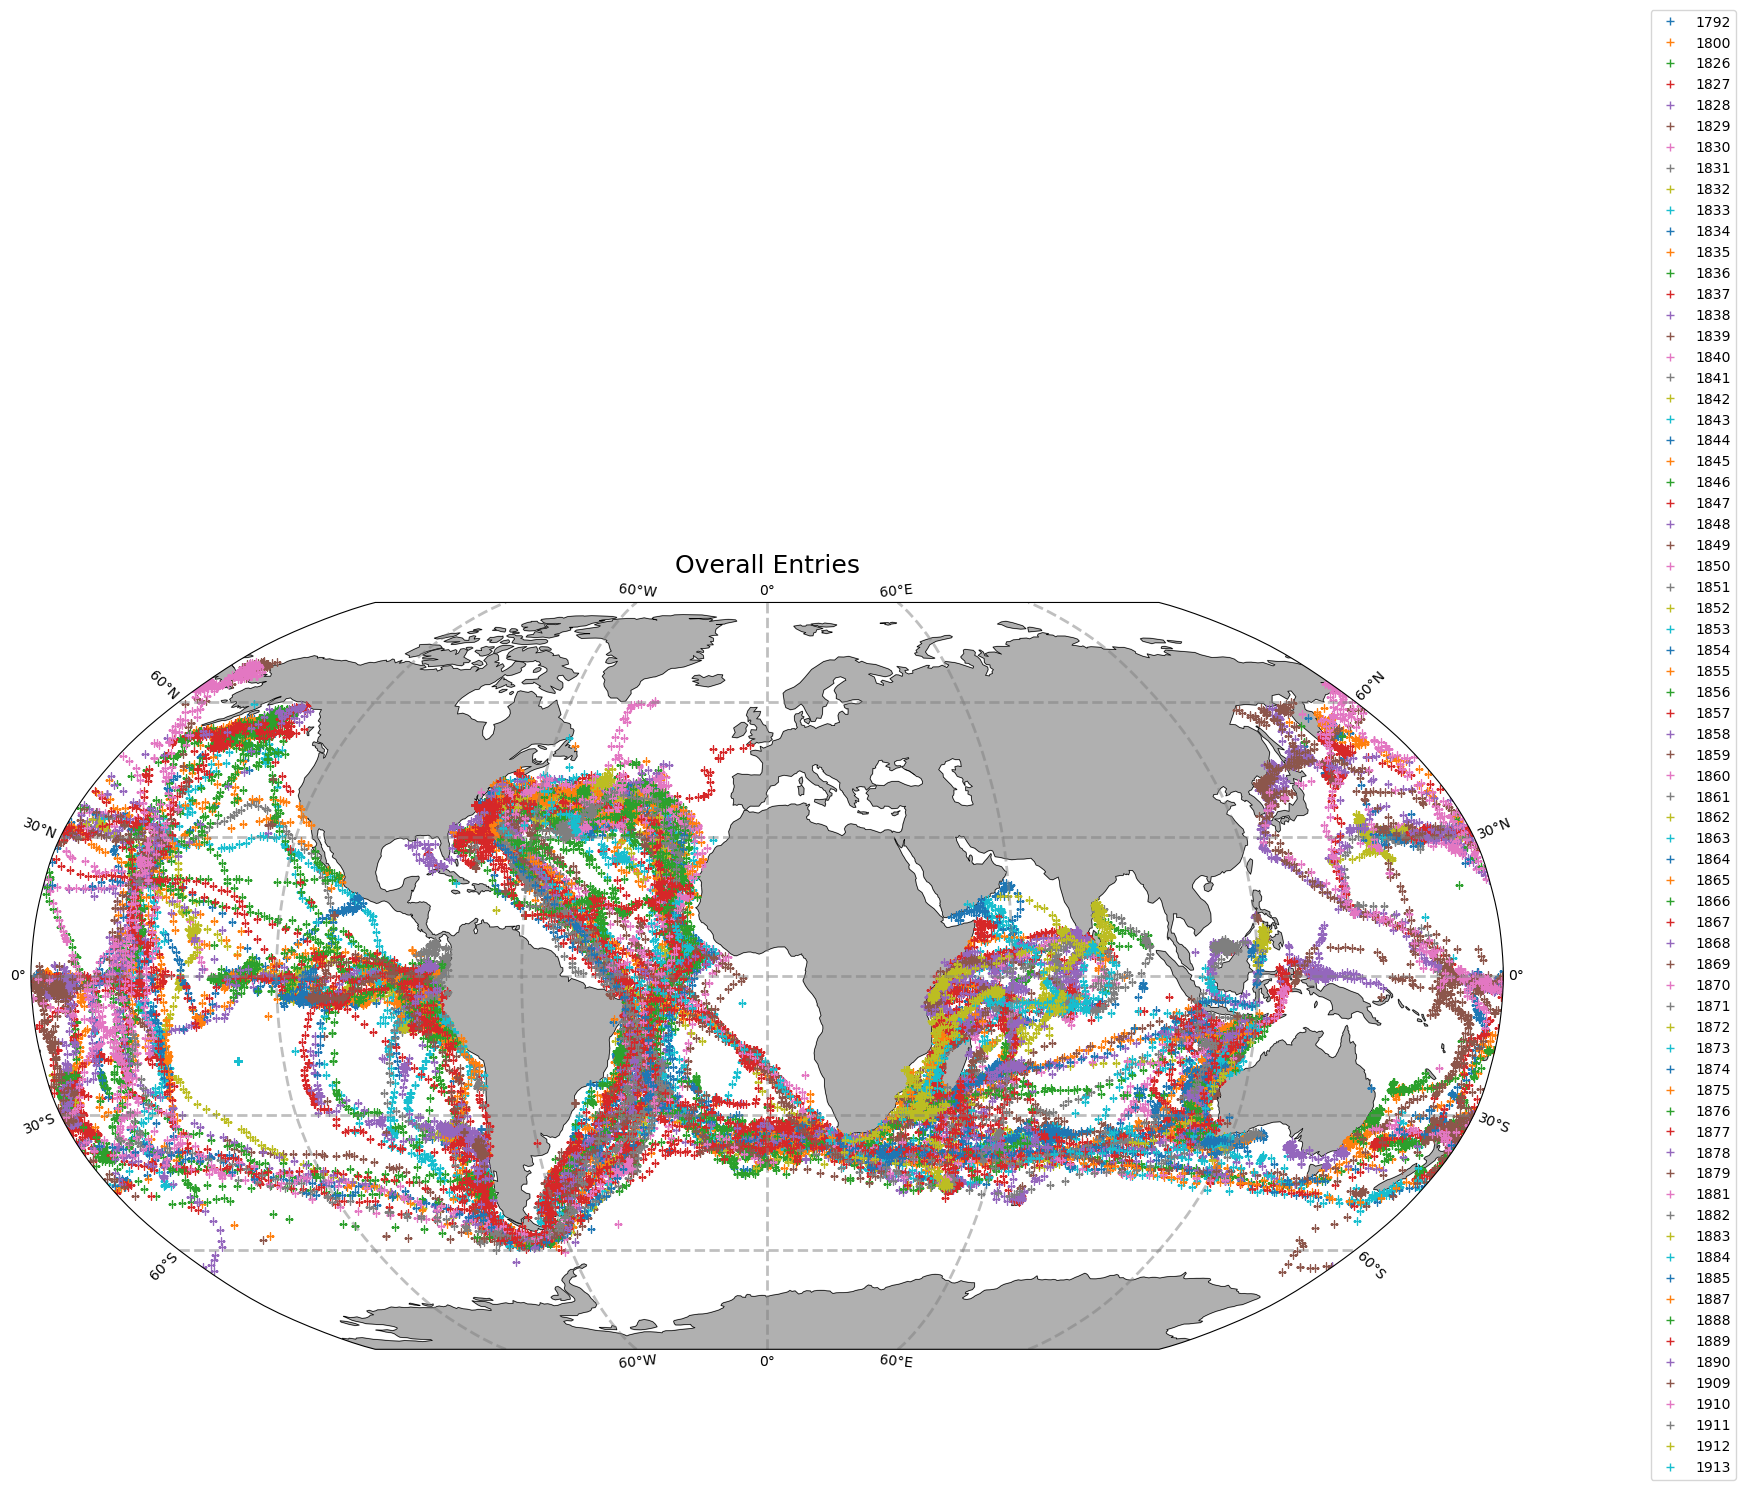

In [34]:
fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
for yr in sorted(df['Entry Date Time'].dt.year.dropna().unique()):
    work = df[df['Entry Date Time'].dt.year == yr]
    _ = ax.plot(work.Longitude, work.Latitude, '+', transform=ccrs.PlateCarree(), label='{:.0f}'.format(yr))
    print(yr,': ',np.shape(work))

_ = ax.legend(loc=(1.1,-0.175))
plt.title('Overall Entries',fontsize=18)

fig.savefig('Clean_up_plot_V5_Jan23.svg',bbox_inches='tight')
fig.savefig('Clean_up_plot_V5_Jan23.jpg',bbox_inches='tight',dpi=300)

Geographic Selection of "strange" entries

In [35]:
df[(df["Latitude"].between(50,60,inclusive=True)) & (df["Longitude"].between(-30,-20,inclusive=True))]

C:\Users\milon\AppData\Local\Temp\ipykernel_32392\365553686.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df[(df["Latitude"].between(50,60,inclusive=True)) & (df["Longitude"].between(-30,-20,inclusive=True))]


,DateTime,ID,LogBook ID,Direction,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time,coord_diff


In [36]:
df.loc[df["LogBook ID"]=="Abigail (ship) 1847-1850"]

,DateTime,ID,LogBook ID,Direction,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time,coord_diff
36329,1850-07-26 12:00:00,23758,Abigail (ship) 1847-1850,NaN,NaN,NaN,NaN,NaN,fathoms,NaN,NaN,SE by S,45.0,moderate trades,NaN,NaN,NaN,1850-07-26 12:00:00,False
36330,1850-07-25 12:00:00,23757,Abigail (ship) 1847-1850,NaN,NaN,NaN,NaN,NaN,fathoms,NaN,NaN,SSE,90.0,"""the wind""",NaN,squally,NaN,1850-07-25 12:00:00,False
36332,1850-07-24 12:00:00,23755,Abigail (ship) 1847-1850,NaN,NaN,23.900000,-155.316667,NaN,fathoms,NaN,NaN,SE by S,45.0,more moderate trades,NaN,NaN,NaN,1850-07-24 12:00:00,False
36335,1850-07-23 12:00:00,23752,Abigail (ship) 1847-1850,NaN,NaN,25.516667,-155.750000,NaN,fathoms,NaN,NaN,SE,67.5,strong trades,NaN,NaN,NaN,1850-07-23 12:00:00,False
36339,1850-07-22 12:00:00,23748,Abigail (ship) 1847-1850,NaN,NaN,NaN,NaN,NaN,fathoms,NaN,NaN,SE,67.5,strong trades,NaN,NaN,NaN,1850-07-22 12:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40580,1847-10-31 12:00:00,19448,Abigail (ship) 1847-1850,NaN,NaN,NaN,NaN,NaN,fathoms,NaN,NaN,SE,45.0,gale,NaN,NaN,NaN,1847-10-31 12:00:00,False
40582,1847-10-30 12:00:00,19446,Abigail (ship) 1847-1850,NaN,NaN,36.233333,NaN,NaN,fathoms,NaN,NaN,NaN,67.5,strong winds,NaN,NaN,NaN,1847-10-30 12:00:00,False
40583,1847-10-29 12:00:00,19445,Abigail (ship) 1847-1850,NaN,NaN,NaN,NaN,NaN,fathoms,NaN,NaN,SSE,NaN,strong winds and squally,NaN,squally,NaN,1847-10-29 12:00:00,False
40585,1847-10-28 12:00:00,19443,Abigail (ship) 1847-1850,NaN,NaN,NaN,NaN,NaN,fathoms,NaN,NaN,SSE,NaN,light winds,NaN,pleasant,NaN,1847-10-28 12:00:00,False


C:\Users\milon\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\milon\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\milon\anaconda3\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

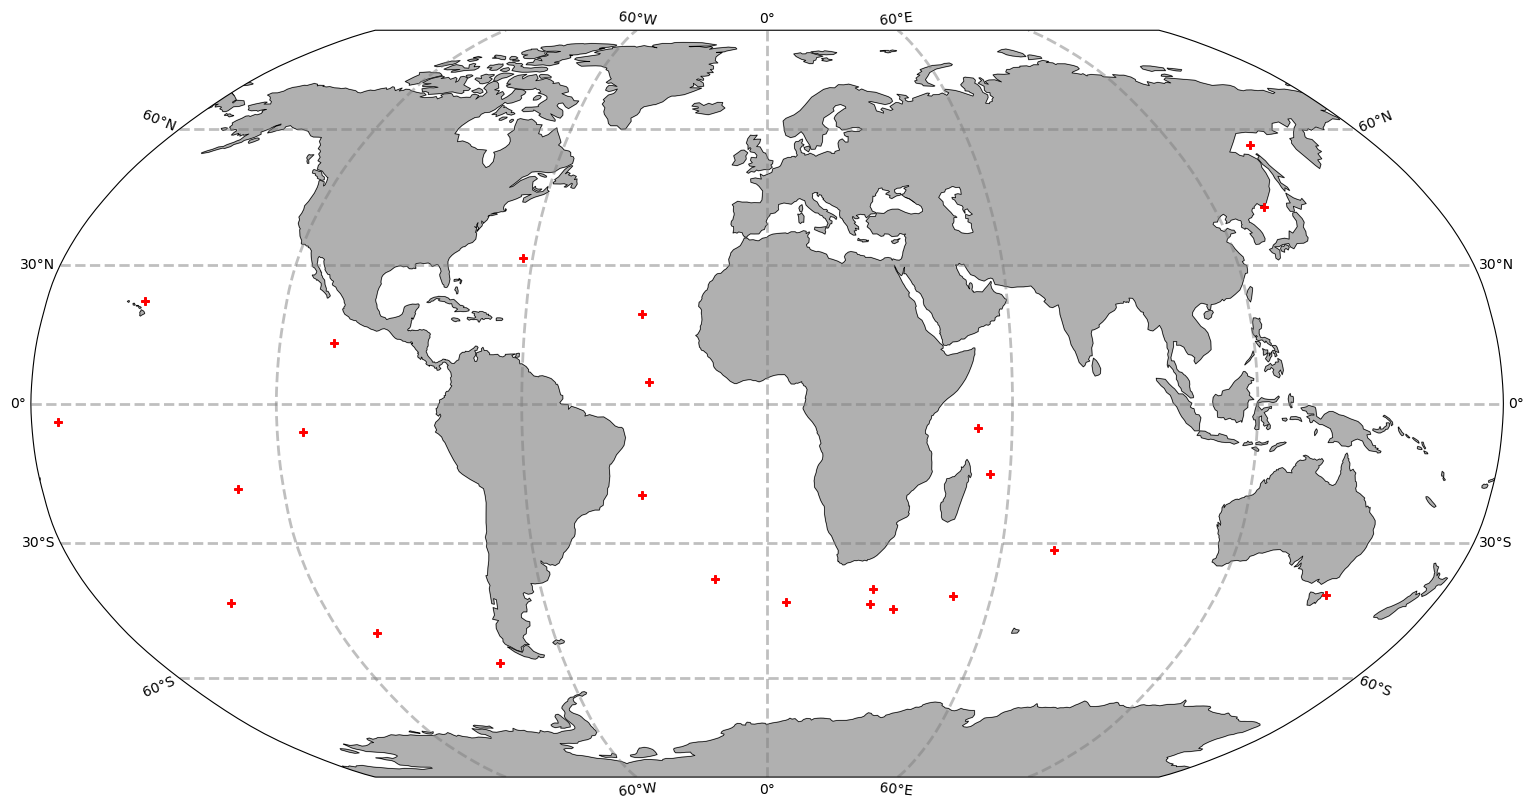

In [37]:
# Plotting Remaining Flagged Data
fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
for err in df[df['coord_diff'] == True]:
    work = df.loc[df['coord_diff'] == True]
    _ = ax.plot(work.Longitude, work.Latitude, '+', color='r', transform=ccrs.PlateCarree(), label='{:.0f}'.format(yr))
    #print(yr,': ',np.shape(work))

#_ = ax.legend(loc=(1.1,-0.175))

# fig.savefig('NA_Unique Years.png',dpi=200)

### Unique Values

In [38]:
for col in ['Wind Direction', 'Wind Speed/Force', 'Sea State', 'Cloud Cover', 'Weather']:
    print(col+':')
    vallist = df[col].dropna().unique()
    vallist.sort()
    print(vallist, '\n \n')

Wind Direction:
[0.0 11.25 22.5 33.75 37.5 45.0 52.5 56.25 60.0 67.5 75.0 78.75 90.0
 101.25 105.0 112.5 120.0 123.75 127.5 135.0 142.5 146.25 150.0 157.5
 165.0 168.75 180.0 191.25 202.5 210.0 213.75 217.5 225.0 236.25 240.0
 247.5 258.75 270.0 281.25 285.0 292.5 300.0 303.75 315.0 326.25 330.0
 337.5 348.75] 
 

Wind Speed/Force:
['"a wind"' '"blowing hard"' '"breeze"' '"breezed on"' '"continual gales"'
 '"dead calm"' '"fine breeze"' '"fine hole sail breeze"'
 '"fine hole sail breeze"s' '"fine hole sail breezes"'
 '"gale more moderate"' '"light and []* wind"' '"light easterly winds"'
 '"moderate at day light wind freshened"' '"moderate gale"'
 '"moderate trades"' '"moderate visible winds"' '"moderate wind"'
 '"moderate winds"' '"moderate"' '"more moderate"'
 '"sometimes calm and at others blowing a gale"' '"strong trades"'
 '"the wind"' '"the winds"' '"under short sail"' '"verible" winds'
 '"whole sail breeze"' '"wind freshened"' '"winds"' '"winds" squally'
 '"winds"/squally' '"winds

In [39]:
unique_ws = df['Wind Speed/Force'].dropna().unique()
print(unique_ws)

['light breezes' 'fine breezes' 'fresh breezes' 'moderate breezes'
 'light winds and very baffling' 'light winds' 'fresh winds' 'dead calm'
 'strong winds' 'calm' 'winds' 'strong breezes' 'light breezes & calms'
 'light trade winds' 'strong trade winds' 'fresh trades' 'strong trades'
 'moderate gales' 'strong winds & squally' 'squally' 'brisk' 'strong'
 'light' 'strong gales' 'moderate' 'moderate trades' 'calms by spells'
 'strong breezes & some squally' 'calms' 'light breezes & calms by spells'
 'light airs' 'pleasant' 'calm winds' 'heavy gales' 'very light'
 'light trades' 'moderate winds' 'breezes' 'blowing fresh' 'light air'
 'blowing strong' 'fresh gales' 'more brisk' 'more moderate' 'inclining'
 'brisk trades' 'fine trades' 'frequent & light squalls' 'light baffling'
 'light winds and calms' 'fine winds' 'nice breezes' 'verible winds'
 'strong gale' 'little breezes' '"under short sail"' 'good breezes'
 'heavy gale' 'fresh gale' 'strong breeze & squally' 'very light breezes'
 '"ve

Mapping unique 'Wind Speed/Force' values onto Beaufort Scale values (0-12)

In [40]:
unique_ws_0 = ['calm','calm and baffling','calm & baffling','calms','wind died away, shifted suddenly','calm no winds','pretty much calm','dead flat',\
              'flat calm','"dead calm"','calm winds','calmes','died away','lulls','lulled','calmy','calm,','no winds','dead calm','not much winds',\
              'wind out','calm or nearly so','variable & calm','calms by spells','"Under short sail"','calm nearly','too calm','Calm wind',\
              'no wind','not much wind','calm breeze','calm & bafling','Calm No Wind','fine calms']
unique_ws_01 = ['light airs & calms','light airs & calm','light winds & calms','light variable winds & calms','light airs, with calms',\
                'light variable winds and calms','light airs and calms','light airs with calms','light airs/calms','calm and light winds',\
                'light winds and calms','calms & light airs','little or no winds','light wind and calms','light winds with calms','almost a calm',\
                'nearly a calm','nearly calm','light airs, calm','light airs, calms','light baffling airs and calm','light variable & calms',\
                'light and calm airs','light airs and calm','light breezes and calms','light baffling airs and calms','baffling airs and calms',\
                'light and calm breezes','airs and calms','light calm winds','high airs and calms','light air & calm','light to no winds','light & calm',\
               'light & calms','light breezes & calms','calms & light breezes','calms & light variable breezes','light winds & variable with calms',\
               'light airs & calms & baffling','baffling & calms','calms & transient breezes', 'calms & light variable airs','calm and then light breezes',\
               'light & variable & calms','light air inclining to calm','light airs inclining to calm','light airs inclining to calms','variable breezes and calms',\
               'light baffling & calms','light airs and clams','calm with light variables','calms with light variables','light airs inclined to calm',\
               'light airs inclines to calm','calm & baffling with now & then breezes','very faint airs','almost calm','light variable airs and calms',\
               'baffling & calm','light airs variable & calms','light next to calm','calms with some light airs','light variable breezes and calms',\
               'light breezes & calm','calm or very light breezes','calm & light breezes','light air & calms','very light & baffling','very light baffling',\
               'calm and variable winds','variable winds and calms','very light air & baffling','light breezes & calms by spells','light baffling & calm',\
               'light variable airs & calms','Fine Calms','variable airs calm','variable airs calms','light airs & clams','variable airs & calms',\
               'light variable air & calms','light airs calms','calms & squally','calm & baffling with now & then breeze','little or no wind',\
               'very light wind','Light and calm wind','light to no wind','Little or no wind','Calm & Light Bafling Winds','Light Bafling Winds & Calms',\
               'Calm, light bafling breezes','light and bafling with a good part calm','light bafling winds and calm','light and bafling with calms',\
               'light bafling winds and calms','light bafling airs and calm','Light aires, with calms','Calm and Light Wind']
unique_ws_1 = ['light airs and variable','light baffling airs','light baffling','light airs and very baffling','airs','very light air','light airs',\
              'light air','light airs from land','light airs variable','light airs & baffling','pleasant light air','very light airs',\
               'light air & baffling','light airs, variables','calm, light breezes','calm breezes','calm & light baffling winds','light baffling winds & calms',\
              'calm, light baffling breezes','light and baffling with a good part calm','light baffling winds and calm','light and baffling with calms',\
               'light baffling winds and calms','light wind with calms','light variable airs','light airs & variable','light wind and calm',\
              'light varibale','more light','light land & sea breezes','light airs & changeable','light winds and then calm','light (winds), calm',\
              'very light winds','very light trade winds','light trades and calms','light airs of winds','light air of winds','light airs and squally','light airs and baffling',\
              'light breezes & baffling','faint airs','light winds & calm','light winds calms','light trades & calms','light variable winds & calm',\
              'calm with light winds at intervals','light trades & calms','flairs of wind and calms','calms light winds','light winds and calm','Very light breeze',\
              'Short interval light breezes','Occasional light airs','Light Breeze & Easing','light airs & clear','very light breeze','Very Light Wind',\
              'little wind','very light trade wind','Light Airs of Wind','light air of wind','light airs of wind','Light Bafling Breezes',\
              'light bafling airs','light and bafling','light bafling','Light aires','little breezes','short interval light breezes','occasional light airs',\
              ]
unique_ws_2 = ['light winds','light','light baffling winds','small winds','small breezes','light variable winds','light winds & variable',\
               'light winds and variable','light sea breezes','light trades','light breezes and baffling','light breeze and baffling',\
               'wind light and baffling','light and baffling winds','light winds & baffling','light breezes','light breeze from bay',\
               'light breezes and baffling','baffling','light variable','light & variable','very light & pleasant','very light breezes','very light',\
               'light & baffling','light, variable','llight, variable','light baffling breezes','light land breezes','light and variable',\
               'light and baffling','light wind variable','light land and sea breezes','light wind & flowy','blowy & baffling','baffling and light',\
               'baffling and flowy winds','light  breezes','light breeze & baffling','light breezes and variables','light breezes & variable',\
              'light (winds)','baffling winds','"light and []* wind"','light and calm winds','light (wind)','light trade winds','light and pleasant breezes',\
              'lights winds','light traids','light wind and variables','light wind and variable with calms','light wind and variable','breeze light',\
              'light (breezes)','light variable breezes', '"light easterly winds"','light trade','light &variable','light baffling trades','light pleasant breezes',\
              'light brezes','light breezes & squally','light trade wind with frequent squalls','light windss with frequent squalls of winds',\
              'light winds & squally','light breeze & squally','lighter winds','light squalls of winds','light winds and variables','pleasant light breezes',\
              'light and gentle breezes','light breezes and squally','light unsteady winds','feather winds','light breeze and squalls','light very unsteady breezes',\
              'soft winds','light winds and baffling','light variables','light steady winds','light & baffling winds','lightv breezes','light baffling & variable',\
              'steady & light','(light) breezes','steady & light','light steady','light head winds','6 knot breezes','5 knot breezes','light & somewhat baffling',\
              'moderate winds & calms','little winds','light and pleasant variables','calm and moderate','light flattening breezes','Light Breeze','Light Winds and Very Baffling',\
              'light breeze','Light Wind','Light breeze','Little breeze','Light wind','light wind','light trade breeze','light breeze & freshene',\
              'light breeze & freshening','light breeze & freshens','light airs & squalls','light land breeze','Light Sea Breeze','6 knot breeze',\
              '5 knot breeze','light trade wind','light winds with frequent squalls of wind','light squalls of wind','gentle wind','Soft Wind',\
              'Light Baffling Wind','Light Variable Wind','Light Baffling Breeze','LIght Breeze','Light breeeze','Light  breeze','light sea breeze',\
              'Light Bafling Winds','Light Bafling','light variable wind','small wind','light baflin winds','light bafflin','Light and blaffling winds',\
              'Light light winds','Small Wind','light winds and very baffling','"under short sail"','light trade breezes','light breeze & easing']
unique_ws_23 = ['pleasant breezes','pleasant winds','more pleasant','pleasant','nice & pleasant','nice breezes','very pleasant','nice',\
                'pleasant baffling','pleasant (breezes)','pleasant trades','pleasant breezes & various','more pleasant breezes','pleasant trade winds',\
               'pleasant sea breezes','light pleasant trades','moderate trades & calms','light breezes & calm & squally','calm & light squalls','7 knot breezes',\
               'very pleasant winds','strong calm','pleasant breeze','steady breeze','pleasnat breezes','pleasant sea breeze','7 knot breeze',\
               'Very Pleasant Wind','light topgallant breeze','Pleasant light breeze','more pleasant breeze','Pleasant Wind','Pleasant Breeze']
unique_ws_3 = ['gentle winds','gentle','gentle breezes','3','fine winds and light','gentle breezes & variable','gentle trades','light topgallant breezes','light and fresh',\
              'gentle & variable','fine light breezes','light and fresh breezes','moderate breezes and calms','moderate trades and calms','light winds calms & heavy squalls',\
              'fresh gales & calms','nice steady breezes','nice breeze & baffling','nice breeze baffling','smooth breezes','baffling & freshening',\
              'nice working breezes','squally light winds','fine and pleasant','frequent & light squalls','Good breeze','nice steady breeze',\
              'Gentle Wind','Gentle wind']
unique_ws_4 = ['moderate winds','moderate breezes','moderate','good breezes','moderate winds & variable','moderate winds between squalls','moderate baffling winds',\
               'moderate and baffling winds','more moderate','wind moderated a little','moderate trades','wind continued and moderated a little',\
               'moderate trade winds','moderate winds & baffling','"more moderate"','"moderate"','moderate baffling','moderating','moderating breezes',\
               'quite moderate','moderates','a little more moderate','moderate variable','moderate increasing winds','moderate wind variable',\
              'fine winds and gentle','moderate whole sail breezes','good wholesale breezes','moderate & variable','moderate breezes & variable',\
              'moderate airs','"moderate trades"','moderated between squalls','moderated','"moderate wind"','"moderate visible winds"','"moderate winds"',\
              'moderate (winds)','moderate wind light and baffling','moderarte breezes','modest winds','moderate wind and squally','more moderate winds',\
              'inclining to moderate','mor moderate','more modest','moderate  breezes','"moderate at day light wind freshened"','good','whole sail breezes',\
              'whole sail','moderate breeze & squally','moderate breezes with light squalls','moderate winds & squally','moderate trade winds with frequent squalls of wind',\
              'moderate trades & squally','moderate trade','good breeze with frequent squalls of winds','moderate traes','very steady moderate breezes',\
              'modertae trades','moderatre','more moderate trades','moderate trade winds with frequent squalls of winds','very moderate breezes','very moderate trades',\
              'fair trades','moderate baffling breezes','moderate breezea','light winds heavy squalls','calms & squalls','heavy squalls & calms',\
              'calms heavy squalls','calms squalls','squalls calms','light winds heavy squalls & calms','heavy squalls calms','moderate variable breezes',\
              'moderate variable winds','fresh gales & calms','moderate and rainy','fresh gales calm','moderate btreezes','moderate variable winds',\
              '"sometimes calm and at others blowing a gale"','light breeze & squalls','very moderate & pleasant winds','moderates breezes',\
              'moderate but rough','moderate breeze & baffling','strong and light winds','light and strong winds','Moderate Breeze','Moderate breeze',\
              'Moderate wind','Moderate Wind','moderate breezesQENE','moderate breeze','moderate breezes but variable','moderate breeze & freshened',\
              'moderate breeze & pleasant','moderate wind','moderate winds with some squalls of wind','nice all sail breeze','good all sail breeze',\
              'moderating breeze','very moderate & pleasant wind','moderates breeze','topgallant breeze','middling strong topgallant breeze',\
              'moderate trade wind','moderate trade wind with frequent squalls of wind','very steady moderate breeze','Moderate  breeze',\
              'Fair Wind','moderarte breeze','modest wind','More Moderate Wind','moderate increasing wind','fair breeze','Moderate whole sail breeze',\
              'Moderate Breezs','Moderate Winds & "Baffling"','mild wholesail breezes','moderate breezesqene']
unique_ws_45 = ['fine winds','fine breezes','fine, moderate winds','fine, moderate breezes','fine','fine light winds','fine trades','very fine winds',\
                'very fine breezes','fine fresh breezes','fine moderate breezes','fine sea breezes','fine breezes & rugged','fine pleasant','fine trade winds',\
               'fine pleasant trades','fine land & sea breezes','fine trade','topgallant breezes','rugged winds','fine leading breezes','fine trade breezes',\
               'fine baffling breezes','fine whole sail breezes','"fine hole sail breeze"s','"fine hole sail breeze"','"fine hole sail breezes"','"fine breeze"',\
               'fine pleasant (breezes)','moderate gales calms','moderate trades with some squalls','moderate windss with some squalls of winds',\
               'fine pleasant winds','winds & squally','nice all sail breezes','handsome breezes','fine pleasant trade winds','fine breezes and calms',\
               'good all sail breezes','nice all sail breeze & baffling','fine breeze','Fine wind','Nice breeze','Fine breeze','Mild wholesail breeze',
               'Fine Breeze','fine trade breeze','fine breeze & squally by spells','fine pleasant breeze','good breeze','fine wind','nice breeze',\
               'Handsome Breeze','nice working breeze','Good Breeze','Fine Wind','good breeze with frequent squalls of wind','fine leading breeze',\
               'fine trade wind','Fine Trade Breeze','Buffed by the Wind','Buffed by the wind','fine sea breeze','Good Wholesale Breeze',\
               'Fine widns','Fne Wind','Very Fine Wind','Very fine breeze']
unique_ws_5 = ['fresh winds','fresh land breezes','fresh trades','fresh','blowing fresh','blows fresh','fresh breezes','freshening','fresh variable',\
              'fresh steady breezes','fresh baffling','freshening breezes','fresh baffling breezes','fresh breezes & baffling','very fresh breezes',\
              'fresh trade','fresh sea breezes','fresh light breezes','fresh trade winds','fresh breeze and baffling','blowed fresh','fresh  breezes',\
              'fresh breezes & variable','breezes fresh & variable','fresh but steady','"wind freshened"','freshens','fresh breezes & changeable',\
              'fresh breeze & baffling','fresh airs','fresh breezes & squally','blew fresh','fresh winds & squally','fresh breeze & squally',\
              'steady breeze & howling','fresh trade breezes','fresh winds & squally','fresh trades and squally','fresh breezes baffling and flowy',\
              'fresh winds and squally','fresh breezes & flawy','fresh increasing winds','breeze fresh','quite fresh','blowing  fresh','fresh breezes & good winds',\
              'fresh & variable','moderate breezes & squally','fresh breezes variable','fresh breezers','very fresh trades','quick breezes',\
              'fresh ne trade winds','quick breezes & squally','Fresh Breeze','Running winds','fresh breeze','Fresh breeze','stiff breeze','Fresh breeze and squally',\
              'Fresh Wind','fresh breezes & squalls','fresh trade wind','fresh sea breeze','fresh breeze with squalls of wind','fresh breeze/squalls of wind',\
              'freshening breeze','fresh wind','strong but moderating breeze','Fresh  breeze','Fresh Trade Breeze','Fresh wind','fresh steady breeze',\
              'fresh baffling breeze','very fresh breeze','Fresh land breeze','fresh breeze and squally']
unique_ws_56 = ['breezesd up to brisk breezes','moderate with squalls','fresh passing squalls','fresh squalls','light squalls','light squalls & baffling',\
               'a little squally','a few squalls','strong fresh breezes','fresh strong breezes','fresh breezes with passing squalls','fresh breeze with squalls of winds',\
               'fresh breeze/squalls of winds','some light squalls','some heavy winds','strong but moderating breezes']
unique_ws_6 = ['strong winds','brisk winds','brisk breezes','strong winds & variable','strong south','strong wind, heavy squall with a tempest',\
              'strong squall','squall winds','strong trades','strong blows','strong trade','strong winds and breezes','brisk trade',\
              'strong wind under double reefed top sails','heavy winds','squalls','strong trade winds','brisk trades','heavy breezes','high winds',\
              'strong squalls','strong airs','very strong winds','blowing hard','blows strong','blowing strong','strong breeze and squally winds',\
              'strong breezes','strong','squally','strong land breezes','strong sea breezes','heavy','blowing very heavy','very strong','blowing very hard',\
              'stiff breezes','blowing on in squalls','strong baffling','quite heavy squalls','blowing up heavy in squalls','blowing heavy',\
              'squall','raging & squally','blows hard in squalls','very strong breezes','strong heavy breezes','very heavy','hard','hard in squalls',\
              'blowing strongly','strong varianble winds','blows heavy','strong squalls of winds','breeze heavy','strong in squalls','strong flows',\
               'hard squalls of wind & rain','strong breeze & rugged','brisk breeze & breezing on','squally winds','heavy squall',\
               'brisk with a little variation','brisk & variable','severe','"blowing hard"','"strong trades"','strong breezes & variable','brisk',\
               'strong & variable','heavy squals','big winds','very strong trades','strong (winds)','strong winds and squally','brisk trade winds',\
              'very heavy squalls','squalls of rain','strong breezes and squalls and calms betwixt them','strong brerezes','variable & strong',\
              'smart squall','sharp squalls','very squally','strong wind and squally','strong  winds','heavy squals of winds','squally with rain',\
              'winds squally','strong wind with light squalls','very windy','high airs','squally with heavy rain','strong variable','more brisk',\
              'frequent squalls','strong flaws','squally & baffling','quite strong','strong land & sea breezes','smart breezes','strong breezes & squally',\
              'strong baffling winds','middling strong','rather strong','strong (wind) & squally','strong trades & squally','strong winds, squally',\
              'strong wind & squally','strong topgallant breezes','middling strong topgallant breezes','very squally winds','very windy squally',\
              'strong trade wind with frequent squalls','strong trade winds with frequent squalls of winds','strong trade wind with squalls',\
               'strong trade wind & very squally','strong breeze with frequent squalls','strong winds with frequent squalls','began to blow hard',\
              'blowed heavy','strong winds & squally','strong trades & very squally','strong breeze. & very squally','strong breeze & squally',\
              'squalls of strong winds','(strong) trades','strong trades and squally','strong breeze and squally','brisk breeze and squally',\
              'strong winds and variables','strong very unsteady','strong & hard squalls','strong and steady winds','strong wind & squalls',\
              'strange (strong?) winds','strong wind & squall','strongwinds','strong winds with squalls','strong breeze & very squally',\
              'strong very unsteady winds','strong wind and squalls','strong wind and squall','white squall','thick winds','brisk trades with passing squalls',\
              'brisk breezes with passing squalls','brisk with passing squalls','brisk sea breezes','brisk squall','strong breeze "moderating gradually"',\
              '"whole sail breeze"','streong breezes','blew rugged','heavy sea','strong trade breezes','stiff','still blowing heavy','strong breezes & hard squalls of winds',\
              'strong winds & very squally','strong breeze & baffling','breeze in squalls','blowing heavy in squalls','brisk breezes & squally',\
              'brisk winds & squally','strong winds & hard squalls','strong winds & hard squalls','rough winds','blowing hard winds','fresh breeze increases to a gale',\
              'variable squalls','strong winds & some squally','strong breezes & very squally','strong breeze','Strong Breeze','strong breezes & some squally',\
              'Strong breeze','Strong wind','Strong Wind','Wholesail breeze','strong breeze & squally by spells','strong breezes & squally by spells',\
              'Strong breeze and squalls','Strong Westerly Wind','smart squalls','strong trade breeze','strong & increasing breeze','rugged & squally by spells',\
              'brisk breeze','strong winds & squalls','strong wind','strong wind & heavy squalls','Thick strong breezes','brisk brezzes',\
              'Brisk Wind','Thick Wind','Brisk Breeze','brisk sea breeze','smart breeze''streong breeze','some heavy wind','brisk trade wind',\
              'strong breezes & hard squalls of wind','strong trade wind','Rough Wind','Heavy Squalls of Wind','brisk wind','whole sail breeze',\
              'strong topgallant breeze','very squally wind','heavy squalls of wind','strong trade wind with frequent squalls of wind',\
              'very strong trade wind & squally with considerable wind','squalls of strong wind','strong squalls of wind','strong and steady wind',\
              'squalls of wind','strange (strong?) wind','strongwind','Heavy wind','Fine whole sail breeze','Squally Wind','Heavy Wind',\
              'Brisk wind','Strong  wind','squally wind','strong land breeze','strong sea breeze','Strong Varianble Wind','Strong Squalls of Wind',\
              'Strong widns','breezed up to brisk breeze','String winds','Smart breeze','none given ["double reefed = strong wind"]','Strong Breeeze',\
              'Strong Breeze and Squally Wind','wholesail breezes','strong breeze and squalls','strong westerly winds','strong & increasing breezes',\
              'thick strong breezes']
unique_ws_67 = ['strong winds and light gales','nearly a gale','fresh breeze or moderate gale','heavy squalls of winds','heavy squalls','hard squalls',\
               'hard squall','strong squally','strong flares','very strong squally','very strong trade winds','very bad windy',\
                'very strong trade winds & squally with considerable winds','strong winds to a gale','very heavy squall','gale or a very strong breezes',\
               'very strong breeze','very strong wind','very strong trade wind']
unique_ws_7 = ['light gales','gentle gales','fine gales','gentle gale','pleasant gale','pleasant gales','young gale','light gale','light gail',\
               'gentle gale & variable','pleasant gail','almost a gale','half a gale','a half a gale of winds','gale abating fast','decreasing gales',\
              'half a gale of winds','tale end of a gale','half gales','gale & some hard squalls','moderate gales with some light squalls','blew almost a gale',\
              'light and pleasant gales','very light gales','light and pleasant gales','blowing a small gale','Half a gale of wind','a half a gale of wind']
unique_ws_8 = ['moderate gales','gale','gales','blowing a gale','gale moderated a little','gale moderated some','gale continued','gale moderated',\
               'gale increasing','wind increased to a gale','gale, moderated a little','increased to a gale','moderate gale','blowing a moderate gale',\
               'blowing a gale of winds','moderating gale','gale of winds','moderate gales & variable','"moderate gale"','gales increasing','gale continues',\
              'gail','more moderate gale','moderade gales','"gale more moderate"','"continual gales"','quite a gale','a gale of winds','gale winds',\
              'gales of winds','increasing gales','gale & squally','increasing gale','(?) gales','a gale','gale and squally','gale begins to moderate a little',\
              'gale variable','blows a gale','moderating gale baffling','Gale(s)','Moderate Gail','A gale of wind','Gales of wind','Gale of wind',\
              'gale of wind','Gale of Wind','gale or a very strong breeze','Gales of Wind','Blowing a Gale of Wind','gale(s)','moderate gail']
unique_ws_89 = ['fresh gale','fresh gales','fine gales','blowing a fresh gale','gales increase','fresh gail','blowing fresh gale','fresh gales & squally',\
               'fresh gales and squally','fresh gales with passing squalls','fresh gales & squally & variable','fresh baffling gale','freshening gale','fresh gales & squalls']
unique_ws_9 = ['heavy gale','strong gale','strong gales','very heavy gale','heavy gales','blowing a strong gale','blowing a heavy gale','brisk gales',\
              'strong gale (slowly decreasing)','heaving gales','stiff gales','blowing heavy gale','strong gail','blowing a smart gale','blowing strong gale',\
              'almost a storm','smart gale','hard gales','light tempest','strong gales & squally','violent gales','stronggale','strong gale & squally',\
              'heavy gale with frequent squalls of winds','heavy gale with frequent squalls','brisk gale','very strong gale & increasing','a quite heavy gale',\
              'severe gale','very heavy gales','severe gales','gale blowing strong','strong gales and squalls','strong gales and squally',\
              'strong gales with very heavy squalls of winds','brisk increasing gales','heavt gales','bad gale','tremendous gale','strong gales variable',\
              'hard gale','strong gales & variable','strong ales','strong gales of winds','heavy gales of winds','typhoon or gale','blew hard gale',\
              'blew a heavy gale','strong gales & heavy squalls','strong gales & squalls','Strong gales of wind','Heavy gales of wind',\
              'heavy gale with frequent squalls of wind','strong gales with very heavy squalls of wind','Heavy squals of wind']
unique_ws_10 = ['storm','stormy','storming heavy','storming a gale','a very heavy tempest','rain storm winds','strong gales & very squally',\
               'Rain Storm Wind']
unique_ws_12 = ['12','perfect hurricane','fishmans hurricane','hurricane']
unique_ws_nan = ['variable','variable winds & weather with calms','variable winds & weather','changeable winds','light tempest',\
                 'fair breezes','fair winds','fair','breezes','breezed up','double reef topsail breezes','winds','2 wind b',\
                 'wind increased','fresh and light winds','fresh and light breezes','blows on','blows','vering','variable winds',\
                 'changeable variable','changeable breezes','breezing on','breezing','breezy','breezing in','breezed','breeze up','breezes up',\
                'doublereef topsail breezes','steady winds','steady breezes','winds increase','blowing','heavy gales & pleasant','land & sea breezes',\
                'land breezes','land and sea breezes','rugged','blustering','none','fine pleasant breezes','"the winds"','"the wind"','breezing off and on',\
                'hauled','moderate and calm breezes','blowing on','fresh light airs','trades','strong breezes and calms','veering','lightened',\
                 'lightened up a little','lightened up','variable airs','increasing','trade','steady','light wind and squally','buffed by the winds',\
                'breeze sprang up','light brisk winds','breezed on','shifted','headed her off','hauled to','wind hauled to','increased winds',\
                 'light wind squally','"breezed on"','steady trades','luffed','rain','some squalls','more smooth','fine light','sea breezes',\
                'fine light air','squalls & calms','variable in strength','fine light airs','a little','sea winds','thick','variable winds & calms',\
                'standing off & on','increases','stronger','calms & variable breezes','wnw','sse','w half n','moderate winds and calms','se',\
                 'light wind and then fresh breezes','increasing breezes','"winds"','unsteady breezes','strong light','(wind)','leading breezes',\
                'puff of winds','"winds\'','"winds"/squally','"winds" squally','strong light trades','baffling & squally','variable & hard squalls'\
                'steady trade winds','unsteady winds','light & strong & calms','strong & light','light & strong','windy','strong & light & calms',\
                'fresh & light & calms','fine pleasant weather','squalls of winds','un-steady breezes','un-steady winds','continues to blow',\
                'variable & hard squalls','steady trade winds','decreasing breezes','head winds','various','dying away','w','"breeze"','variable & baffling',\
                'very baffling','trade winds','increasing winds','very breeze & baffling','baffling trades','breeze & baffling','"a wind"',\
                'breeze moderating','musty','sw by s','"wind"','Breeze','inclining','breeze','Verible wind','"Verible" winds','Wind',\
                'Unusual trade winds','"Verible" Winds', '(not given)','SW','increasaing breezes','(cut data)','Head Wind','"wind" & squally',\
                '"wind" squally','Unsteady breeze','leading breeze','puff of wind','Steady Wind','Unsteady Wind','Un-Steady Wind','Increased wind',\
                'land breeze','sea breeze','sea wind','land & sea breeze','wind','variable wind','changeable breeze','Bafling','from NE',\
                'Windq','"Wind"','verible winds','"verible" winds','running winds','unusual trade winds']

### Parsing Wind Speed/Force values from literal to Beaufort Scale

In [41]:
# Defining function parse_beaufort(x)
def parse_beaufort(x):
    ws = 0.
    if pd.isna(x):
        ws = x
    elif x.lower() in unique_ws_0:
        ws = 0.
    elif x.lower() in unique_ws_01:
        ws = 0.5
    elif x.lower() in unique_ws_1:
        ws = 1.
    elif x.lower() in unique_ws_2:
        ws = 2.
    elif x.lower() in unique_ws_23:
        ws = 2.5
    elif x.lower() in unique_ws_3:
        ws = 3.
    elif x.lower() in unique_ws_4:
        ws = 4.
    elif x.lower() in unique_ws_45:
        ws = 4.5
    elif x.lower() in unique_ws_5:
        ws = 5.
    elif x.lower() in unique_ws_56:
        ws = 5.5
    elif x.lower() in unique_ws_6:
        ws = 6.
    elif x.lower() in unique_ws_67:
        ws = 6.5
    elif x.lower() in unique_ws_7:
        ws = 7.
    elif x.lower() in unique_ws_8:
        ws = 8.
    elif x.lower() in unique_ws_89:
        ws = 8.5
    elif x.lower() in unique_ws_9:
        ws = 9.
    elif x.lower() in unique_ws_10:
        ws = 10.
    elif x.lower() in unique_ws_12:
        ws = 12.
    elif x.lower() in unique_ws_nan:
        ws = np.nan
    else:
        ws = x
    
    return ws

In [42]:
# Applying function to 'Wind Speed/Force' column
df['Wind Speed/Force'] = df['Wind Speed/Force'].map(parse_beaufort)

In [43]:
# Looking at unique values after mapping of strings onto Beaufort Scale values
unique_ws = df['Wind Speed/Force'].dropna().unique()
print(unique_ws)

[ 2.   4.5  5.   4.   0.   6.   0.5  8.   9.   1.   2.5  8.5  3.   6.5
  7.   5.5 12.  10. ]


### How many Entries are 'usable', i.e. exhibit Lat./Lon. and Wind Speed values?

In [44]:
df['usable'] = (df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Speed/Force"].notna())
df.loc[(df['usable']==True),"Entry Date Time"]

0       1849-07-15 12:00:00
1       1849-07-14 12:00:00
2       1849-07-13 12:00:00
3       1879-09-21 12:00:00
4       1849-07-12 12:00:00
                ...        
58833   1855-11-06 12:00:00
58834   1855-11-05 12:00:00
58835   1855-11-04 12:00:00
58836   1855-11-03 12:00:00
58837   1855-11-02 12:00:00
Name: Entry Date Time, Length: 35816, dtype: datetime64[ns]

### How many Entries are 'usable', i.e. exhibit Lat./Lon. and Wind Direction values?

In [45]:
df['usable_WD'] = (df["Latitude"].notna() & df["Longitude"].notna() & df["Wind Speed/Force"].notna() & df["Wind Direction"].notna())
df.loc[(df['usable_WD']==True),"Entry Date Time"]

0       1849-07-15 12:00:00
1       1849-07-14 12:00:00
2       1849-07-13 12:00:00
3       1879-09-21 12:00:00
4       1849-07-12 12:00:00
                ...        
58833   1855-11-06 12:00:00
58834   1855-11-05 12:00:00
58835   1855-11-04 12:00:00
58836   1855-11-03 12:00:00
58837   1855-11-02 12:00:00
Name: Entry Date Time, Length: 27866, dtype: datetime64[ns]

In [46]:
df.loc[(df['usable']==True),"Entry Date Time"]

0       1849-07-15 12:00:00
1       1849-07-14 12:00:00
2       1849-07-13 12:00:00
3       1879-09-21 12:00:00
4       1849-07-12 12:00:00
                ...        
58833   1855-11-06 12:00:00
58834   1855-11-05 12:00:00
58835   1855-11-04 12:00:00
58836   1855-11-03 12:00:00
58837   1855-11-02 12:00:00
Name: Entry Date Time, Length: 35816, dtype: datetime64[ns]

Map Usable Data

1800 :  (2, 21)
1826 :  (82, 21)
1827 :  (268, 21)
1828 :  (301, 21)
1829 :  (547, 21)
1830 :  (907, 21)
1831 :  (1309, 21)
1832 :  (1238, 21)
1833 :  (995, 21)
1834 :  (710, 21)
1835 :  (1019, 21)
1836 :  (771, 21)
1837 :  (600, 21)
1838 :  (675, 21)
1839 :  (563, 21)
1840 :  (402, 21)
1841 :  (705, 21)
1842 :  (518, 21)
1843 :  (1276, 21)
1844 :  (1596, 21)
1845 :  (1807, 21)
1846 :  (3099, 21)
1847 :  (3890, 21)
1848 :  (2441, 21)
1849 :  (1929, 21)
1850 :  (1458, 21)
1851 :  (666, 21)
1852 :  (339, 21)
1853 :  (257, 21)
1854 :  (248, 21)
1855 :  (192, 21)
1856 :  (32, 21)
1857 :  (167, 21)
1858 :  (155, 21)
1859 :  (81, 21)
1860 :  (124, 21)
1861 :  (154, 21)
1862 :  (169, 21)
1863 :  (170, 21)
1864 :  (91, 21)
1865 :  (95, 21)
1866 :  (125, 21)
1867 :  (161, 21)
1868 :  (220, 21)
1869 :  (45, 21)
1870 :  (26, 21)
1871 :  (208, 21)
1872 :  (123, 21)
1873 :  (123, 21)
1874 :  (239, 21)
1875 :  (139, 21)
1876 :  (104, 21)
1877 :  (209, 21)
1878 :  (307, 21)
1879 :  (220, 21)
1881 :  

C:\Users\milon\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\milon\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\milon\anaconda3\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

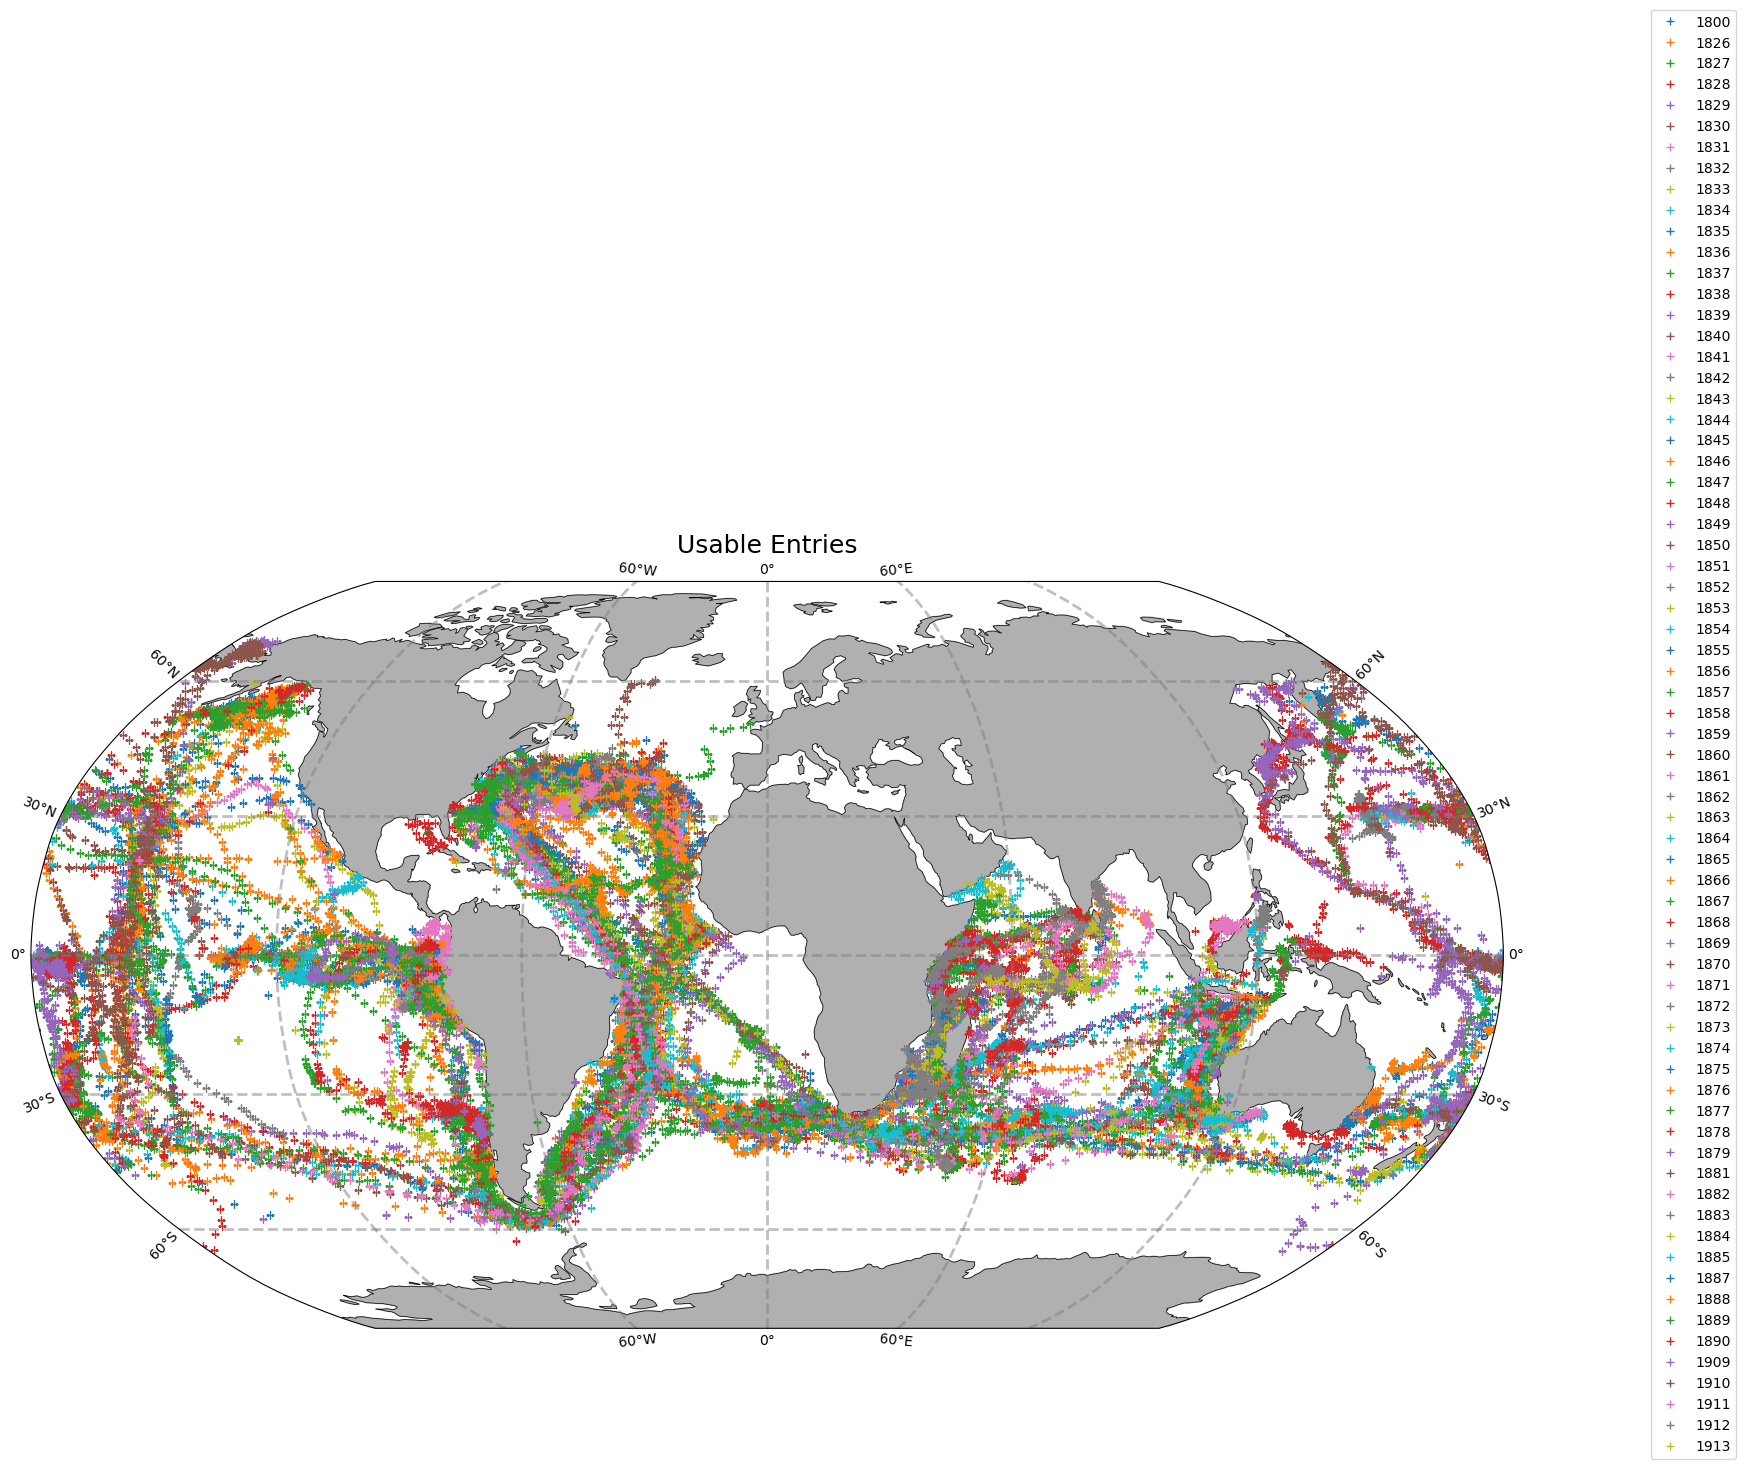

In [47]:
fig, ax = plt.subplots(figsize=(19,20),subplot_kw={'projection':ccrs.Robinson()})
_ = ax.set_global()
_ = ax.coastlines(linewidth=0.5)
_ = ax.add_feature(cfeature.LAND, facecolor='#b0b0b0')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
for yr in sorted(df.loc[(df['usable']==True),'Entry Date Time'].dt.year.dropna().unique()):
    work = df.loc[(df['usable']==True) & (df['Entry Date Time'].dt.year == yr),] #df[df['Entry Date Time'].dt.year == yr]
    _ = ax.plot(work.Longitude, work.Latitude, '+', transform=ccrs.PlateCarree(), label='{:.0f}'.format(yr))
    print(yr,': ',np.shape(work))

_ = ax.legend(loc=(1.1,-0.175))
plt.title('Usable Entries',fontsize=18)

fig.savefig('Clean_up_plot_V5_usable_Jan23.png',dpi=300,bbox_inches='tight')
fig.savefig('Clean_up_plot_V5_usable_Jan23.jpg',dpi=300,bbox_inches='tight')

### How many Entries are 'unusable', i.e. do not exhibit Lat./Lon. or Wind Speed values? And Why?

In [48]:
df.loc[(df['usable']==False),"Entry Date Time"]

10      1879-09-16 12:00:00
12      1879-09-15 12:00:00
35      1836-11-26 12:00:00
36      1849-07-02 12:00:00
41      1849-06-30 12:00:00
                ...        
58799   1855-07-15 12:00:00
58800   1855-07-14 12:00:00
58807   1855-11-30 12:00:00
58811   1855-11-26 12:00:00
58815   1855-11-23 12:00:00
Name: Entry Date Time, Length: 23010, dtype: datetime64[ns]

In [49]:
df.loc[(df['usable']==False)]

,DateTime,ID,LogBook ID,Direction,Page,Latitude,Longitude,Depth,Depth Unit,Bottom,Landmark,Ship Heading/Course,Wind Direction,Wind Speed/Force,Sea State,Weather,Cloud Cover,Entry Date Time,coord_diff,usable,usable_WD
10,1879-09-16 12:00:00,60489,Matilda Sears (Bark) 1877-1882,NaN,147.0,-1.100000,-83.133333,4.0,fathoms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879-09-16 12:00:00,False,False,False
12,1879-09-15 12:00:00,60487,Matilda Sears (Bark) 1877-1882,NaN,147.0,-1.100000,-83.133333,4.0,fathoms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879-09-15 12:00:00,False,False,False
35,1836-11-26 12:00:00,60463,Cadmus (ship) 1834-1837,NaN,NaN,-23.466667,-17.700000,NaN,fathoms,NaN,NaN,S,45.0,NaN,NaN,thick & rainy,thick,1836-11-26 12:00:00,False,False,False
36,1849-07-02 12:00:00,60462,Swift (Ship) 1849-1852,NaN,NaN,40.166667,-55.666667,NaN,NaN,NaN,NaN,E,225.0,NaN,NaN,rainy,NaN,1849-07-02 12:00:00,False,False,False
41,1849-06-30 12:00:00,60457,Swift (Ship) 1849-1852,NaN,NaN,38.600000,-60.916667,NaN,NaN,NaN,NaN,SW,NaN,NaN,NaN,squally and rainy,NaN,1849-06-30 12:00:00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58799,1855-07-15 12:00:00,556,Alpha (ship) 1855-1859,NaN,5.0,NaN,NaN,NaN,Fathoms,NaN,NaN,SE by the wind,67.5,NaN,NaN,NaN,NaN,1855-07-15 12:00:00,False,False,False
58800,1855-07-14 12:00:00,555,Alpha (ship) 1855-1859,NaN,5.0,NaN,NaN,NaN,Fathoms,NaN,NaN,W by N by the wind,202.5,4.5,NaN,NaN,NaN,1855-07-14 12:00:00,False,False,False
58807,1855-11-30 12:00:00,548,Alpha (ship) 1855-1859,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,E SE,225.0,6.0,NaN,squally,NaN,1855-11-30 12:00:00,False,False,False
58811,1855-11-26 12:00:00,544,Alpha (ship) 1855-1859,NaN,30.0,-42.633333,106.433333,NaN,NaN,NaN,NaN,SE by E,22.5,NaN,NaN,NaN,NaN,1855-11-26 12:00:00,False,False,False


### Automatic Detection of stagnant Lat-Lon Intervals

In [50]:
#List of Logbooks
np.shape(df["LogBook ID"].unique())
df["LogBook ID"].unique()
logbook = df["LogBook ID"].unique()
print(logbook)

['Swift (Ship) 1849-1852' 'Matilda Sears (Bark) 1877-1882'
 'Cadmus (ship) 1834-1837' 'Yeoman (Bark) 1843-1848'
 'Margaret (ship) 1835-1836' 'Fabius (Ship) 1849-51'
 'Sarah (Bark)  1863-1864' 'Clarkson (ship) 1838-1842'
 'Coronet (bark) 1837-1839' nan 'Henry Kneeland (ship) 1848-1851'
 'Courier (ship) 1834-1836' 'Mary Mitchell (ship) 1835-1838'
 'Roman (Ship) 1843-1849' 'Nile (ship) 1833-1835'
 'Atlantic (Bark) 1876-1879' 'Draco (Bark) 1843-1850'
 'Cambria (Ship) 1847-1851' 'Margaret (Ship) 1835–1838'
 'Good Return II (ship) 1833-1834' 'Maria (bark) 1846–1849'
 'Charles and Henry (ship) 1833-1836' 'Good Return (1841-1844)'
 'Splendid (Ship) 1846-1849' 'Arab (ship) 1852-1853'
 'Benjamin Rush (ship) 1833-1835' 'Franklin (Ship) 1847-1850'
 'India (ship) 1832-1833' 'St. Peter (Ship)1846-1849'
 'Robin Hood (Ship) 1845' 'Blackstone (Bark) 1843-1845'
 'Moctezuma (Ship) 1846-1847' 'Sophia (ship) 1830-1831'
 'Bartholomew Gosnold (Bark) 1881-1885' 'Medford (Brig) 1846-1851'
 'Leonidas (ship) Jou

In [51]:
#Detect Intervals for Latitude

# Time and Coordinate Delta for comparison
lat_delta = 10.     # in degrees; only entries with at least [10] degrees difference in either Lat. or Lon. between adjacent entries are considered.

time_delta = 60*60*24*2   # in seconds; only entries that are at most [2] days apart are considered.

for i in logbook:
    df['lat_interval'] = (((np.absolute(df[(df['LogBook ID'] == i)].Latitude - df[(df['LogBook ID'] == i)].Latitude.shift())>lat_delta)) & \
                    (np.absolute((df.loc[(df['LogBook ID'] == i),'Latitude'].shift() - df.loc[(df['LogBook ID'] == i),'Latitude']).dt.total_seconds())<time_delta) & \
                   ((df['LogBook ID'] == df['LogBook ID'].shift()) | (df['LogBook ID'] == df['LogBook ID'].shift(periods=-1))))
df.loc[df['lat_interval']==True]

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Create data frames for every individual logbook and sort entries by "Entry Date Time"

for item in logbook:
    df_logbook = df[df["LogBook ID"] == item].sort_values(by='Entry Date Time')
    df_logbook["lat_gap"] = (df_logbook['Latitude'] == np.nan)
    df_logbook["lon_gap"] = (df_logbook['Longitude'] == np.nan)
    l = len(df_logbook.index)
    for x in range(l):
        if x in df_logbook.index:
            if df_logbook.lat_gap[x] == True:
                print(x,'true')
            elif df_logbook.lat_gap[x] == False:
                print(x,'not true')
            else:
                print(x,'else')
    print(np.shape(df_logbook))

print(df_logbook)

In [ ]:
df_logbook

In [ ]:
df['usable_latlon'] = (df["Latitude"].notna() & df["Longitude"].notna())
print("Number of unique Logbook IDs with lat.+lon. info ",np.shape(df.loc[(df['usable_latlon']==True),'LogBook ID'].unique()))
print("Number of unique Logbook IDs without lat.+lon. info ",np.shape(df.loc[(df['usable_latlon']==False),'LogBook ID'].unique()))

df.loc[(df['usable_latlon']==True),'Entry Date Time']

Only Lat


In [ ]:
df['usable_lat'] = (df["Latitude"].notna())
print("Number of unique Logbook IDs with lat. info ",np.shape(df.loc[(df['usable_lat']==True),'LogBook ID'].unique()))
print("Number of unique Logbook IDs without lat. info ",np.shape(df.loc[(df['usable_lat']==False),'LogBook ID'].unique()))

### Write "Clean" Data to CSV

In [ ]:
df.to_csv('Shiplog Data/logentries-export-2023-01-13-clean_tier1.csv') #.csv file seems unreadable, don't know what the issue is: using pickle instead
df.to_pickle("Shiplog Data/logentries-export-2023-01-13-clean_tier1.pkl")
df.info()
df.head()

In [ ]:
print(df['Wind Direction'].to_string())